# **Research Methodology for Credit Card Fraud Detection**

## **1. Data Acquisition and Understanding**
- Description of Kaggle dataset  
- Data exploration (checking class distribution, missing values, correlations)  
- Feature descriptions  

## **2. Data Preprocessing**
- Handling missing values (if any)  
- Feature scaling & normalization (`StandardScaler`, `MinMaxScaler` where applicable)  
- Encoding categorical variables (if applicable)  
- Splitting data into training & test sets  

## **3. Handling Imbalanced Data**
- **Baseline (Imbalanced Data)** – Training models on the original dataset  
- **Manual Balancing** – Oversampling the minority class manually  
- **Automated Balancing Methods:**  
  - NearMiss (Undersampling)  
  - SMOTE (Synthetic Minority Oversampling Technique)  

## **4. Supervised Machine Learning Models**
- Logistic Regression  
- K-Nearest Neighbours (KNN)  
- Support Vector Machine (SVM)  
- Decision Tree  
- Random Forest  
- XGBoost  

## **5. Deep Learning Models**
- Multi-layer Perceptron (MLP)  
- Convolutional Neural Network (if applicable)  
- Recurrent Neural Network (if applicable)  
- Autoencoders for fraud detection  

## **6. Model Evaluation Metrics**
- Accuracy, Precision, Recall, F1-score  
- Confusion Matrix  
- AUC-ROC Curve  

## **7. Anomaly Detection Using LLMs**
### **7.1 Text Conversion Pipeline**
- Structuring tabular data into text-based prompts  
- Example prompt:  
  > *"Transaction of £500 at 2 AM, flagged by rule-based system. Evaluate fraud risk (Low, Medium, High)."*  

### **7.2 LLM-based Detection**
- Using a pre-trained LLM (GPT, T5, etc.) for anomaly detection  
- Zero-shot or fine-tuned model for classification  

## **8. Risk Assessment with LLMs**
- Creating structured text prompts for risk evaluation  
- Fine-tuning approach (if needed)  
- Generating risk scores and explanations  

## **9. Results and Comparisons**
- Performance comparison of different ML & DL models  
- Impact of balancing techniques on fraud detection performance  
- Comparison of ML models vs. LLM-based anomaly detection  

## **10. Conclusion & Future Enhancements**
- Summary of key findings  
- Limitations and potential improvements  


In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from collections import Counter
import time
import warnings
warnings.filterwarnings("ignore")

# Check if GPU is available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow will use the GPU for computations.")
else:
    print("No GPU detected, using CPU instead.")

# Set TensorFlow to use GPU if available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("GPU memory growth set successfully.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")

# Load dataset
df = pd.read_csv('creditcard.csv')
df.head()


Num GPUs Available: 1
TensorFlow will use the GPU for computations.
GPU memory growth set successfully.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***Understanding the dataset***

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
duplicate_rows = df[df.duplicated()]
duplicate_rows['Class'].value_counts(), df.shape

(Class
 0    1062
 1      19
 Name: count, dtype: int64,
 (284807, 31))

In [6]:
df = df.drop(duplicate_rows.loc[duplicate_rows['Class'] == 0].index)

In [7]:
df.shape, df['Class'].value_counts()

((283745, 31),
 Class
 0    283253
 1       492
 Name: count, dtype: int64)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


***Plot the distribution***

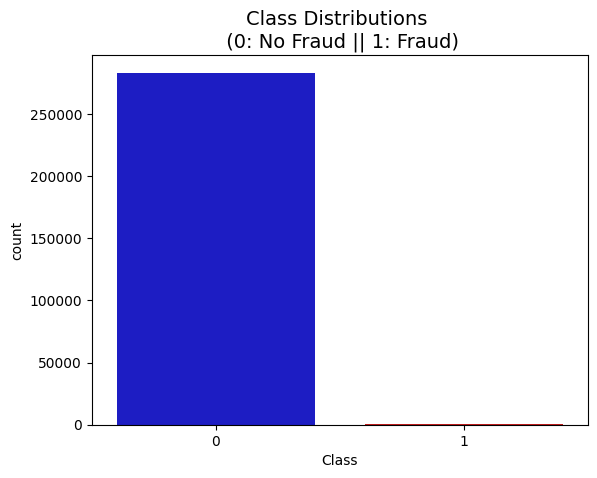

In [10]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x=df['Class'], palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

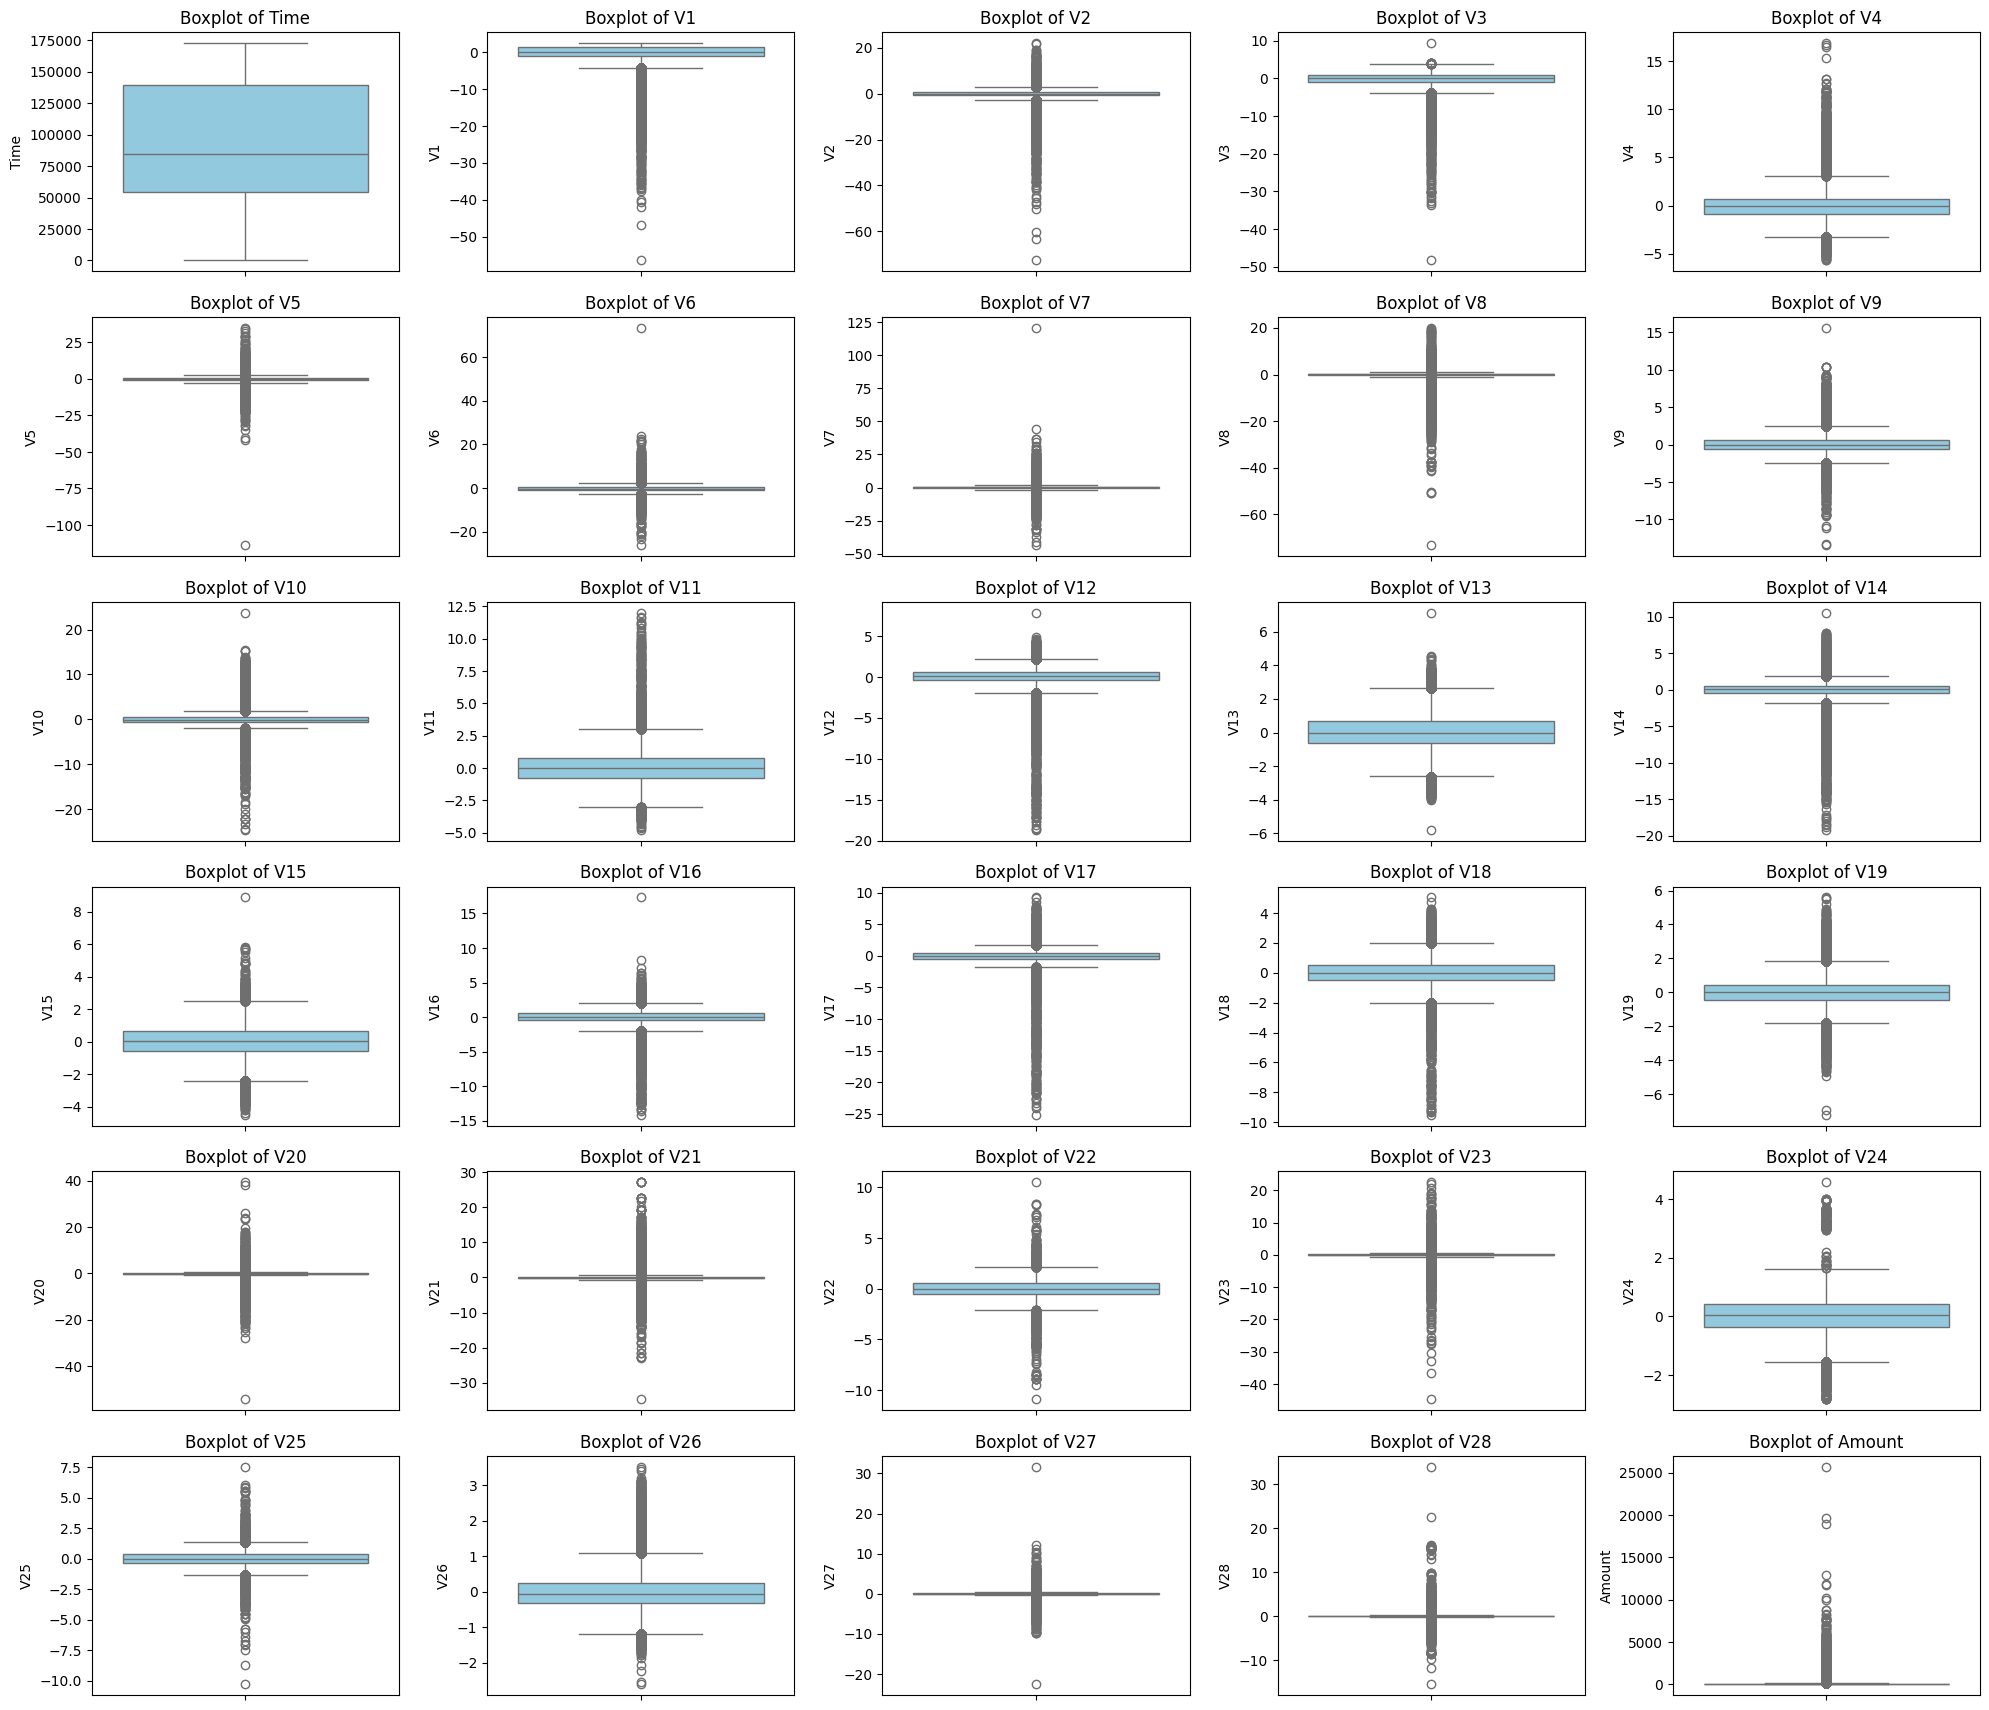

In [11]:
features = df.columns[:-1]

def plot_boxplot(features, columns=5, figsize=(20, 20)):
    rows = (len(features) // columns) + 1

    fig, ax = plt.subplots(rows, columns, figsize=figsize)

    axes = ax.flatten()  # Flatten the 2D array of subplots into a 1D array

    for i, col in enumerate(features):
        sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplot(features)

<Figure size 1800x400 with 0 Axes>

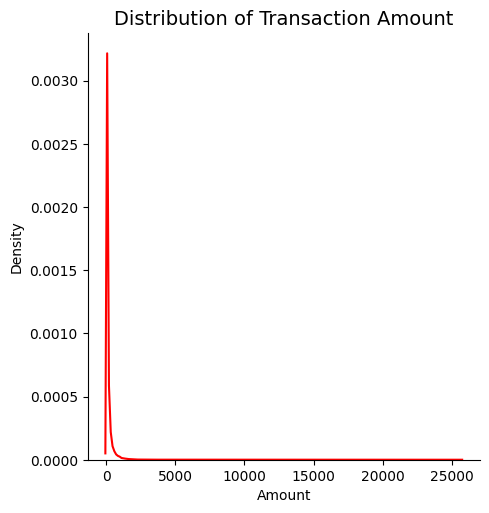

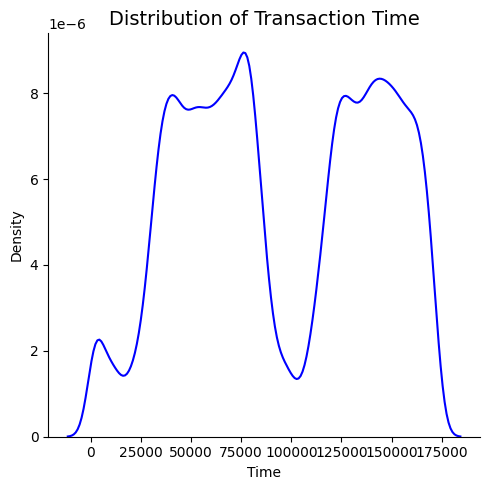

In [12]:
plt.figure(figsize=(18,4))

sns.displot(df['Amount'], color='r', kind='kde' )
plt.title('Distribution of Transaction Amount', fontsize=14)

sns.displot(df['Time'], color='b', kind='kde')
plt.title('Distribution of Transaction Time', fontsize=14)

plt.tight_layout()
plt.show()

In [13]:
std_scaler = StandardScaler()

df[df.drop(columns=['Class'], axis=1).columns]  = std_scaler.fit_transform(df.drop(columns=['Class'], axis=1))

scaled_amount = df.pop('Amount')

df.insert(1, 'Amount', scaled_amount)

# Amount and Time are Scaled!

df.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996870,0.244207,-0.699502,-0.042002,1.674066,0.975627,-0.246236,0.347948,0.193218,0.084129,...,0.326229,-0.025079,0.383103,-0.177477,0.110166,0.247051,-0.392622,0.332484,-0.065840,0
1,-1.996870,-0.342590,0.608163,0.163563,0.109490,0.318473,0.042578,-0.060938,-0.064379,0.072708,...,-0.089902,-0.307925,-0.880035,0.161832,-0.561504,0.321168,0.260835,-0.026944,0.043209,0
2,-1.996849,1.158929,-0.698758,-0.810682,1.170245,0.270158,-0.365780,1.352328,0.639693,0.209273,...,0.681430,0.337980,1.063719,1.456702,-1.138493,-0.628170,-0.288864,-0.143868,-0.183794,0
3,-1.996849,0.139891,-0.497825,-0.110201,1.183307,-0.608217,-0.008412,0.937026,0.191608,0.318274,...,-0.270321,-0.147770,0.007454,-0.305417,-1.941467,1.242481,-0.460692,0.153867,0.185653,0
4,-1.996828,-0.073813,-0.596201,0.534496,1.022037,0.286590,-0.296172,0.072880,0.479083,-0.226030,...,0.530248,-0.012978,1.100378,-0.220714,0.232915,-0.394808,1.041637,0.548995,0.654116,0


<Figure size 1800x400 with 0 Axes>

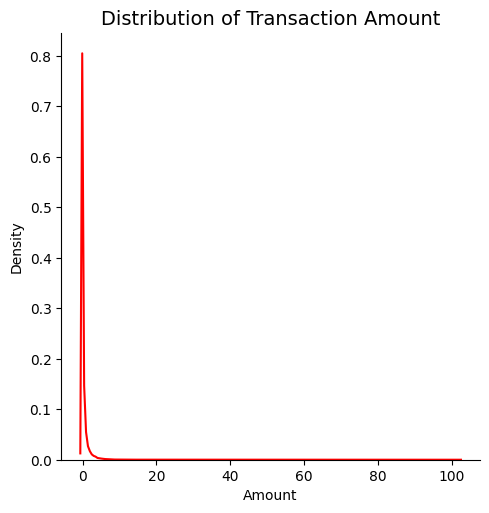

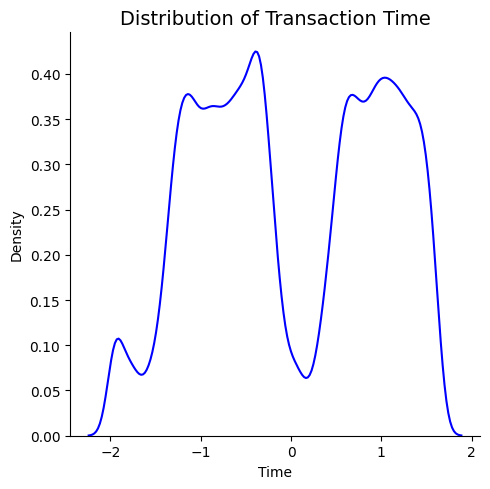

In [14]:
plt.figure(figsize=(18,4))

sns.displot(df['Amount'], color='r', kind='kde')
plt.title('Distribution of Transaction Amount', fontsize=14)

sns.displot(df['Time'], color='b', kind='kde')
plt.title('Distribution of Transaction Time', fontsize=14)

plt.tight_layout()
plt.show()

***HELPER FUNCTIONS***

In [15]:
def remove_outliers_iqr(df):
    """
    Removes outliers using the IQR method for non-fraud transactions (Class == 0).
    
    Parameters:
    df (pd.DataFrame): The input dataframe.
    columns (list): List of numerical columns to check for outliers.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed only for Class == 0.
    """
    df_no_fraud = df[df['Class'] == 0].copy()  # Select non-fraud transactions
    df_fraud = df[df['Class'] == 1].copy()  # Keep fraud transactions unchanged

    columns = list(df.columns.drop('Class'))

    for col in columns:
        Q1 = df_no_fraud[col].quantile(0.25)
        Q3 = df_no_fraud[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows where values are within the IQR range
        df_no_fraud = df_no_fraud[(df_no_fraud[col] >= lower_bound) & (df_no_fraud[col] <= upper_bound)]

    # Combine back fraud and non-fraud transactions
    df_cleaned = pd.concat([df_no_fraud, df_fraud]).sort_index().reset_index(drop=True)
    
    return df_cleaned


def plot_class_distribution( var, title):

    print(var)

    sns.countplot(var, palette=colors, )

    plt.title(f'{title} Balanced Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
    plt.show()

def boxplot_high_corr(data, r, c):

    f, ax = plt.subplots(r, c, figsize=(20,20))

    for i, col in enumerate(data.columns):

        sns.boxplot(y=col, data=data, ax=ax[i//c, i%c], palette="coolwarm", showfliers=True)
        ax[i//c, i%c].set_title(f'{col}')
        ax[i//c, i%c].set_xlabel(f'{col} Values')
        ax[i//c, i%c].set_ylabel('')

    f, ax = plt.subplots(r, c, figsize=(20, 20))

# Loop through selected high-correlation features and plot boxplots
    for i, col in enumerate(data.columns):
        sns.boxplot(x='Class', y=col, data=data, palette="coolwarm", ax=ax[i//c, i%c], showfliers=True)
        ax[i//c, i%c].set_title(f'Boxplot of {col} by Class')
        ax[i//c, i%c].set_xlabel('Class (0 = Legit, 1 = Fraud)')
        ax[i//c, i%c].set_ylabel(f'{col} Values')

    # Adjust layout
    plt.tight_layout()
    plt.show()



**Remove outliers**

In [16]:
df = remove_outliers_iqr(df)

***Manually balance the dataset***

In [17]:
imbalancedX, imbalancedy = df.drop(['Class'], axis=1), df['Class']

Class
0    492
1    492
Name: count, dtype: int64


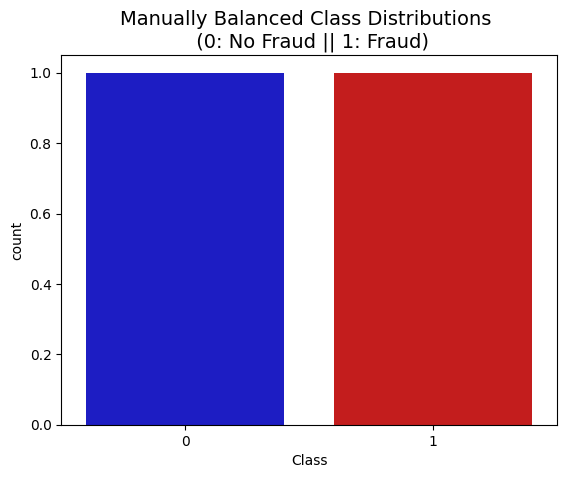

In [18]:
df = df.sample(frac=1, random_state=42)

frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0][:492]

bal_df = pd.concat([frauds, non_frauds])
bal_df = bal_df.sample(frac=1, random_state=42)

balX, baly = bal_df.drop(['Class'], axis=1), bal_df['Class']

plot_class_distribution(bal_df['Class'].value_counts(), 'Manually')



***Under sampling: Nearmiss technique***

Class
0    492
1    492
Name: count, dtype: int64


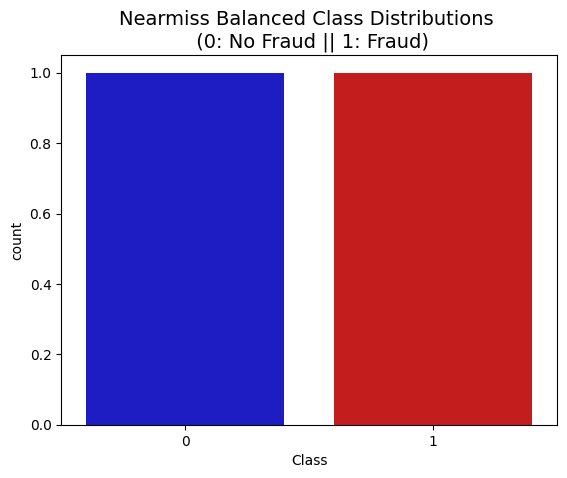

In [19]:
nX, ny = NearMiss().fit_resample(imbalancedX, imbalancedy)

ndf = pd.concat([nX, ny], axis=1)

ndf = ndf.sample(frac=1, random_state=42)

plot_class_distribution(ny.value_counts(),'Nearmiss')


***Oversampling: SMOTE***

Class
0    110402
1    110402
Name: count, dtype: int64


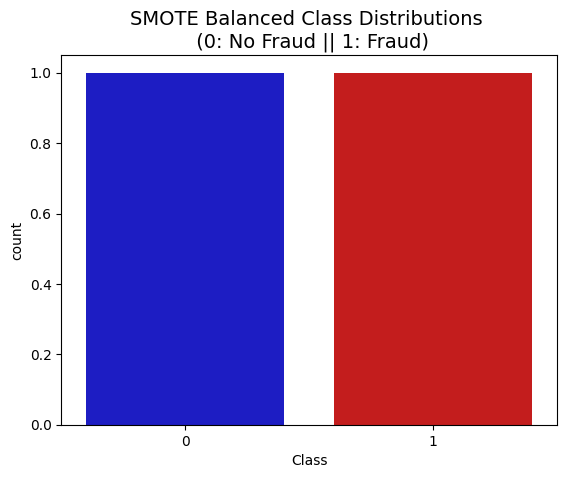

In [20]:
sX, sy = SMOTE(sampling_strategy='minority').fit_resample(imbalancedX,imbalancedy)

sdf = pd.concat([sX, sy], axis=1)
sdf = sdf.sample(frac=1, random_state=42)

plot_class_distribution(sy.value_counts(), 'SMOTE')


***Feature Selection***

***Correlation Mtrix***

**with imbalanced dataset**


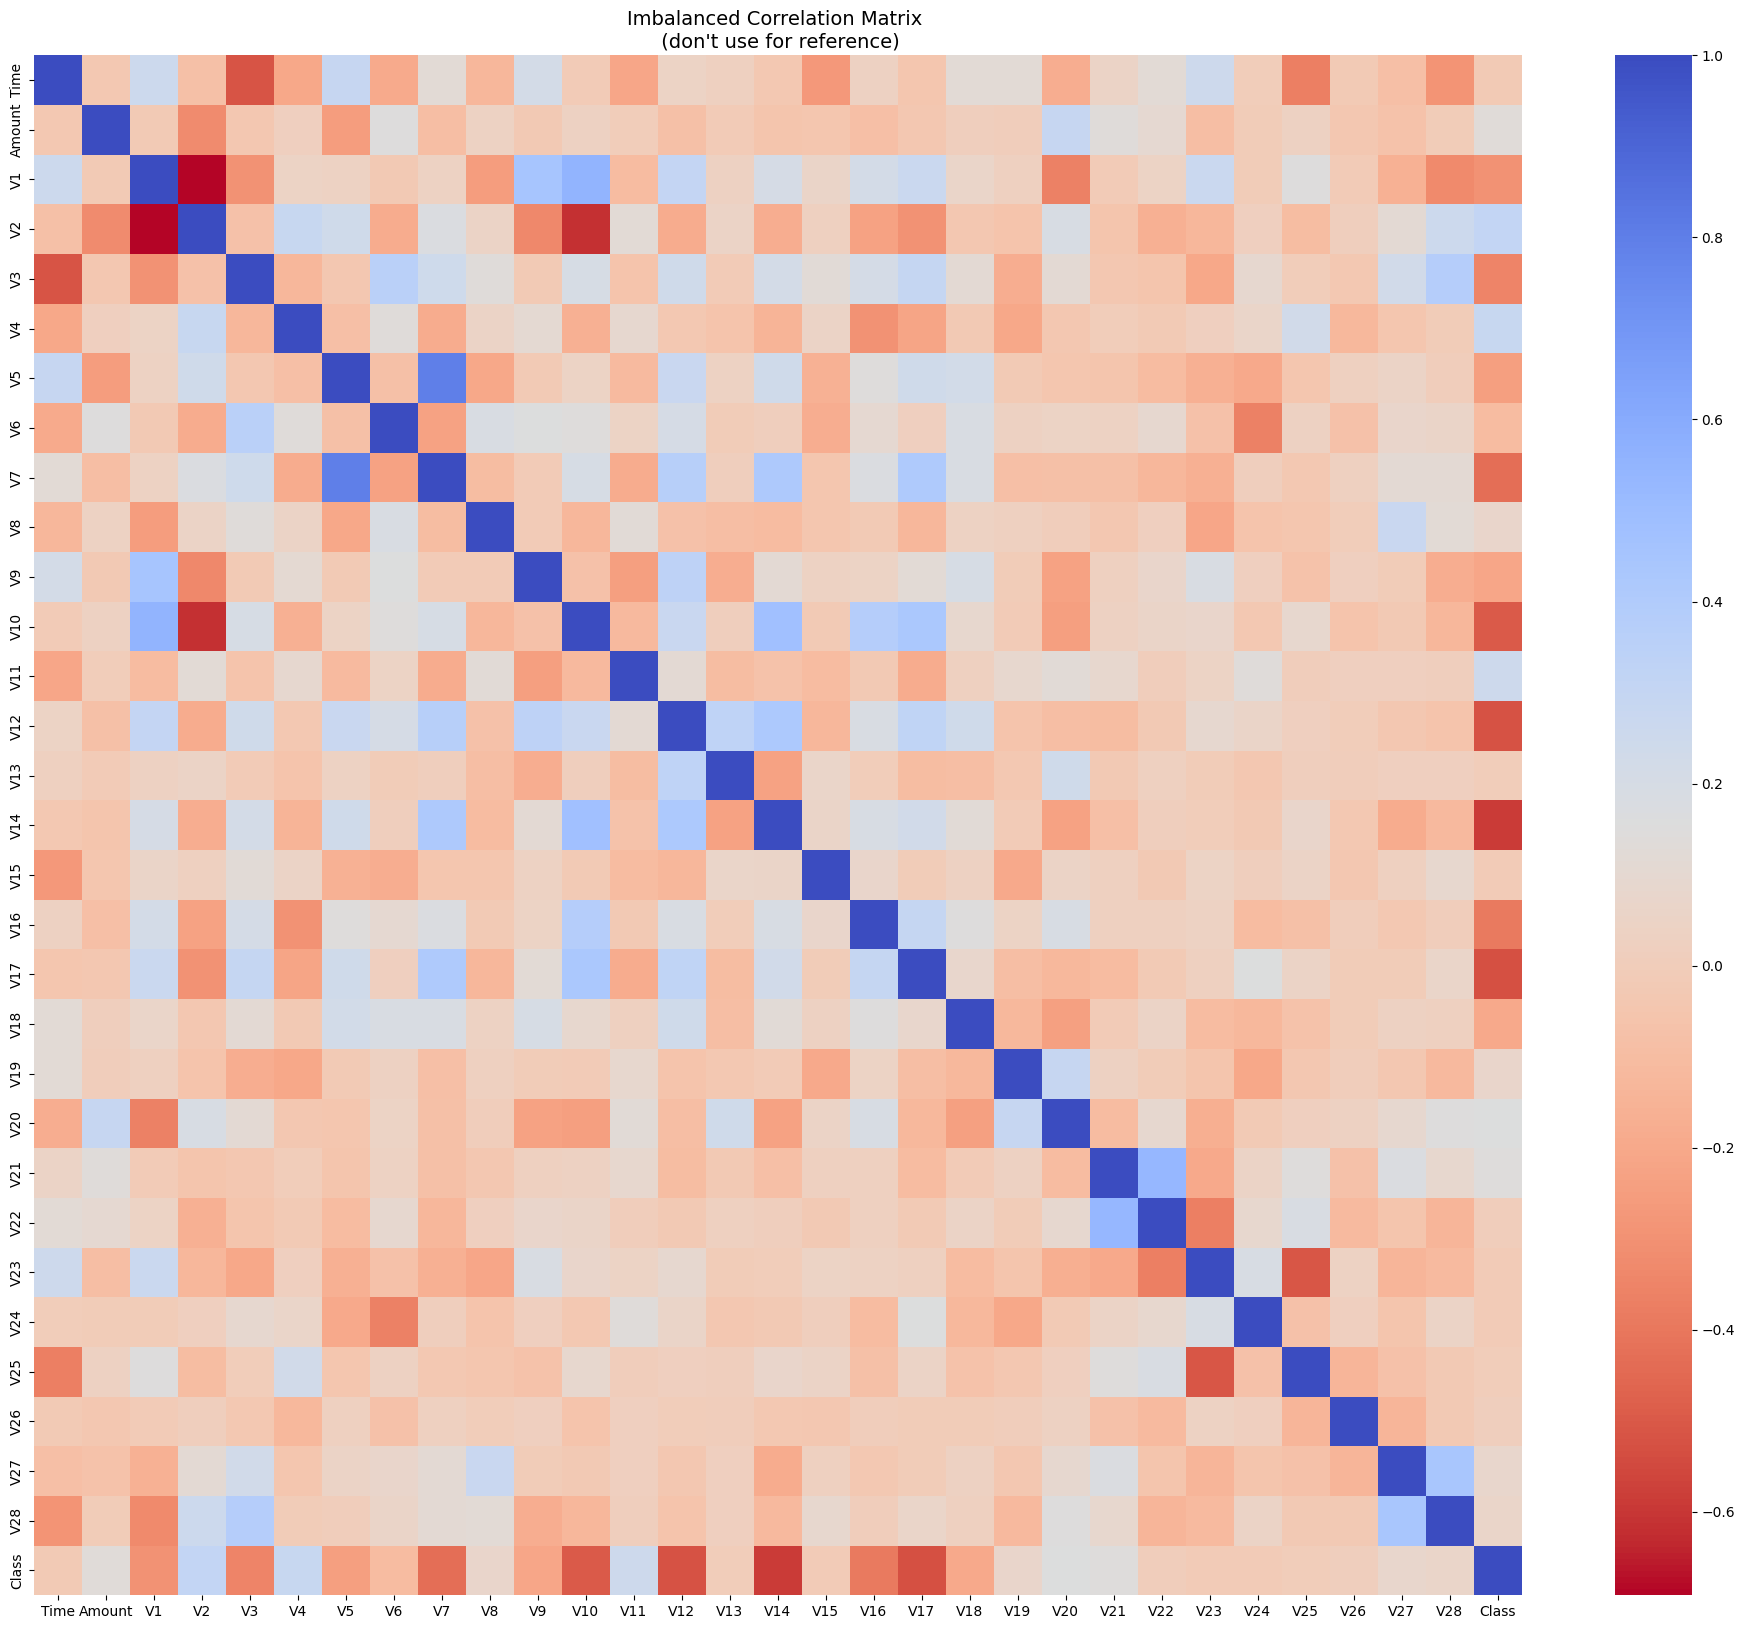

Features with correlation above threshold: 0.5
 V12     -0.521927
V14     -0.589040
V17     -0.529495
Class    1.000000
Name: Class, dtype: float64
4


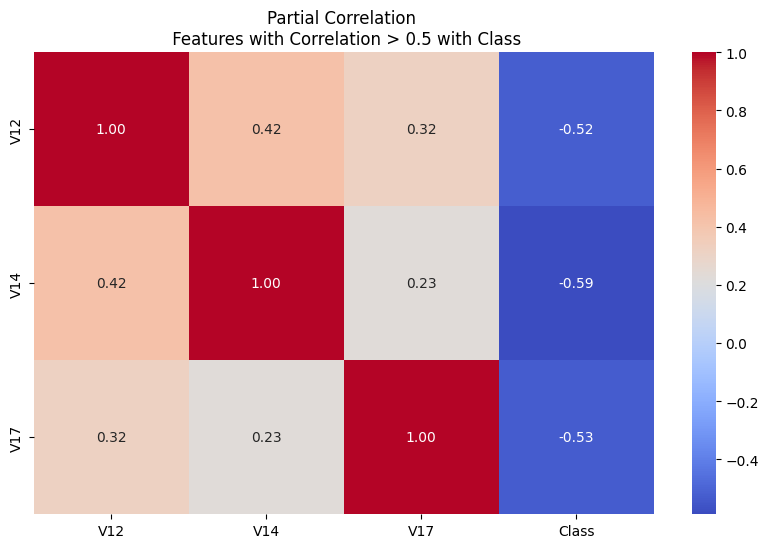

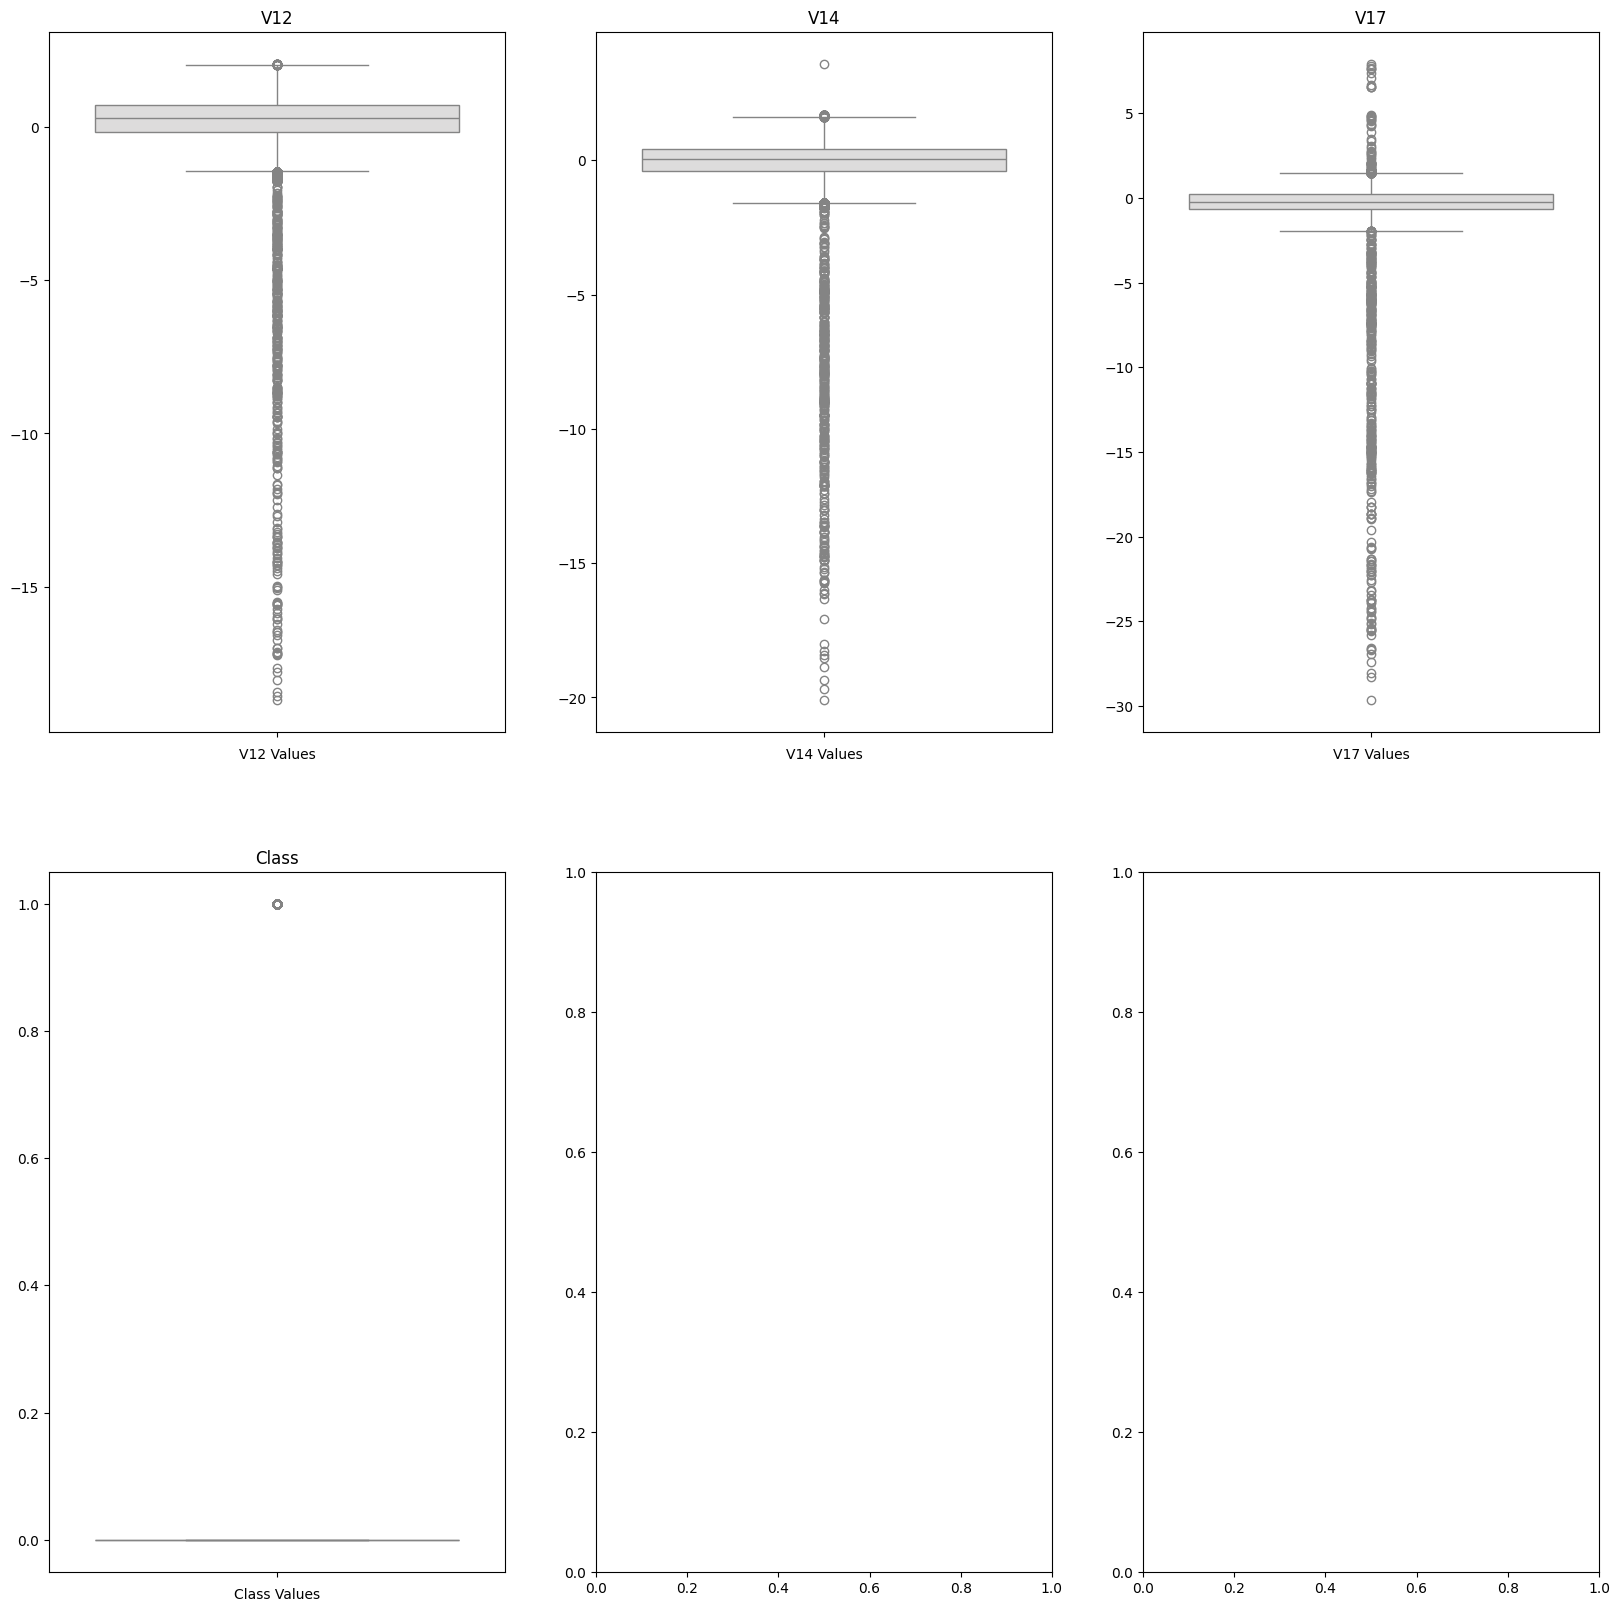

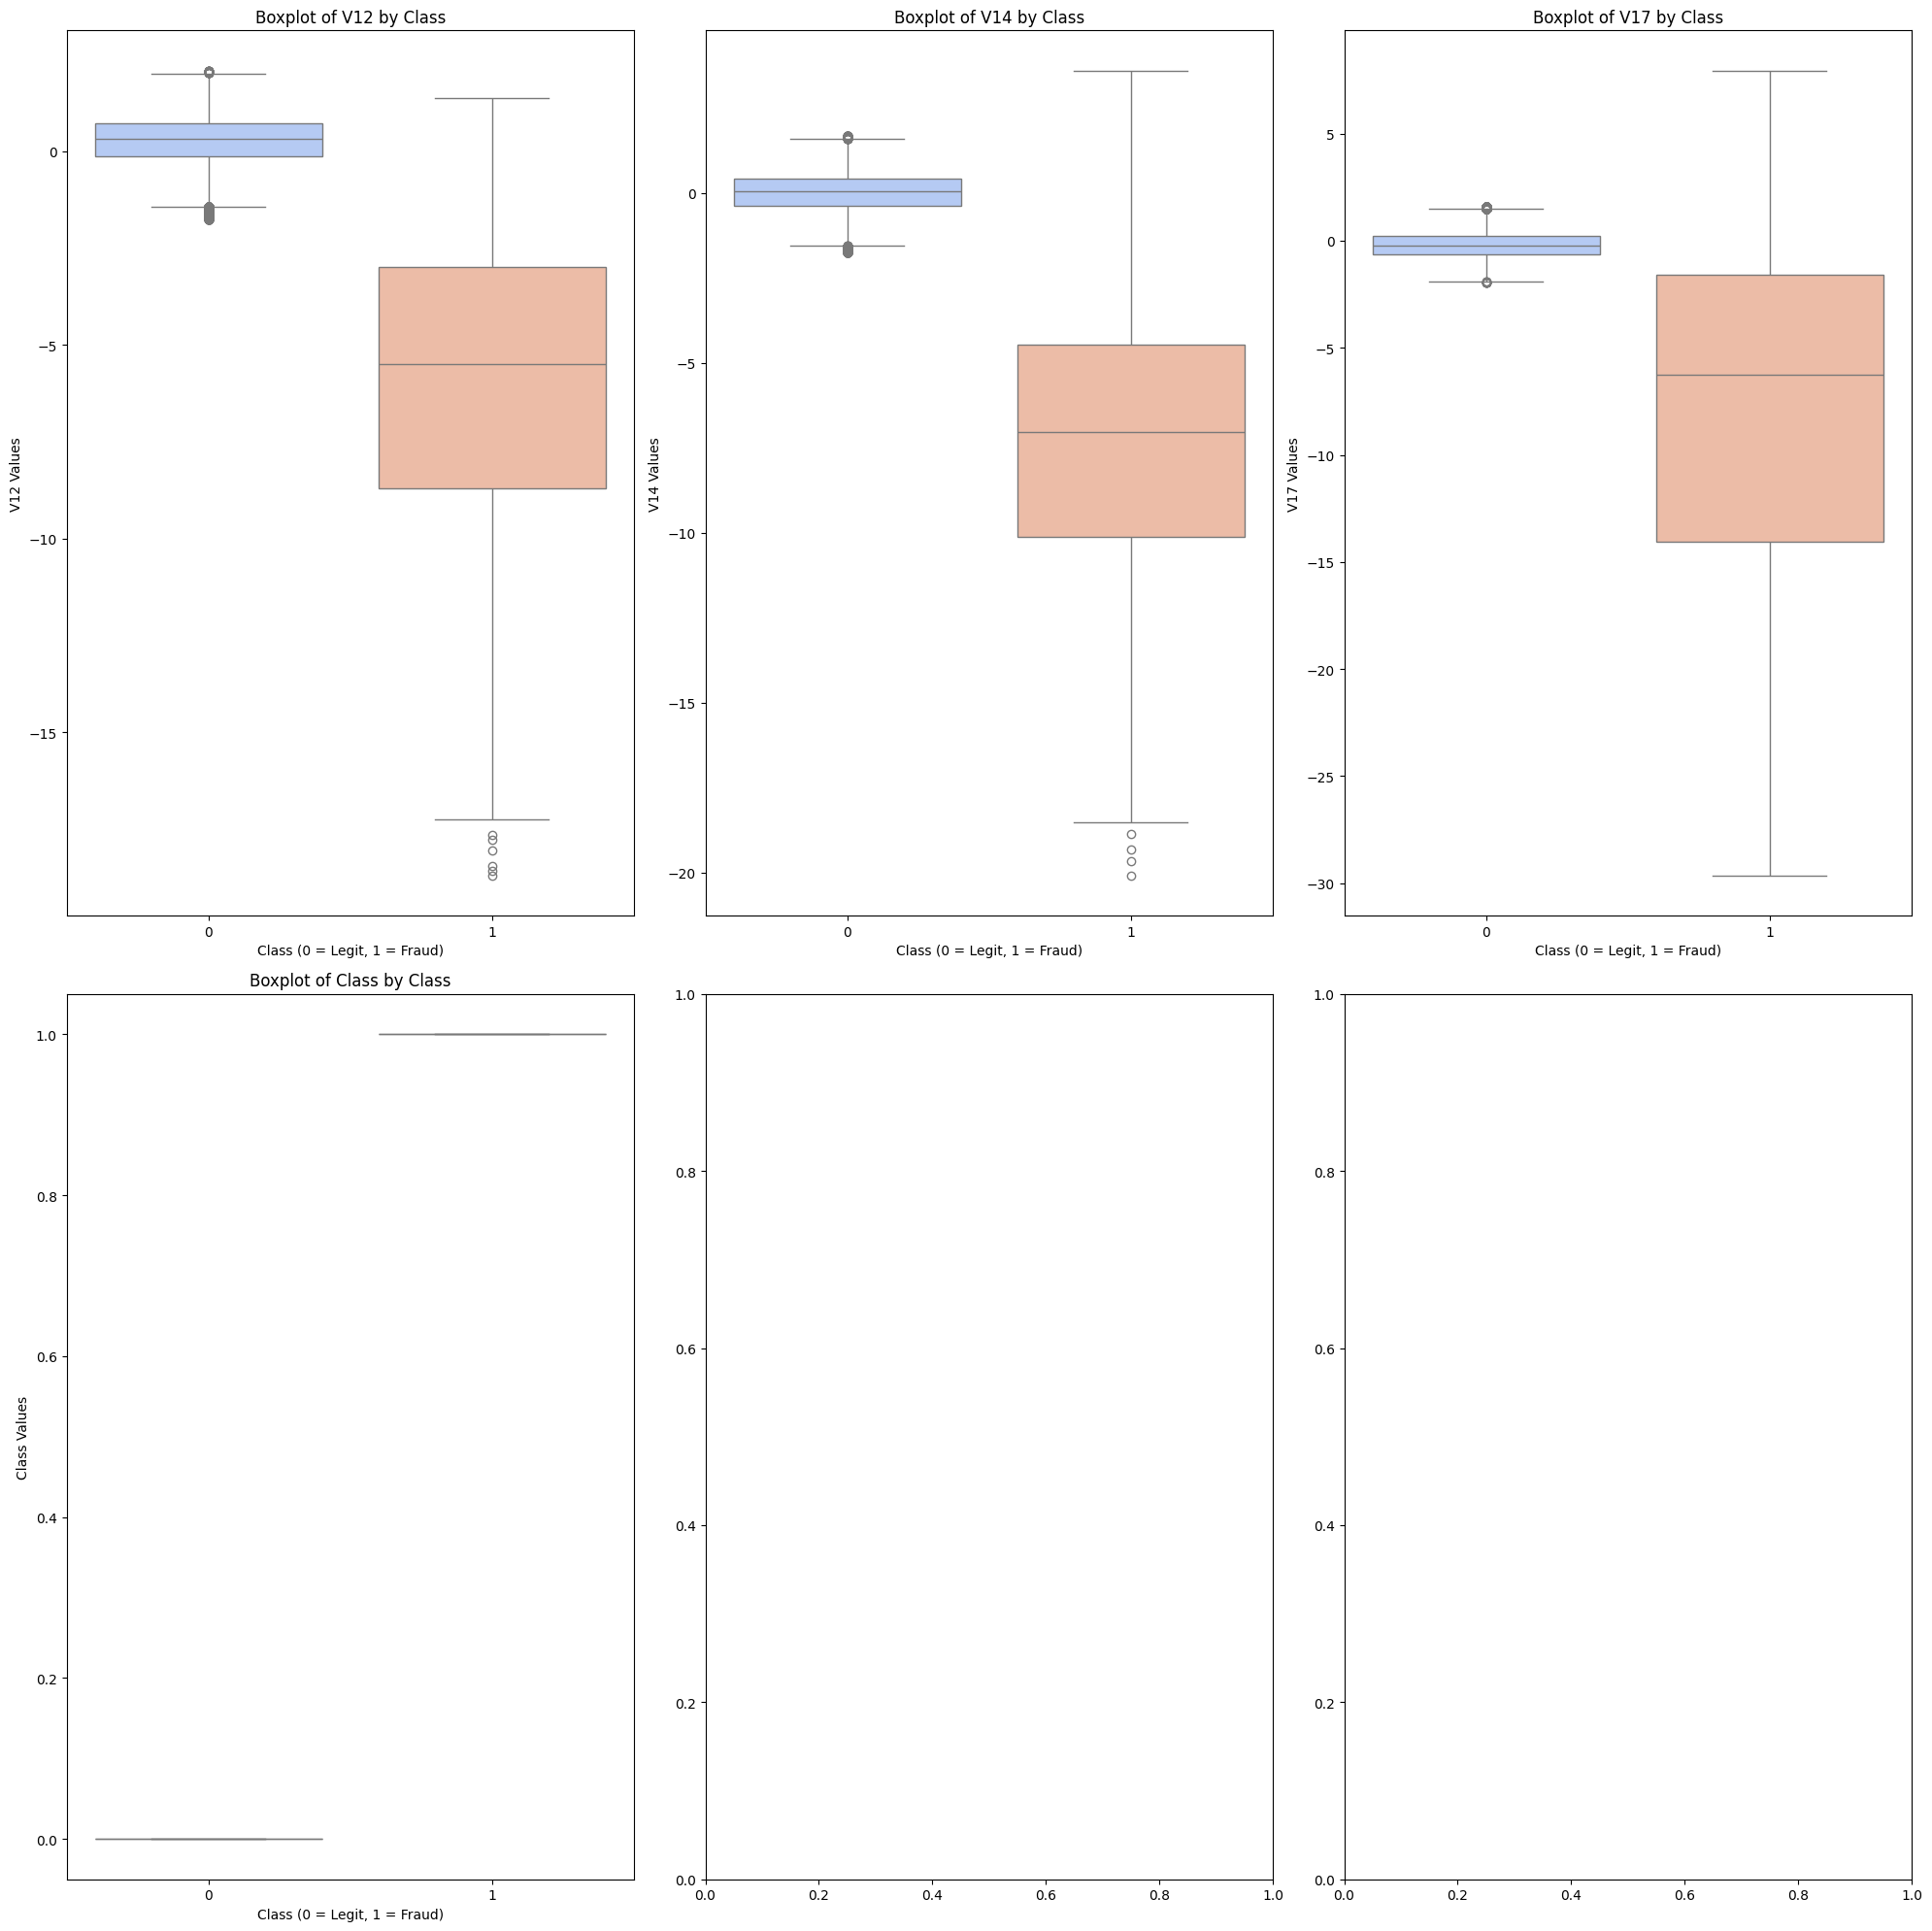

In [21]:
plt.figure(figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

threshold = 0.5  # Adjust as needed

# Compute correlation with the "Class" column
corr_with_class = df.corr()['Class']  # Drop 'Class' itself

# Find columns with correlation above the threshold (absolute value)
high_corr_features = corr_with_class[abs(corr_with_class) > threshold]

# Display results
print(f"Features with correlation above threshold: {threshold}\n", high_corr_features)
print(len(high_corr_features))

plt.figure(figsize=(10, 6))
sns.heatmap(df[high_corr_features.index].corr().drop('Class'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title(f"Partial Correlation \n Features with Correlation > {threshold} with Class")
plt.show()

boxplot_high_corr(df[list(pd.DataFrame(high_corr_features).index)], 2, 3)


In [22]:
imbalancedX, imbalancedy = df.drop(['Class'], axis=1), df['Class']

imbalanced_selected = list(high_corr_features.index)

**with manually balanced dataset**

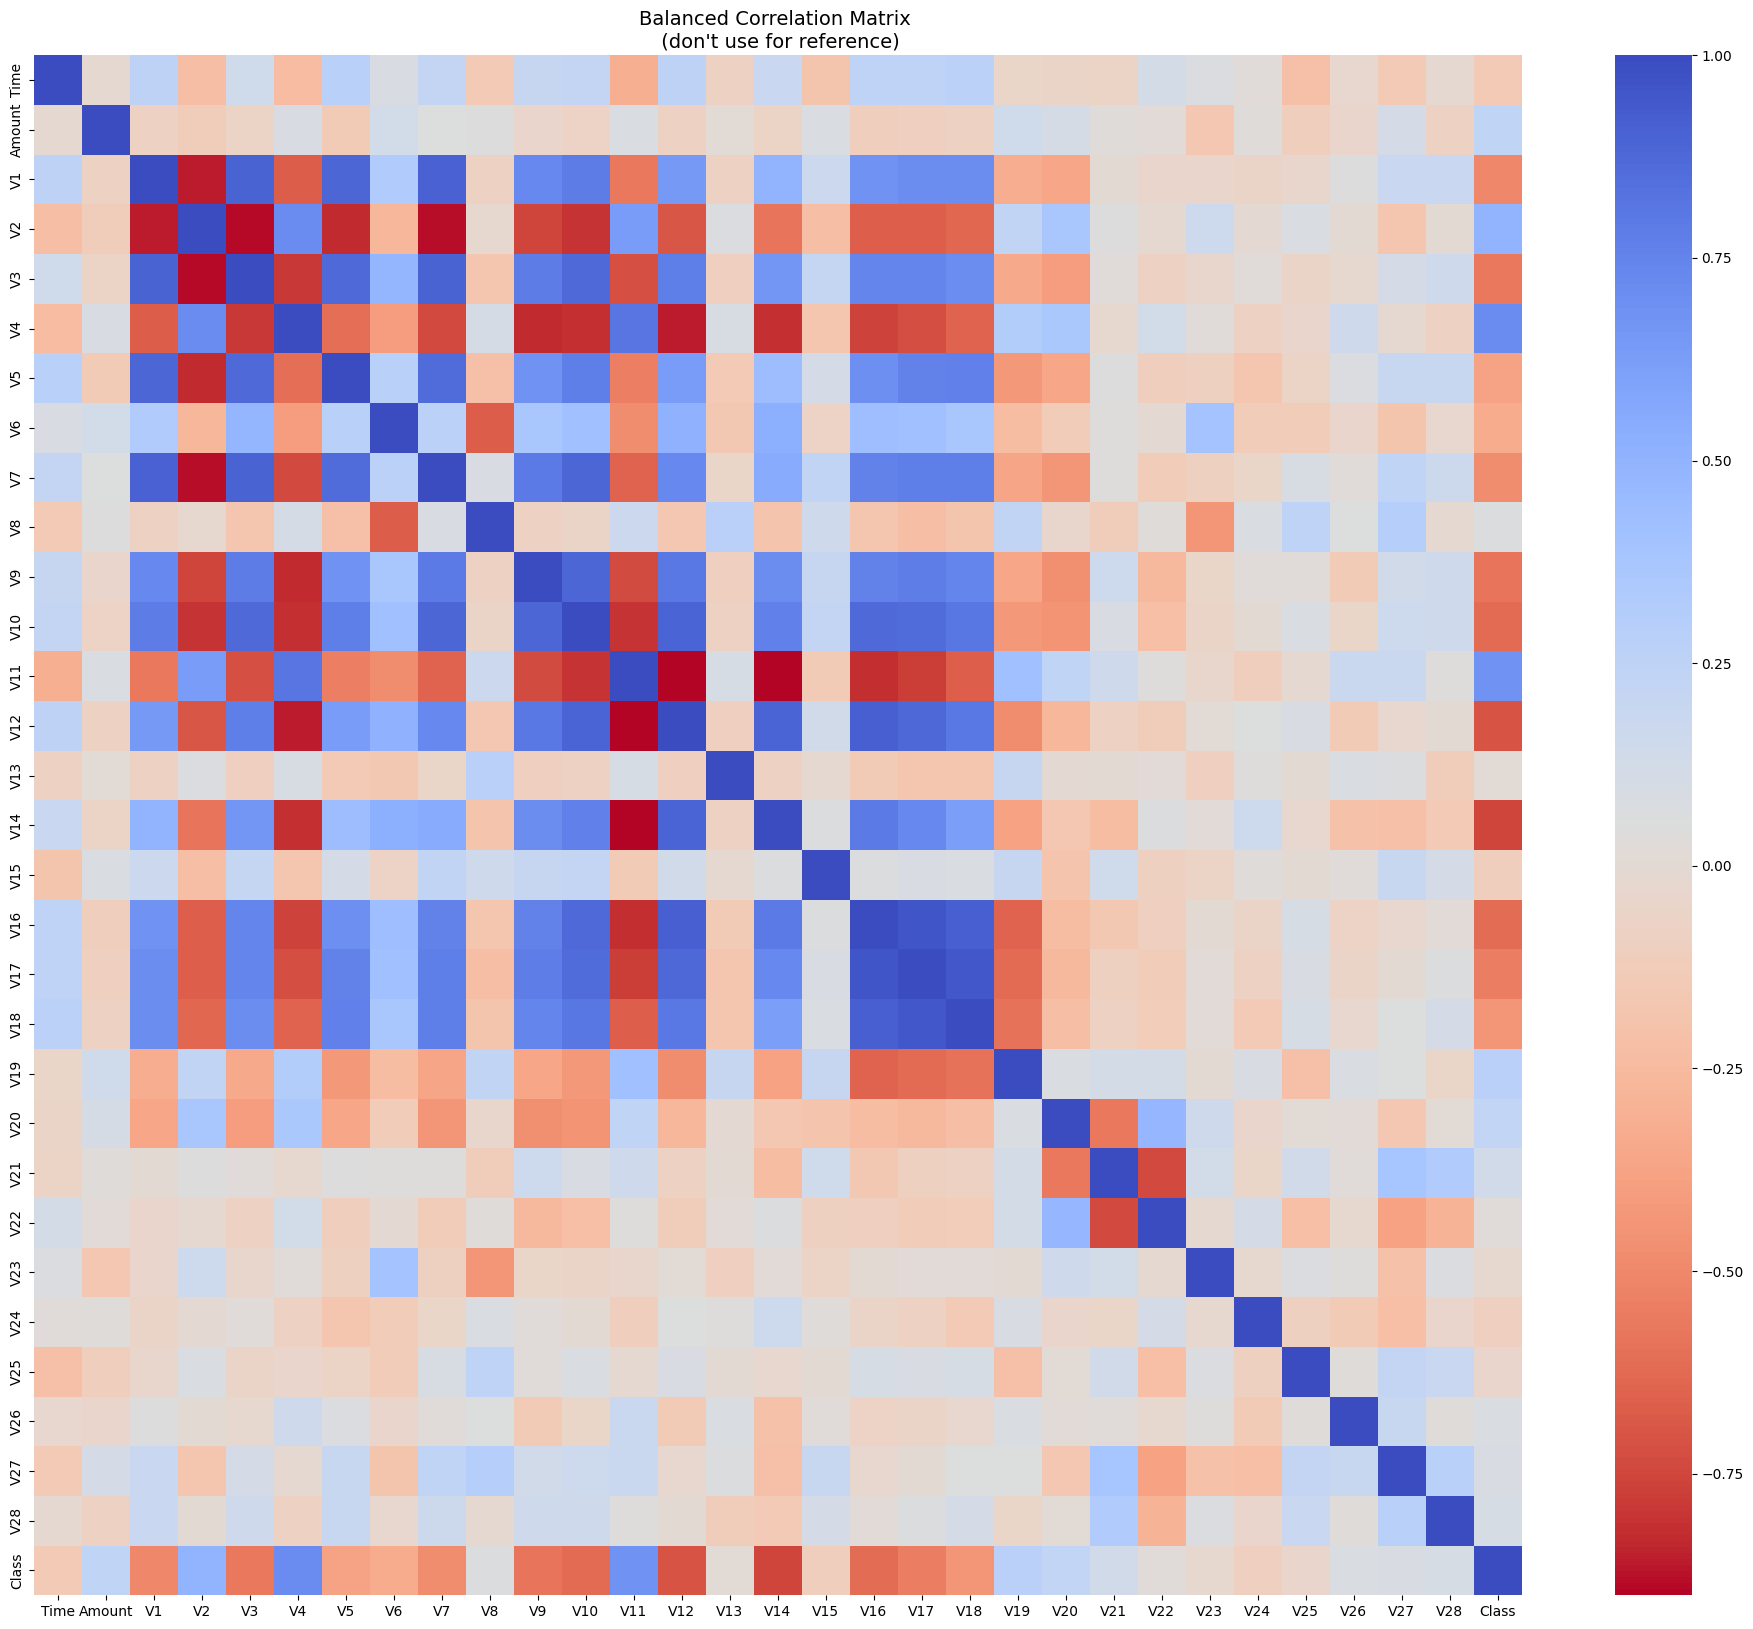

Features with correlation above threshold: 0.6
 V4       0.710985
V10     -0.624656
V11      0.685548
V12     -0.700570
V14     -0.753348
V16     -0.616125
Class    1.000000
Name: Class, dtype: float64
7


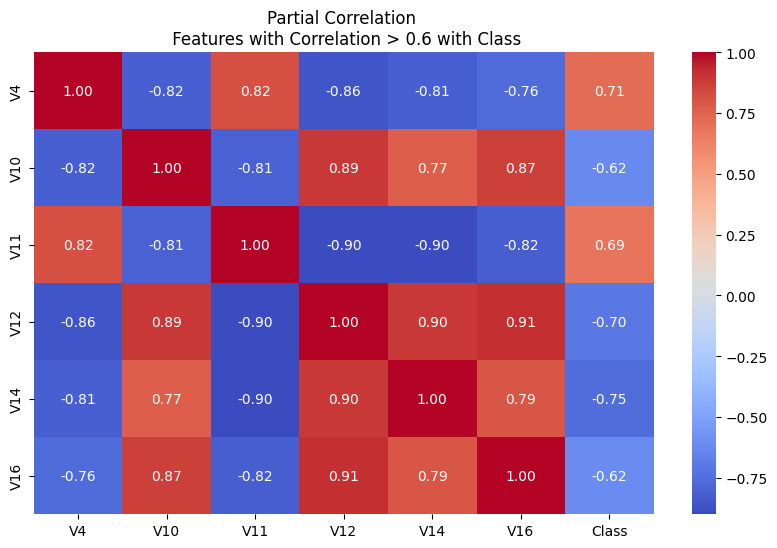

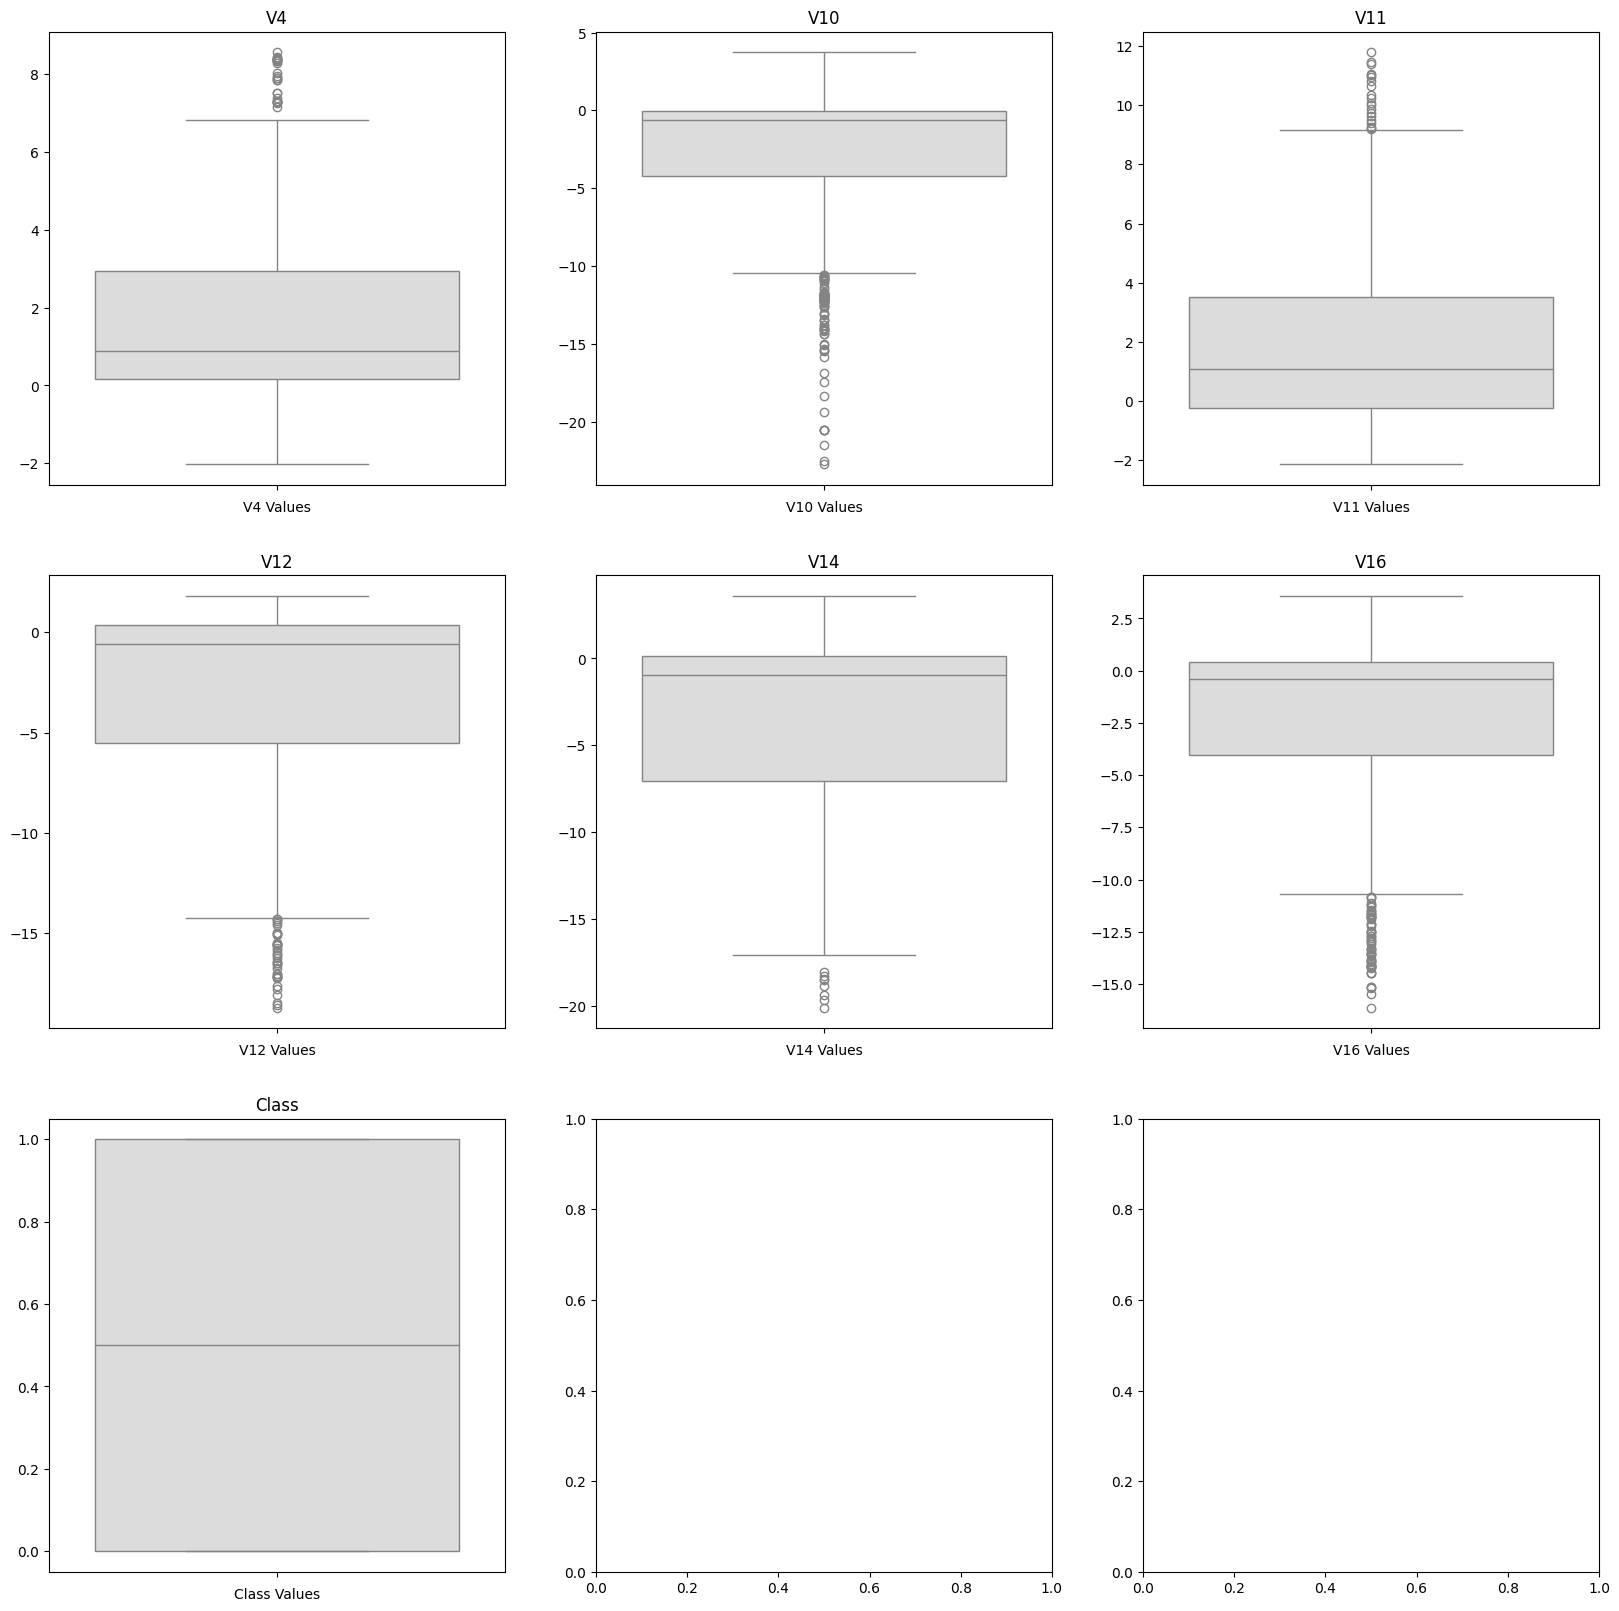

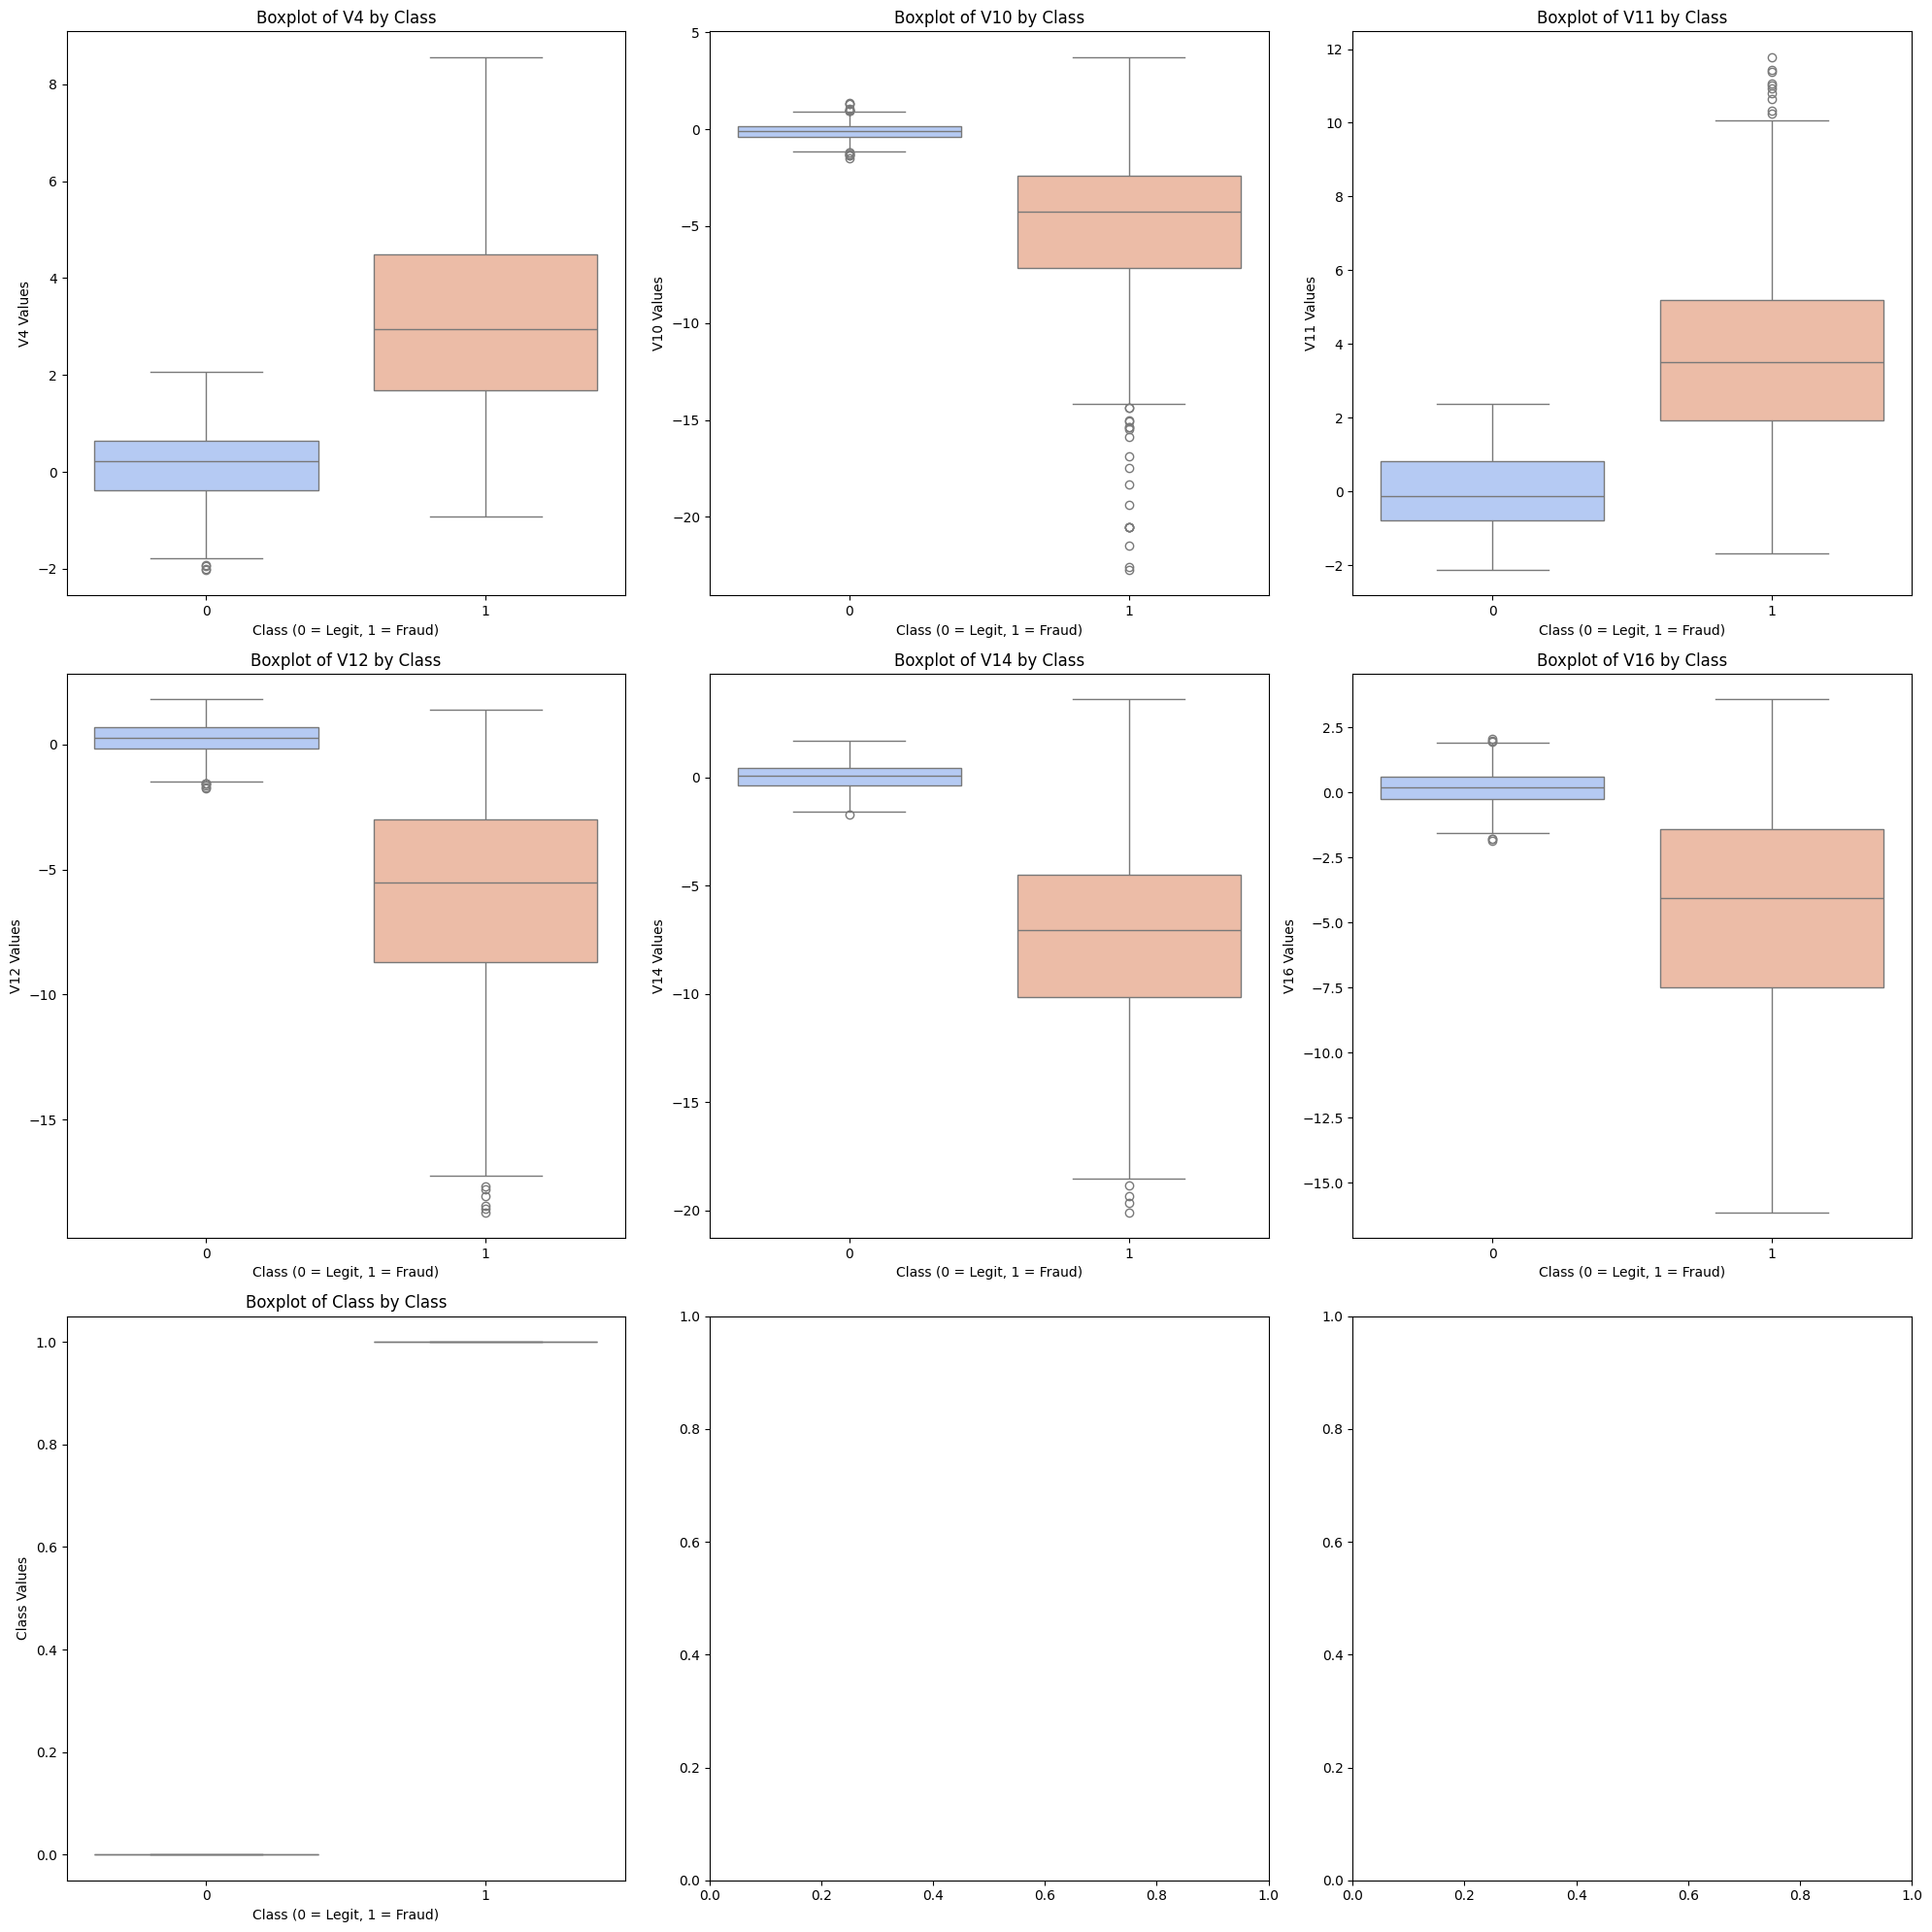

In [23]:
plt.figure(figsize=(24,20))

corr = bal_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Balanced Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

threshold = 0.6  # Adjust as needed

# Compute correlation with the "Class" column
corr_with_class = bal_df.corr()['Class']  # Drop 'Class' itself

# Find columns with correlation above the threshold (absolute value)
high_corr_features = corr_with_class[abs(corr_with_class) > threshold]

# Display results
print(f"Features with correlation above threshold: {threshold}\n", high_corr_features)
print(len(high_corr_features))

plt.figure(figsize=(10, 6))
sns.heatmap(bal_df[high_corr_features.index].corr().drop('Class'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title(f"Partial Correlation \n Features with Correlation > {threshold} with Class")
plt.show()

boxplot_high_corr(bal_df[list(pd.DataFrame(high_corr_features).index)], 3, 3)

In [24]:
balX, baly = bal_df.drop(['Class'], axis=1), bal_df['Class']

bal_selected = list(high_corr_features.index)

**with Nearmiss balanced dataset**


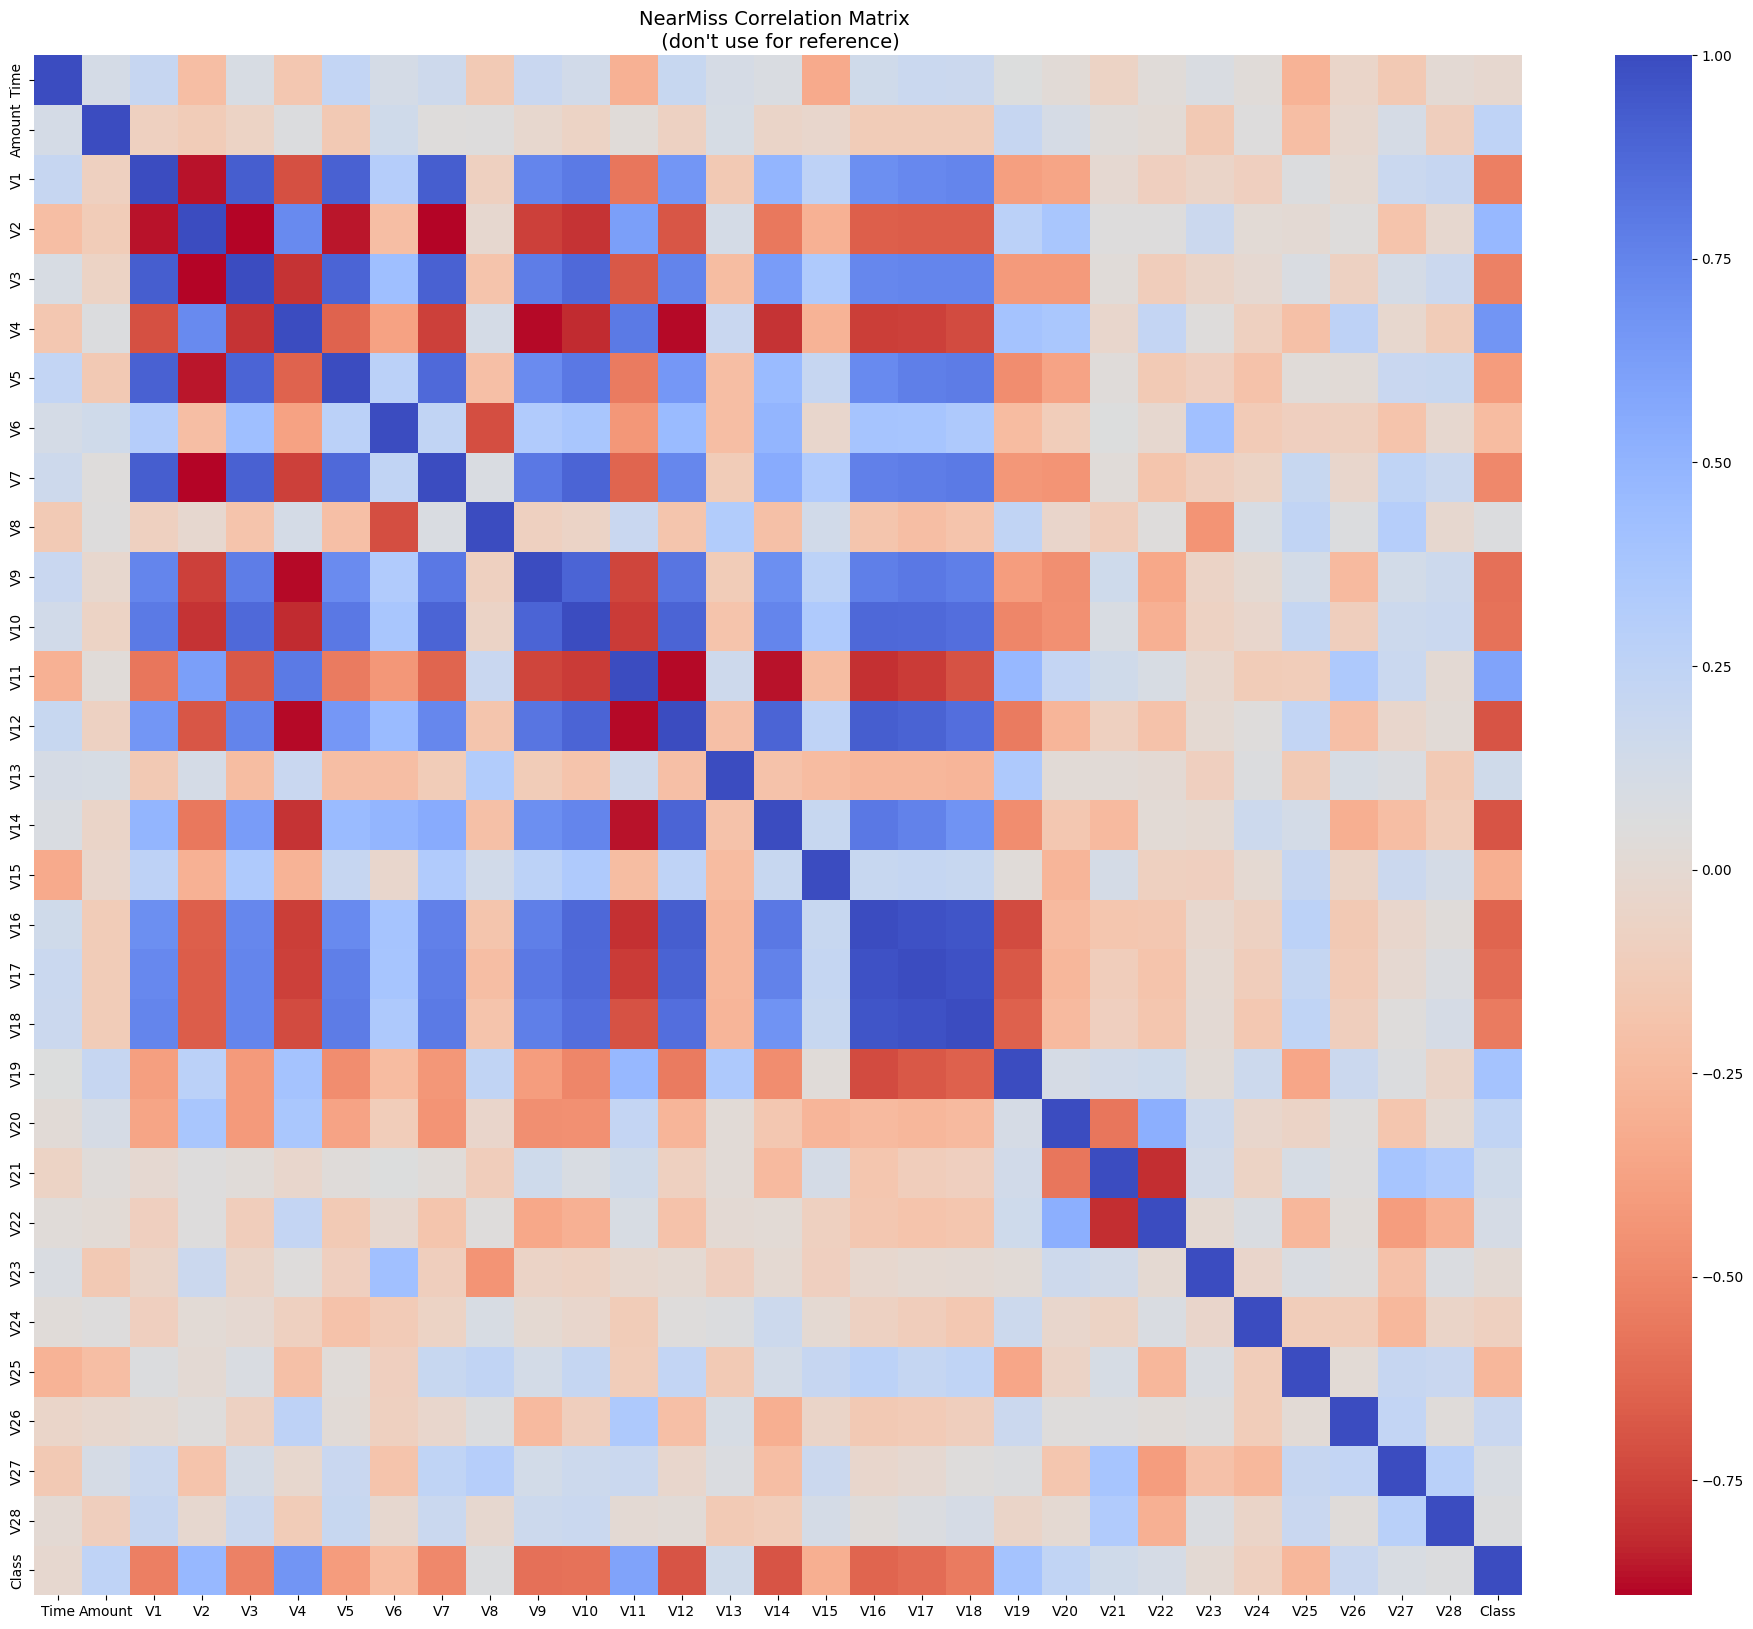

Features with correlation above threshold: 0.6
 V4       0.670985
V12     -0.698735
V14     -0.694294
V16     -0.639568
V17     -0.607785
Class    1.000000
Name: Class, dtype: float64
6


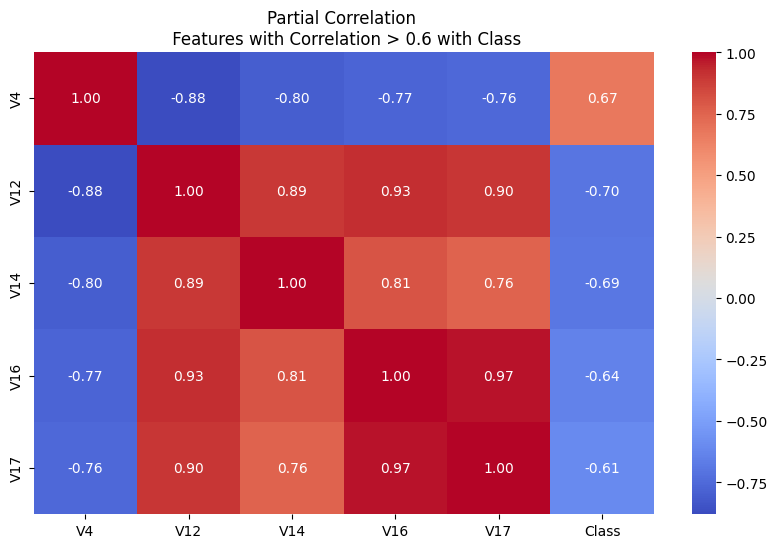

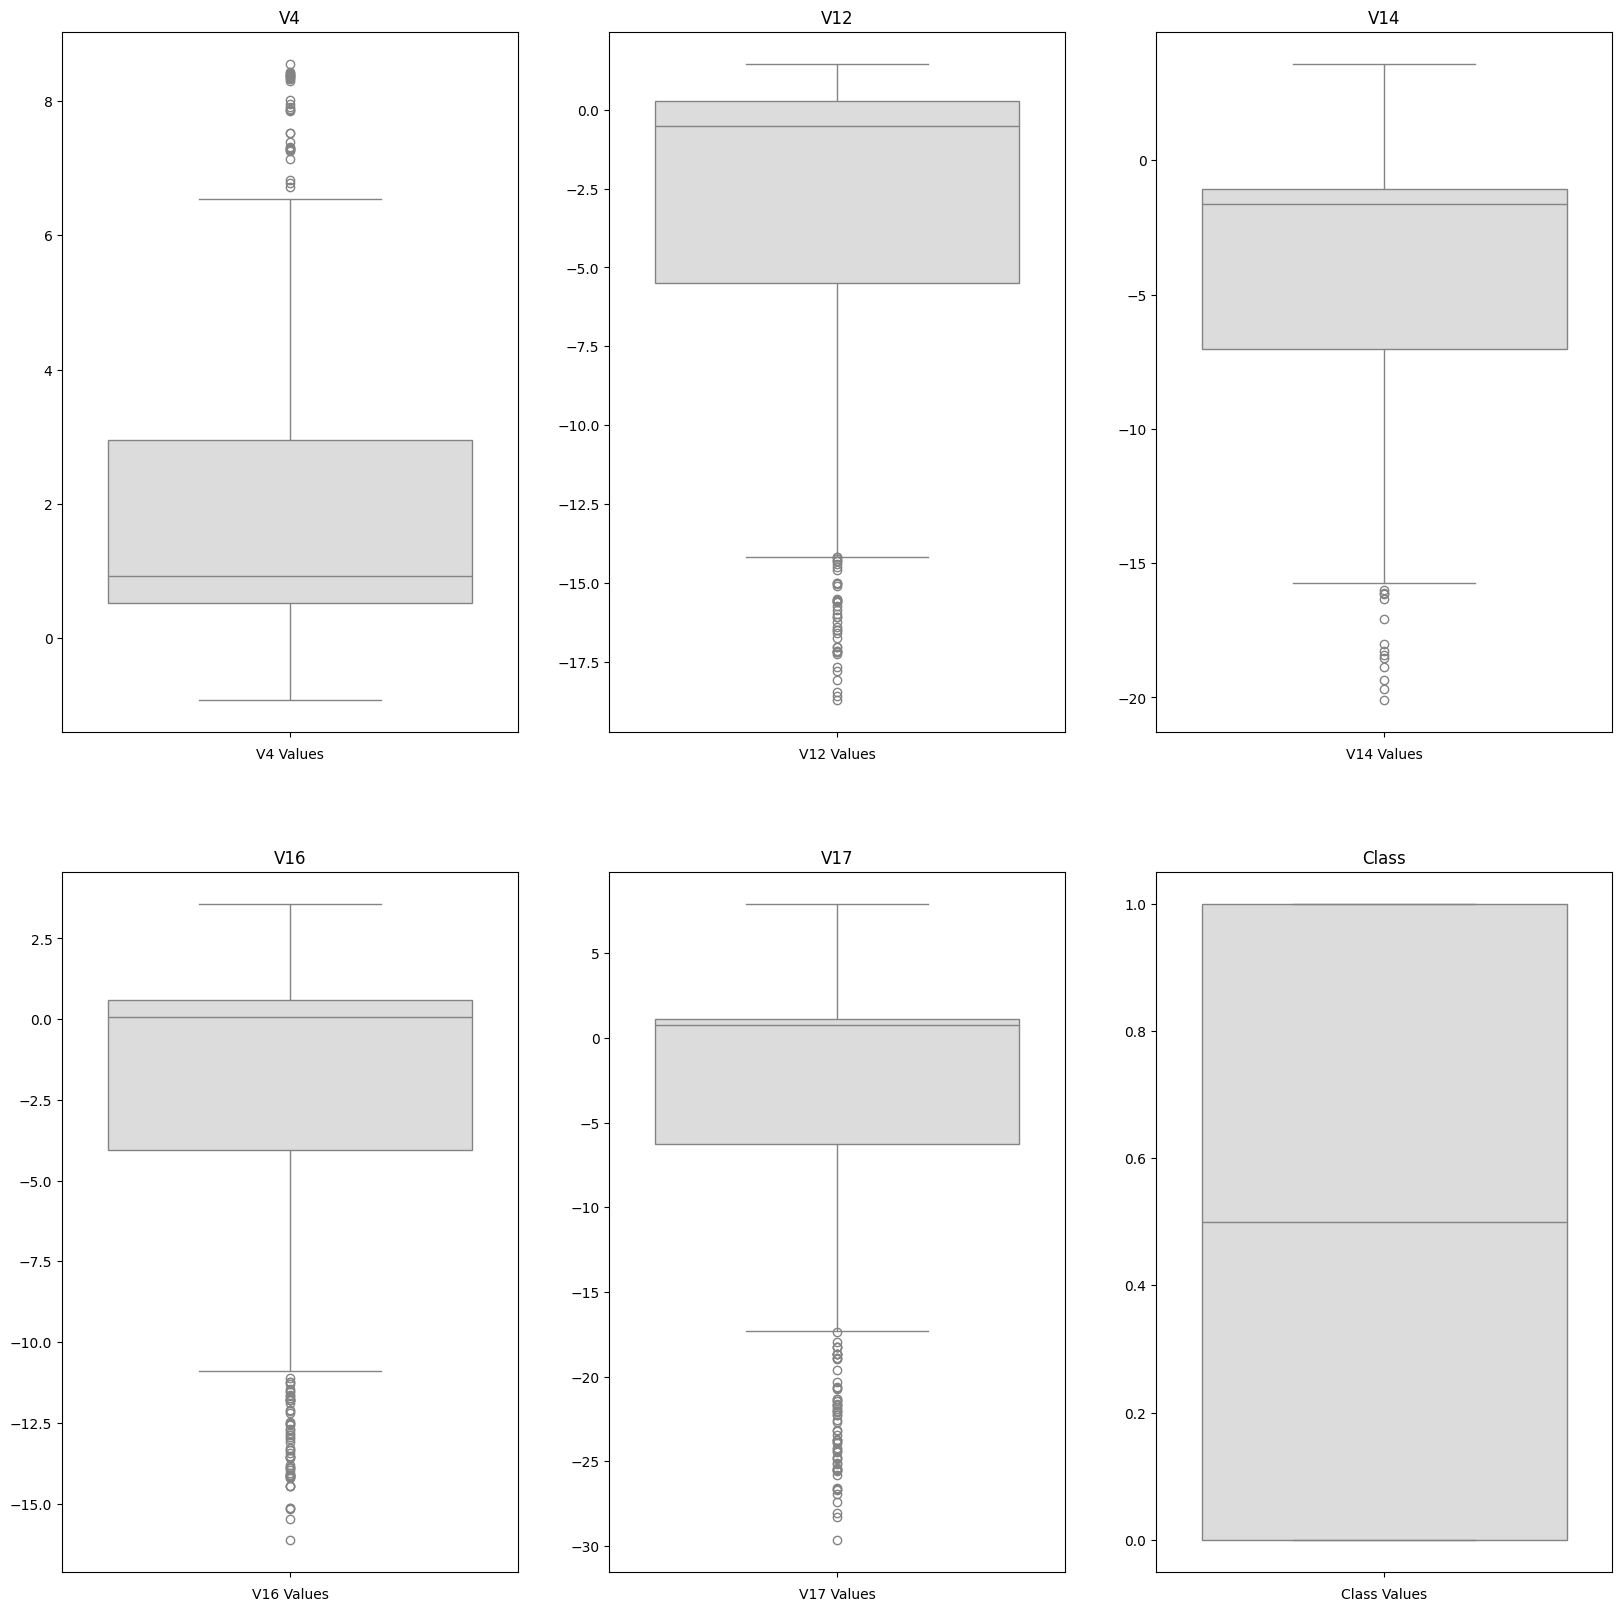

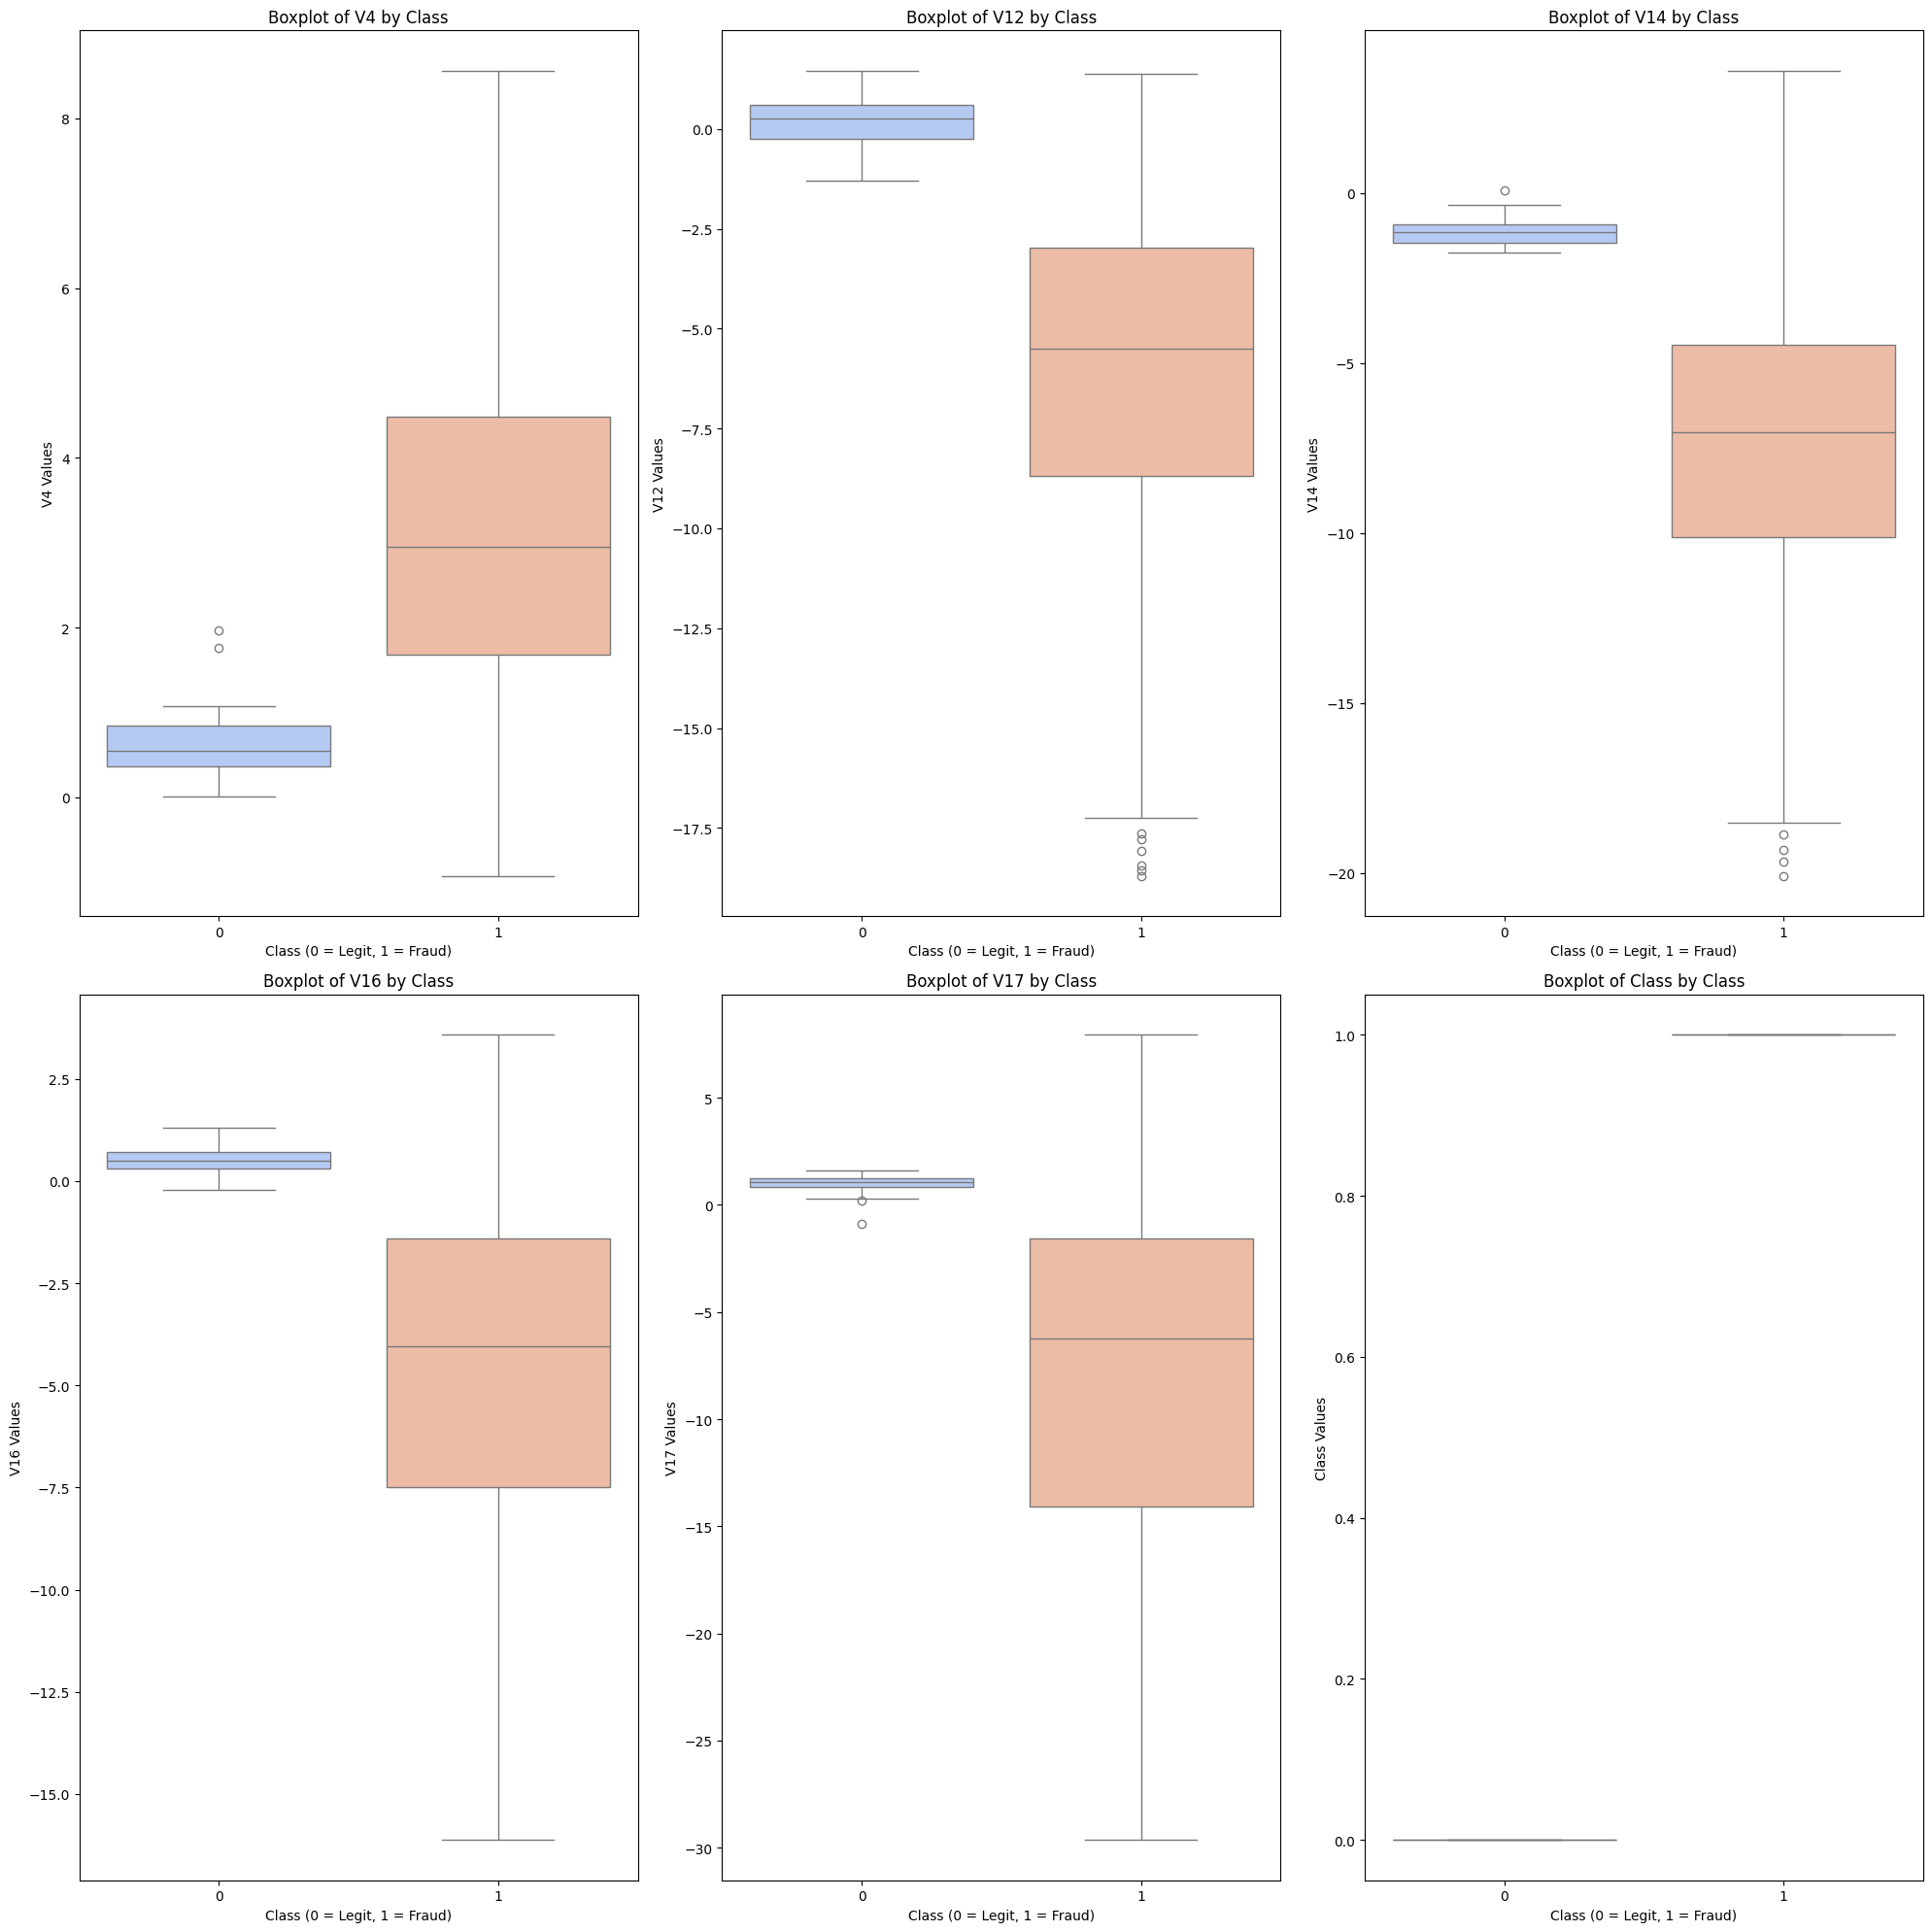

In [25]:
plt.figure(figsize=(24,20))

corr = ndf.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("NearMiss Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

threshold = 0.6  # Adjust as needed

# Compute correlation with the "Class" column
corr_with_class = ndf.corr()['Class']  # Drop 'Class' itself

# Find columns with correlation above the threshold (absolute value)
high_corr_features = corr_with_class[abs(corr_with_class) > threshold]

# Display results
print(f"Features with correlation above threshold: {threshold}\n", high_corr_features)
print(len(high_corr_features))

plt.figure(figsize=(10, 6))
sns.heatmap(ndf[high_corr_features.index].corr().drop('Class'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title(f"Partial Correlation \n Features with Correlation > {threshold} with Class")
plt.show()

boxplot_high_corr(ndf[list(pd.DataFrame(high_corr_features).index)], 2, 3)

In [26]:
nearX, neary = ndf.drop(['Class'], axis=1), ndf['Class']

near_selected = list(high_corr_features.index)

**with SMOTE dataframe**

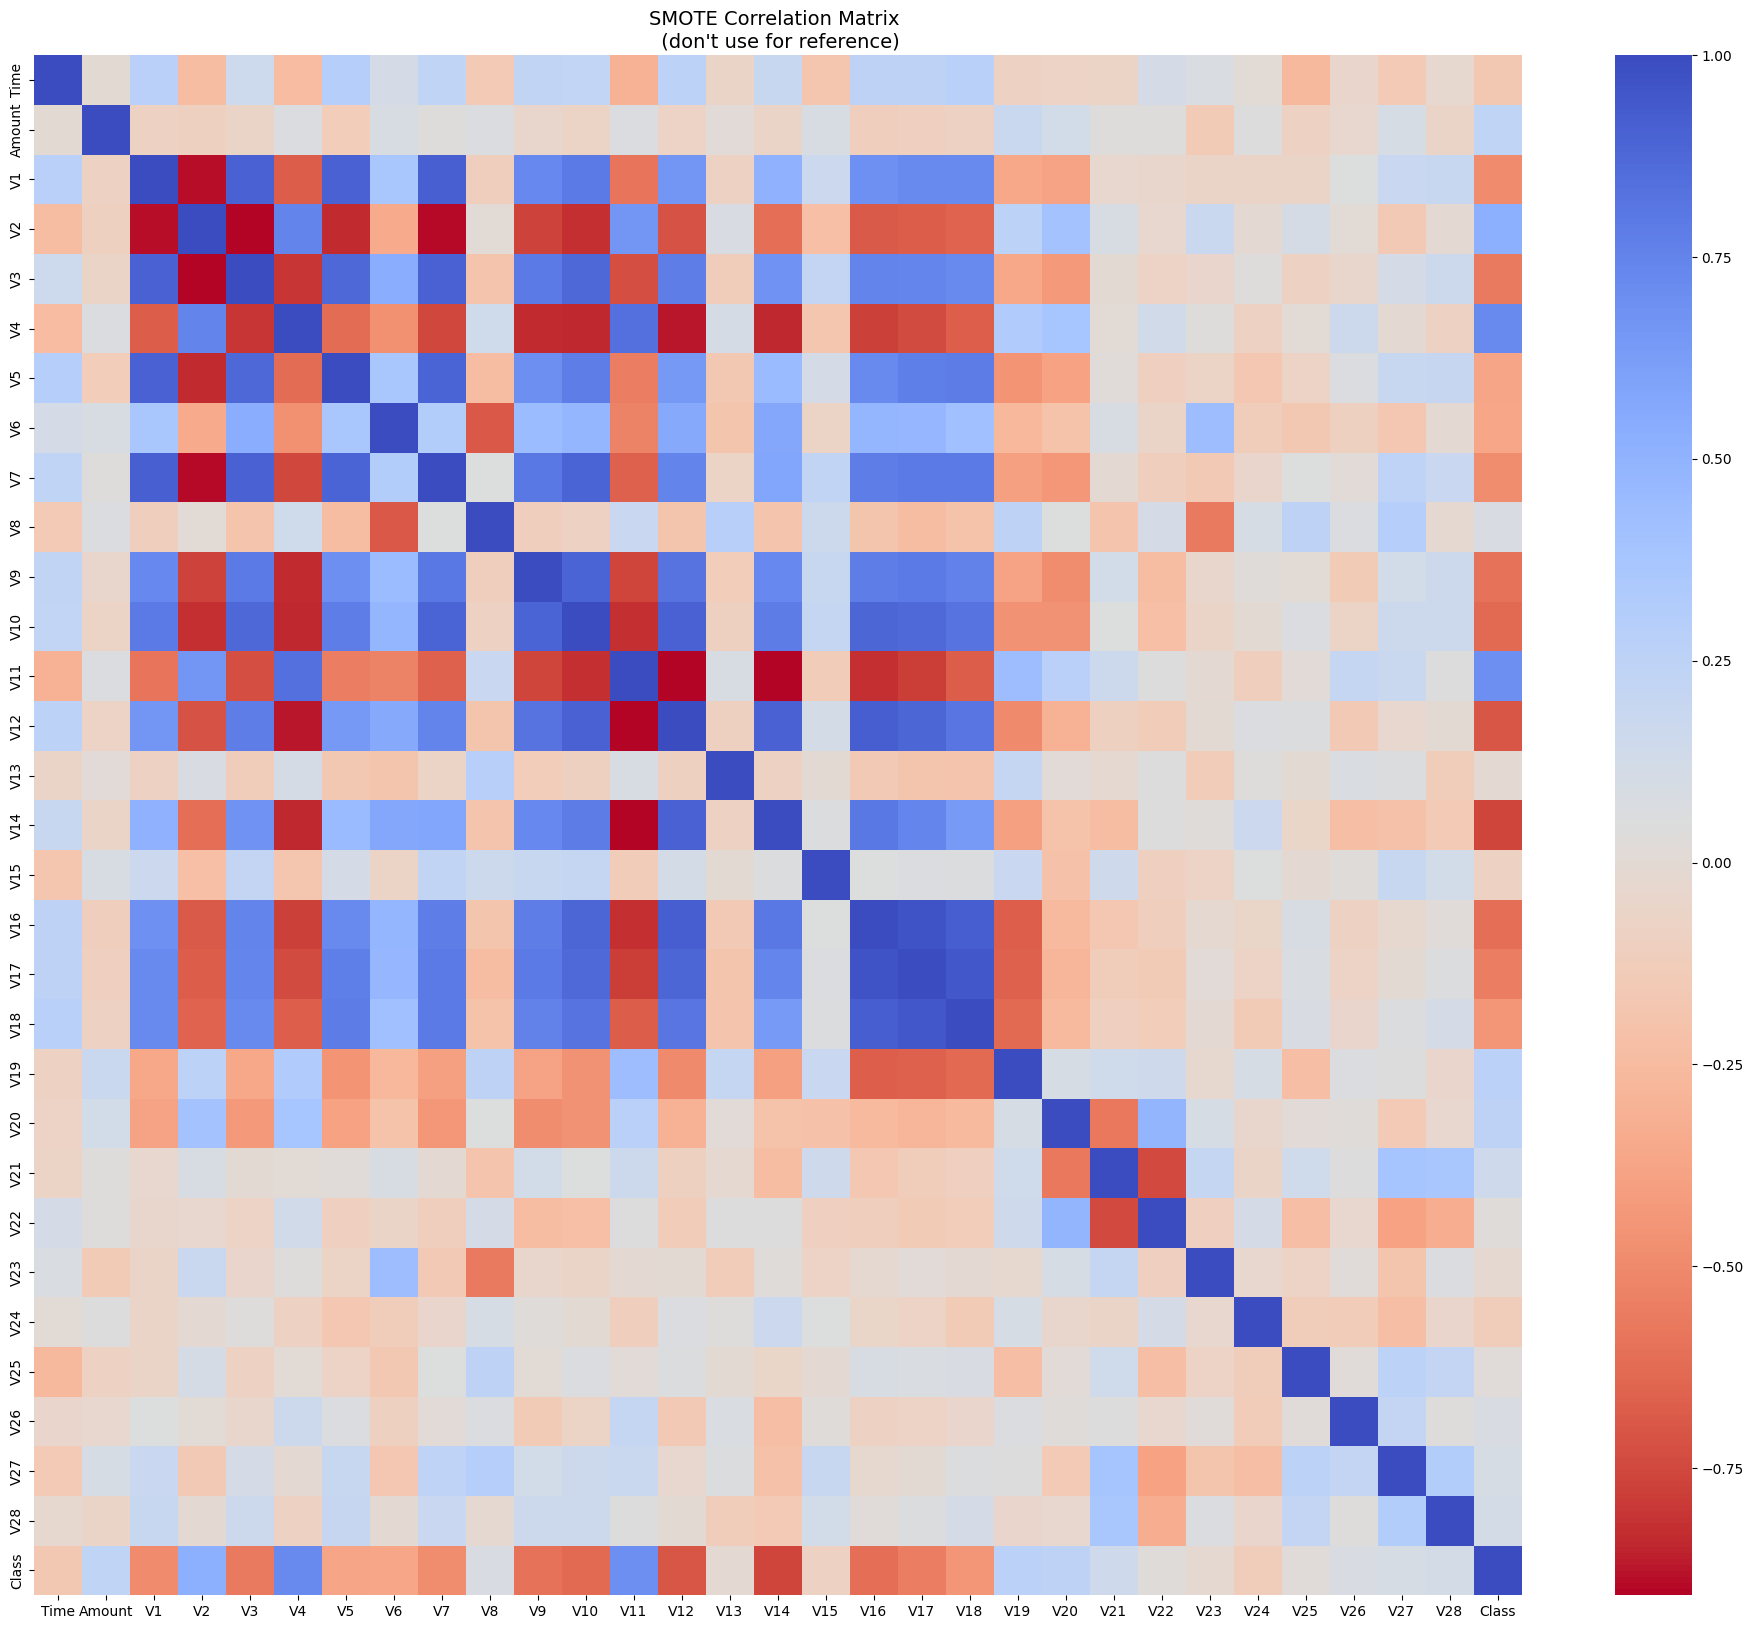

Features with correlation above threshold: 0.6
 V4       0.719886
V10     -0.635643
V11      0.698389
V12     -0.700716
V14     -0.761317
V16     -0.613499
Class    1.000000
Name: Class, dtype: float64
7


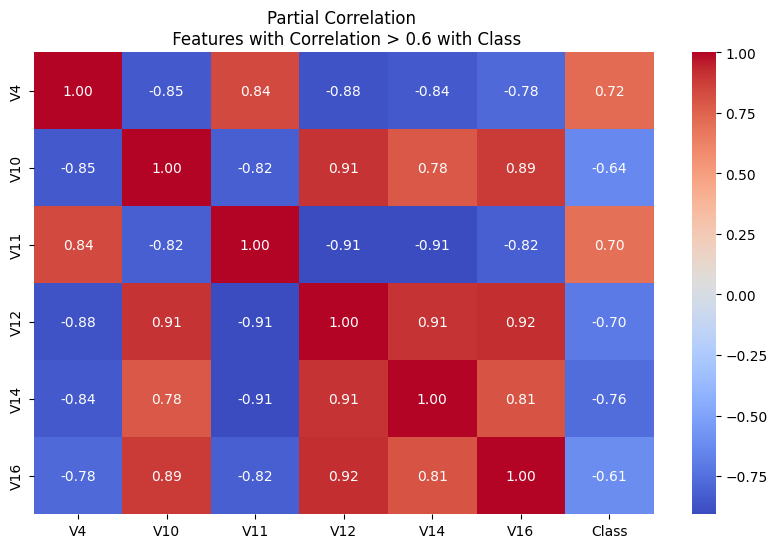

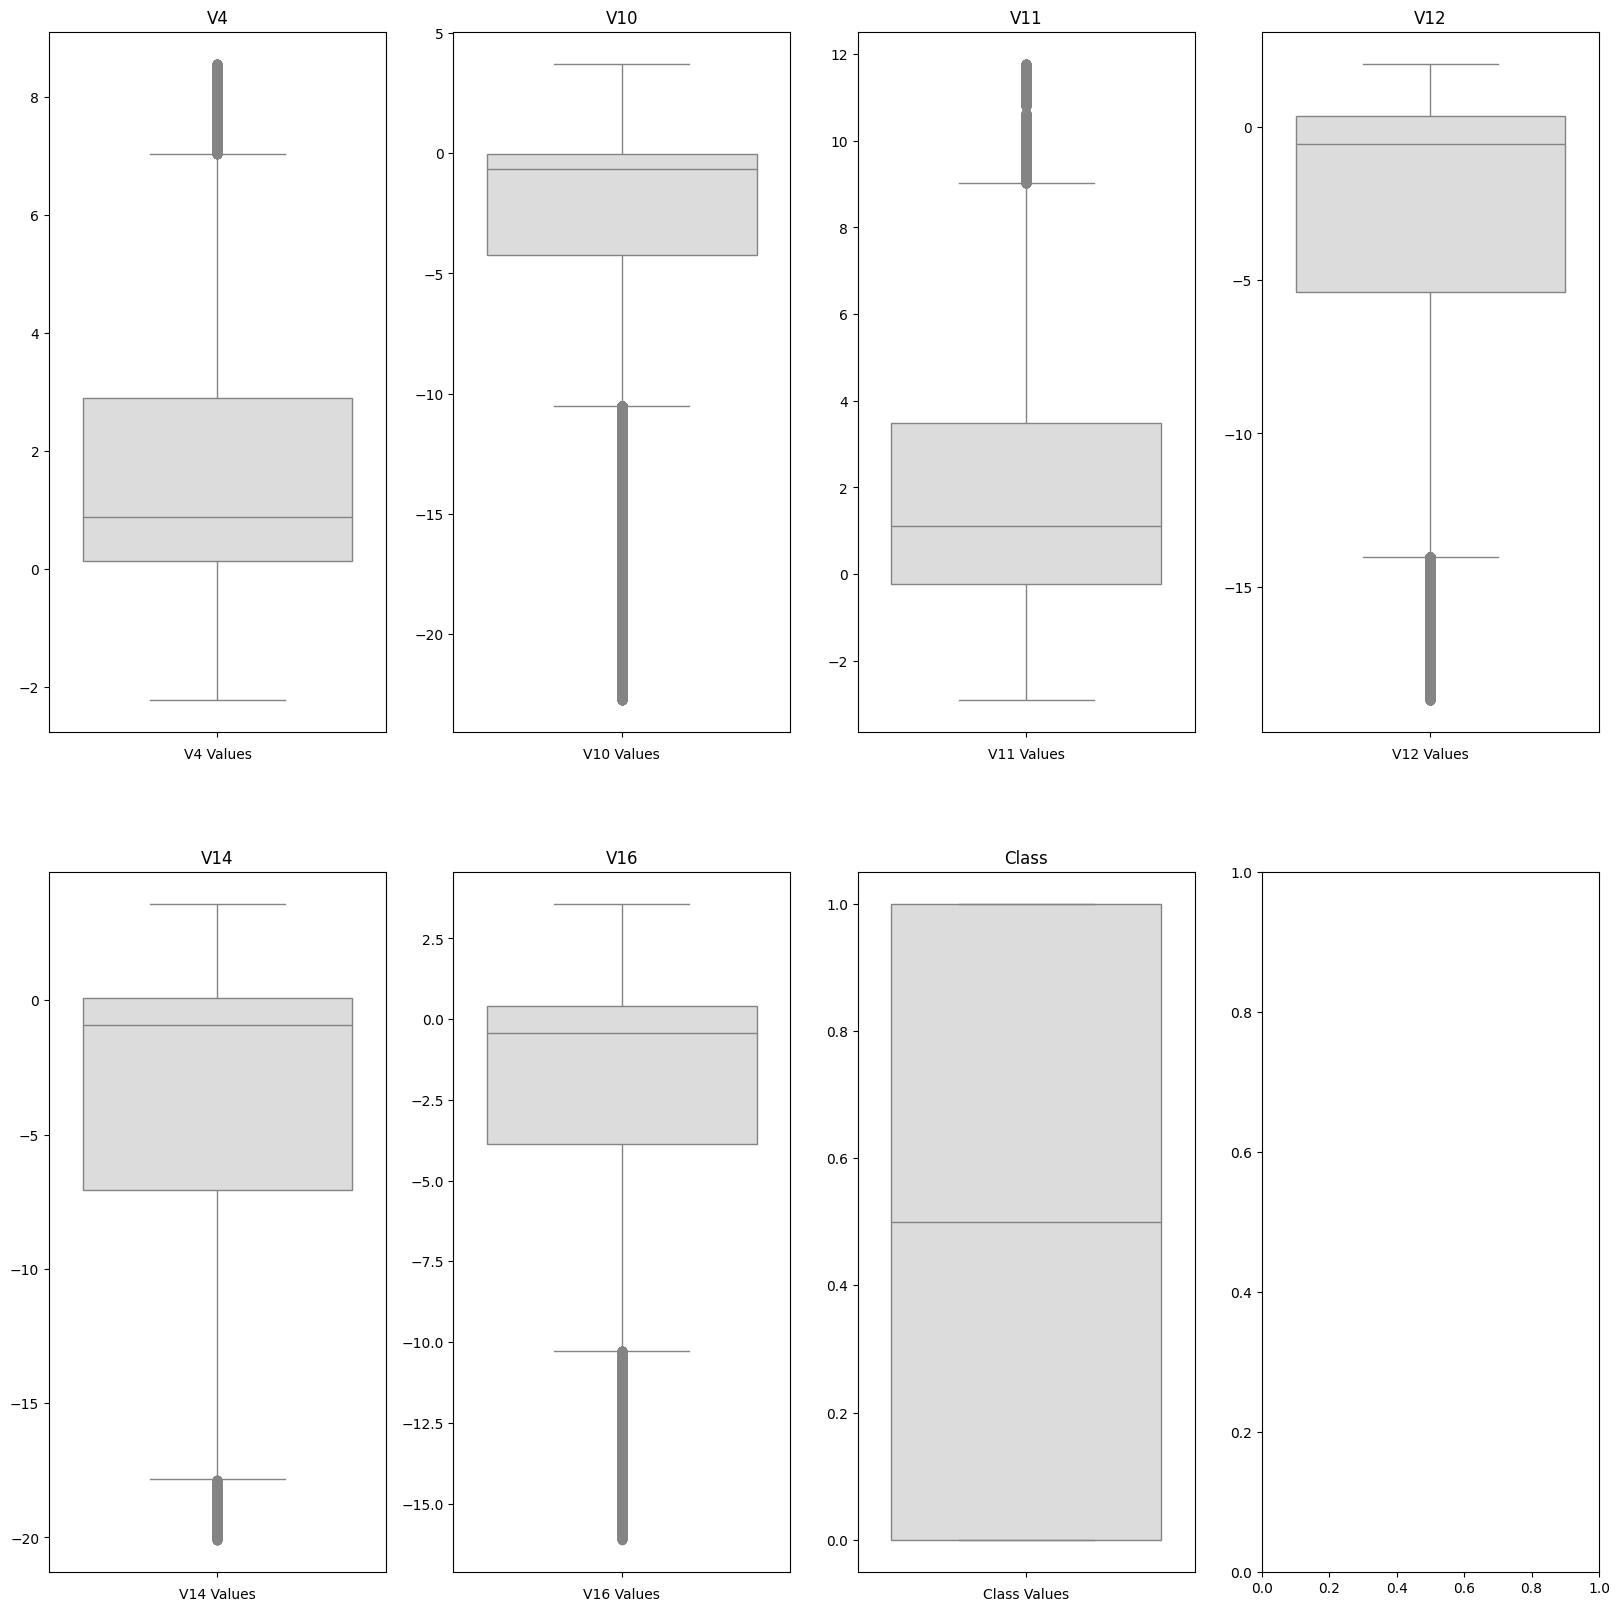

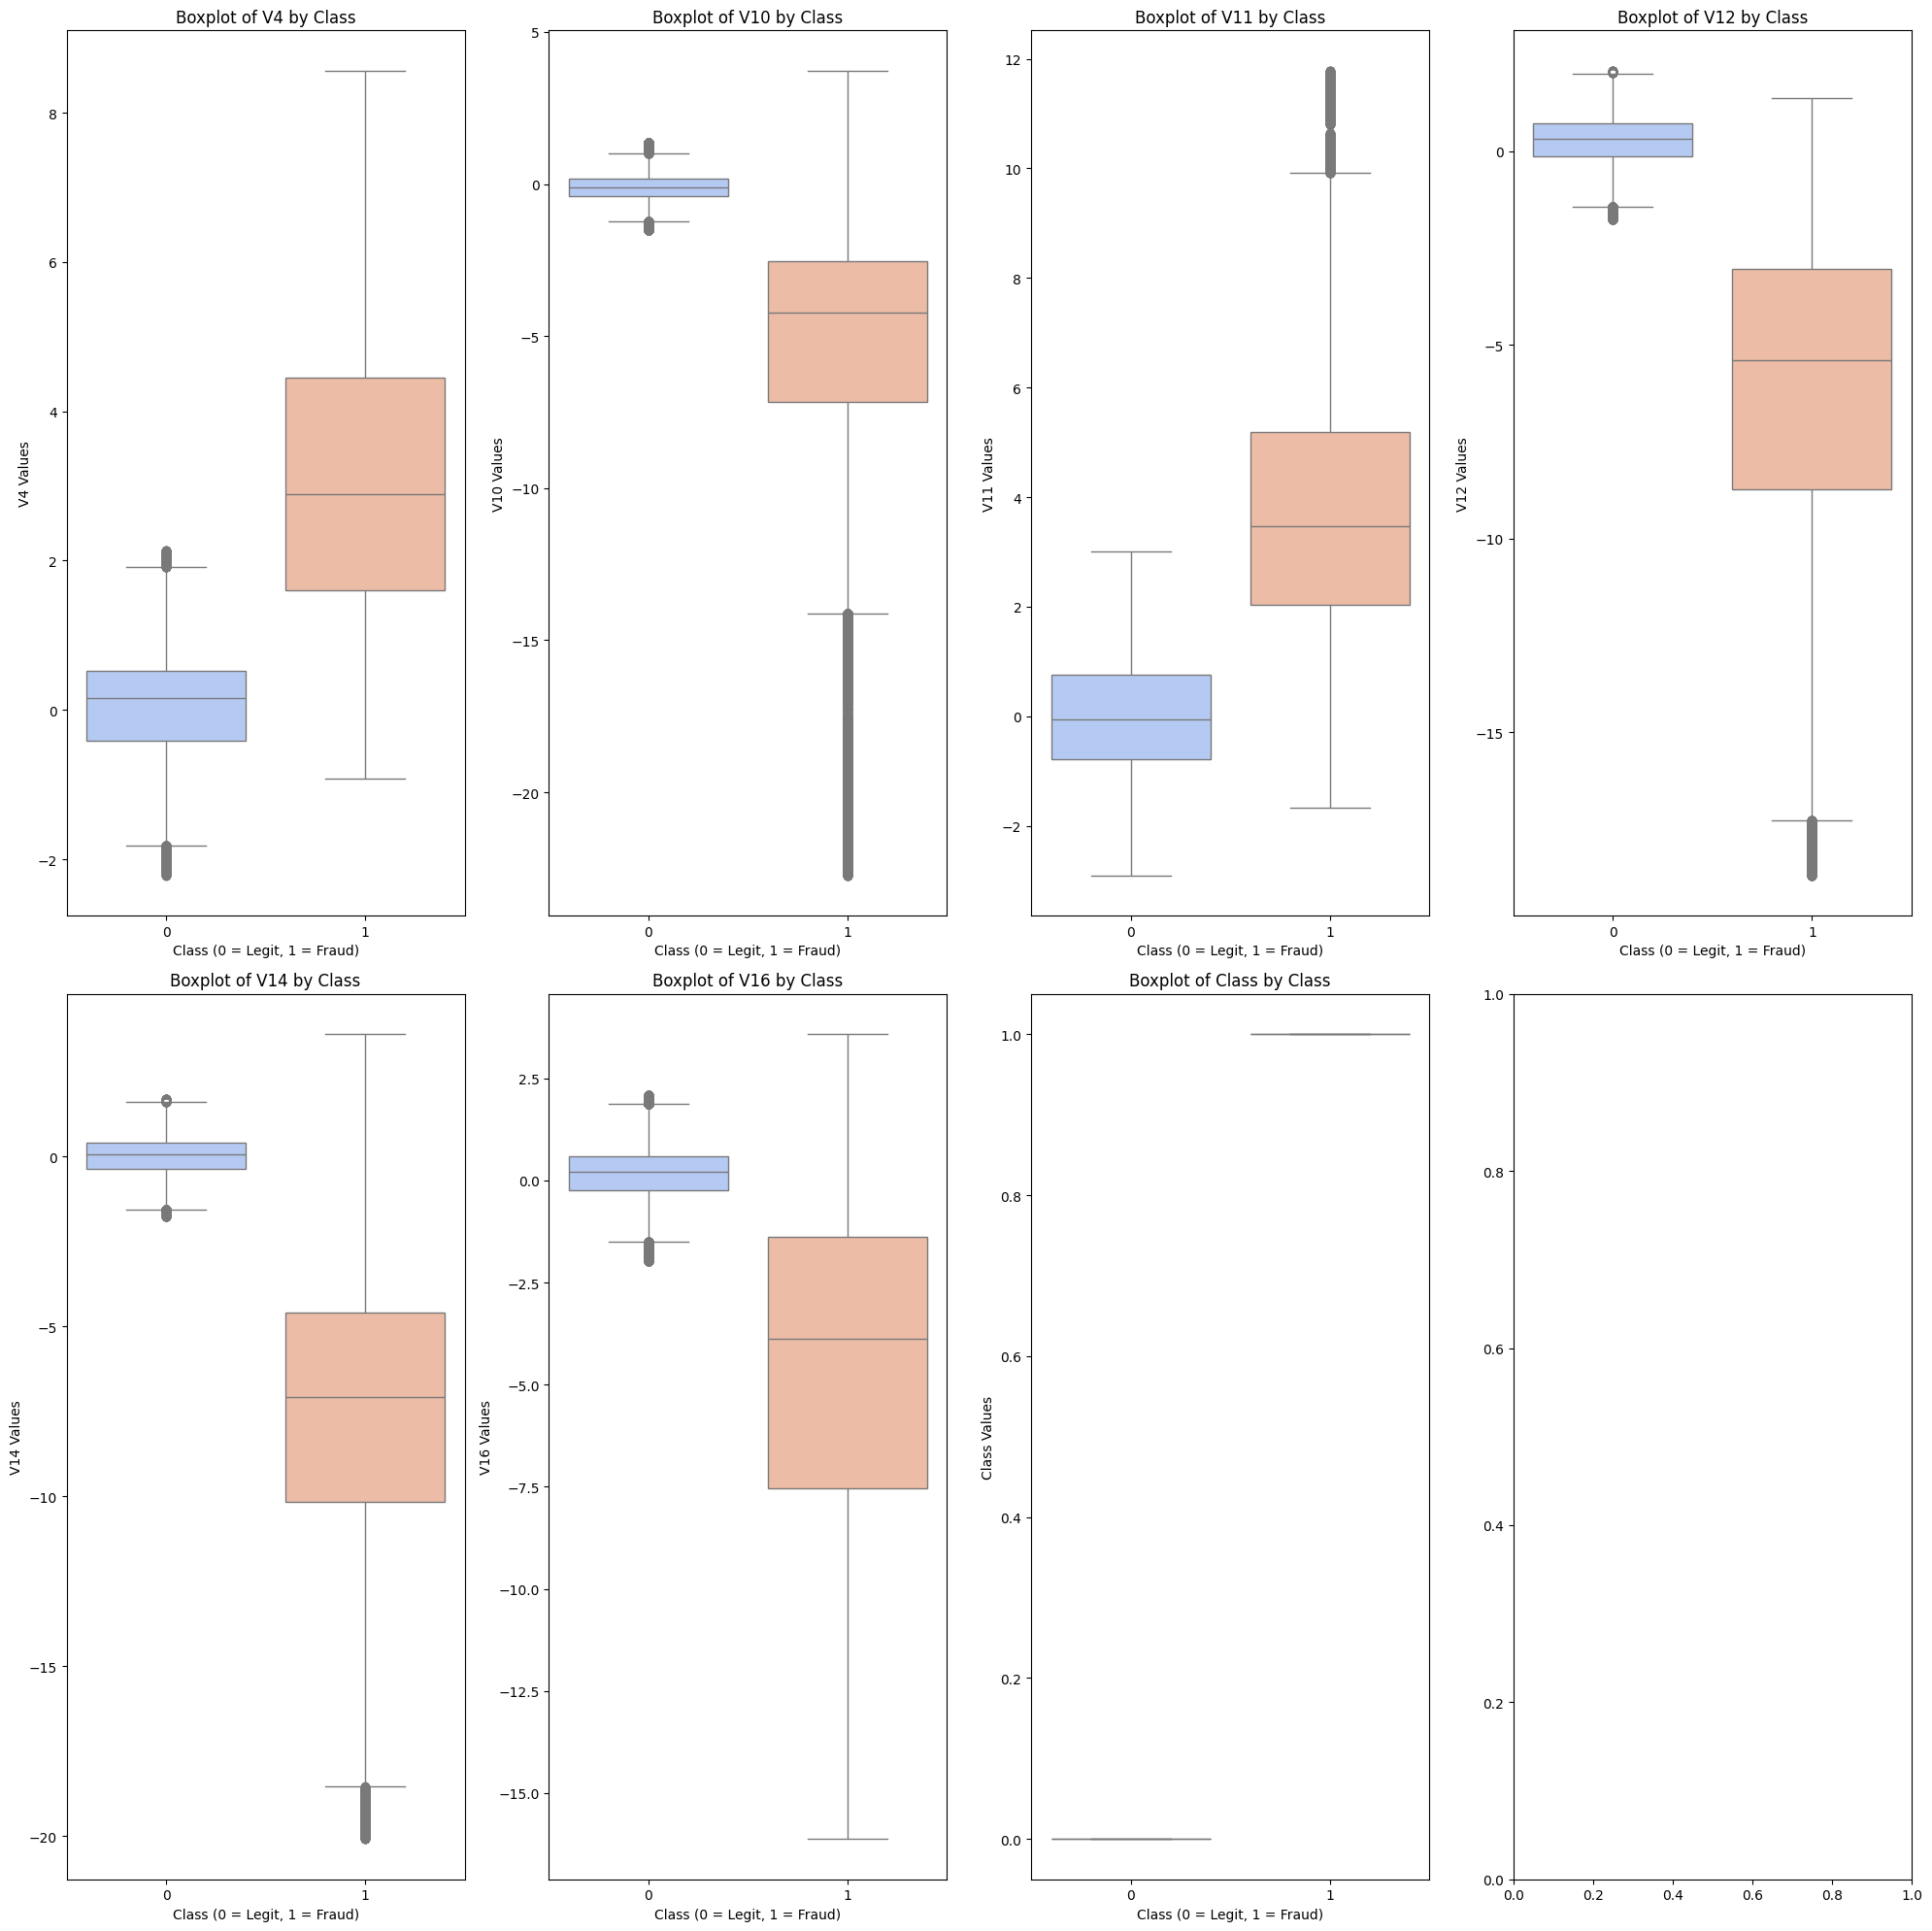

In [27]:
plt.figure(figsize=(24,20))

corr = sdf.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("SMOTE Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

threshold = 0.6  # Adjust as needed

# Compute correlation with the "Class" column
corr_with_class = sdf.corr()['Class']  # Drop 'Class' itself

# Find columns with correlation above the threshold (absolute value)
high_corr_features = corr_with_class[abs(corr_with_class) > threshold]

# Display results
print(f"Features with correlation above threshold: {threshold}\n", high_corr_features)
print(len(high_corr_features))

plt.figure(figsize=(10, 6))
sns.heatmap(sdf[high_corr_features.index].corr().drop('Class'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title(f"Partial Correlation \n Features with Correlation > {threshold} with Class")
plt.show()

boxplot_high_corr(sdf[list(pd.DataFrame(high_corr_features).index)], 2, 4)

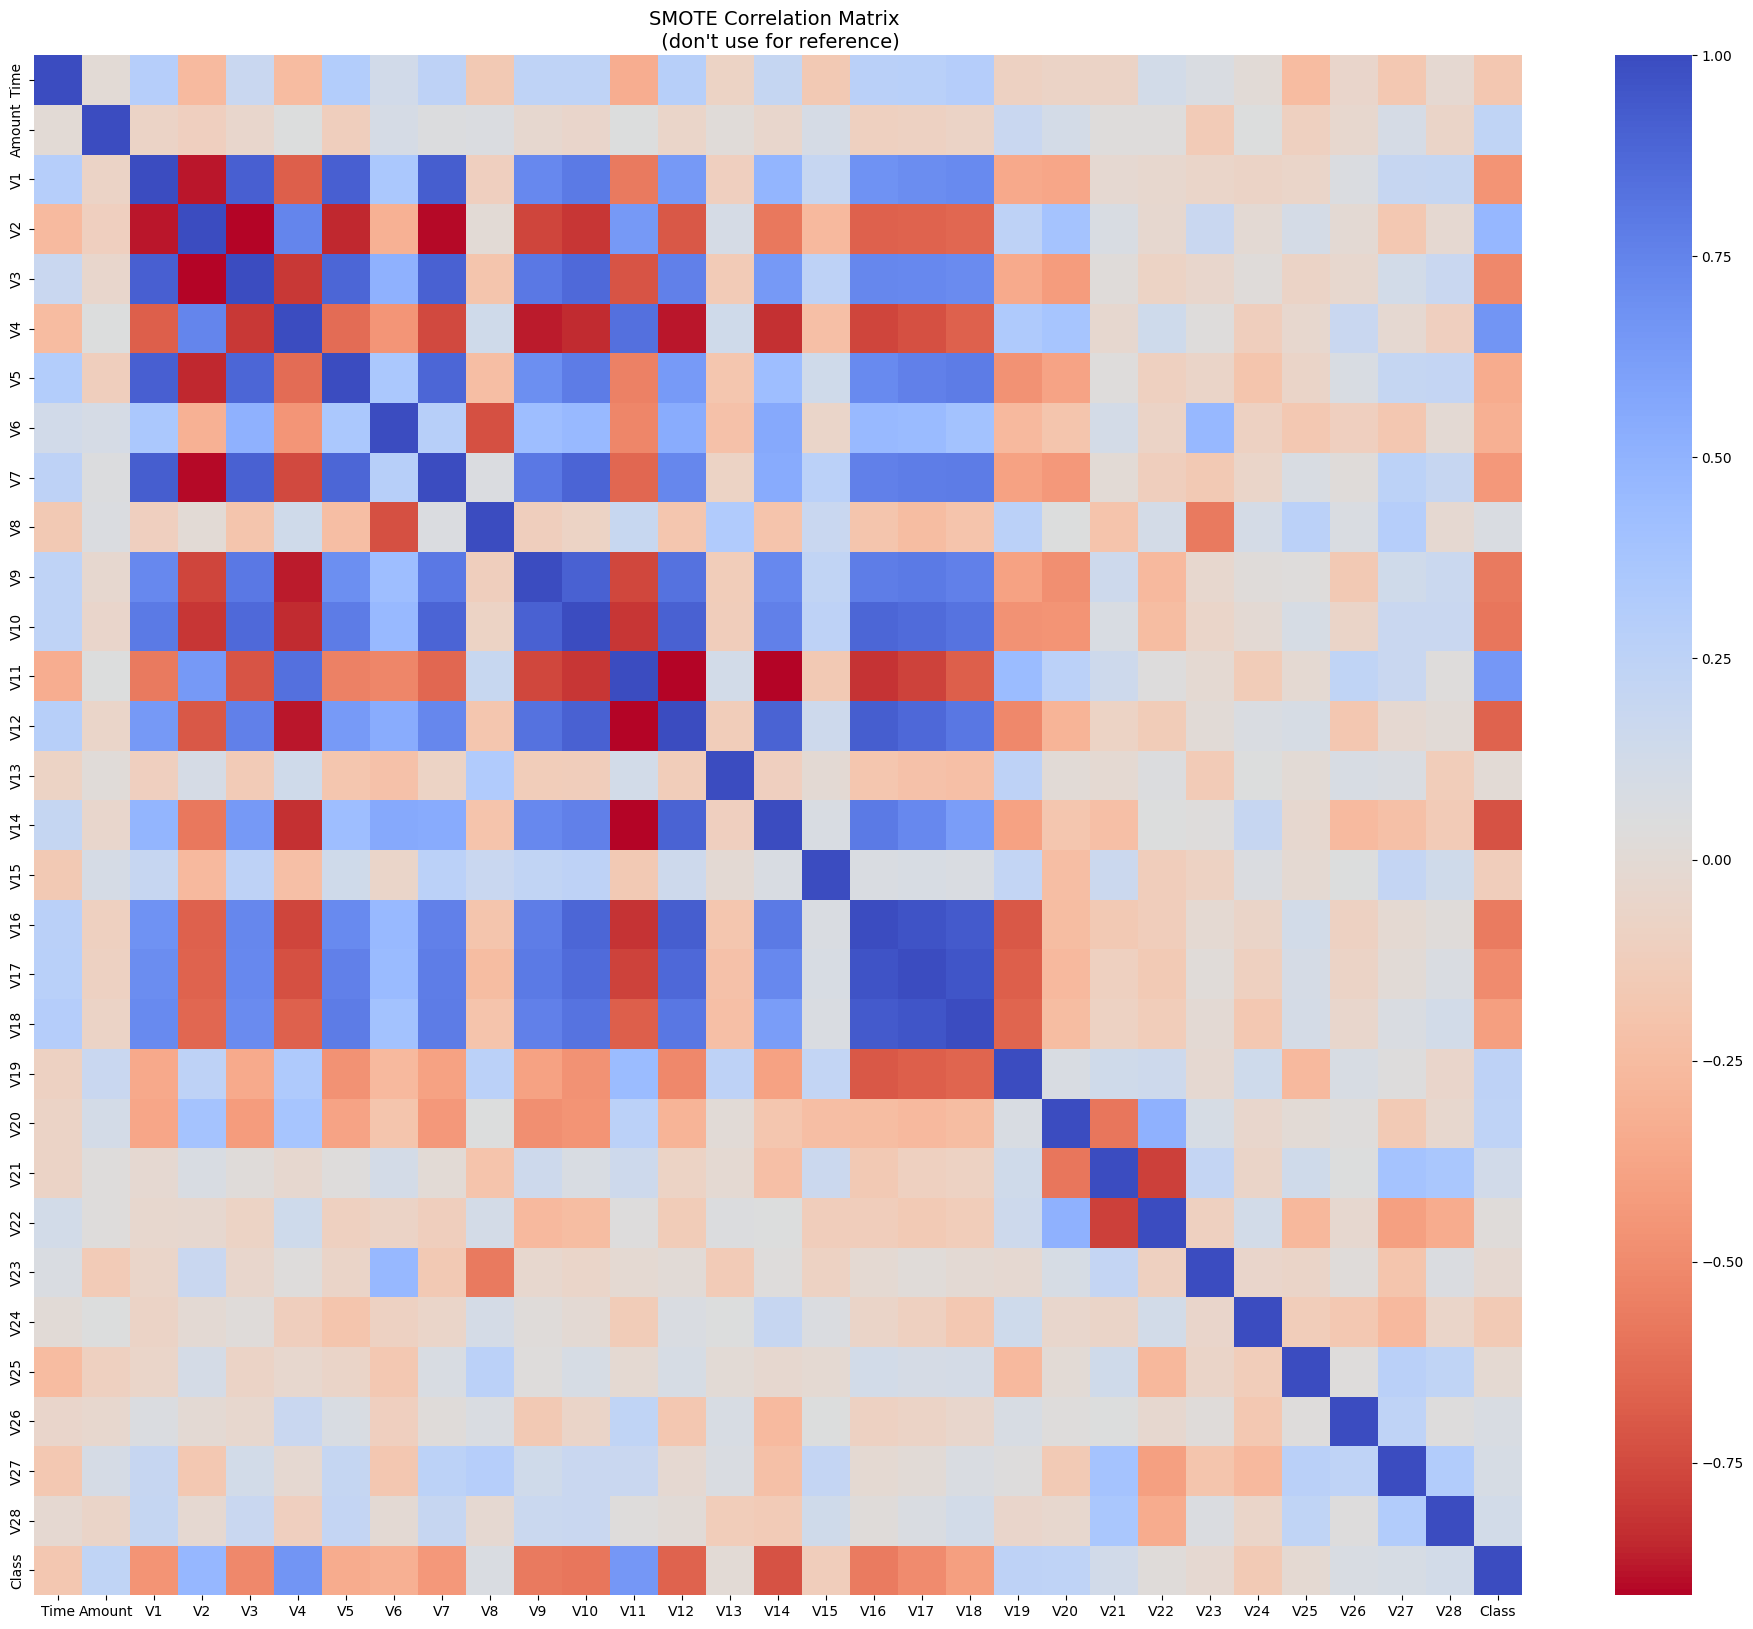

Features with correlation above threshold: 0.6
 V4       0.667339
V11      0.654889
V12     -0.661084
V14     -0.722575
Class    1.000000
Name: Class, dtype: float64
5


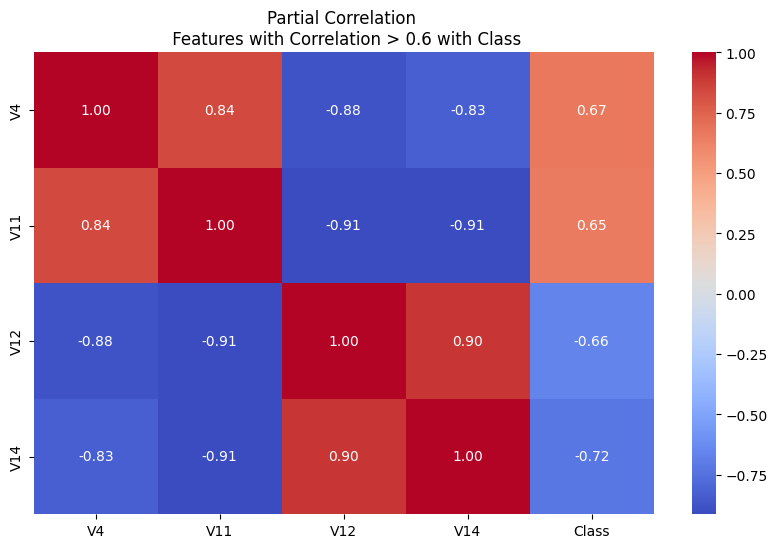

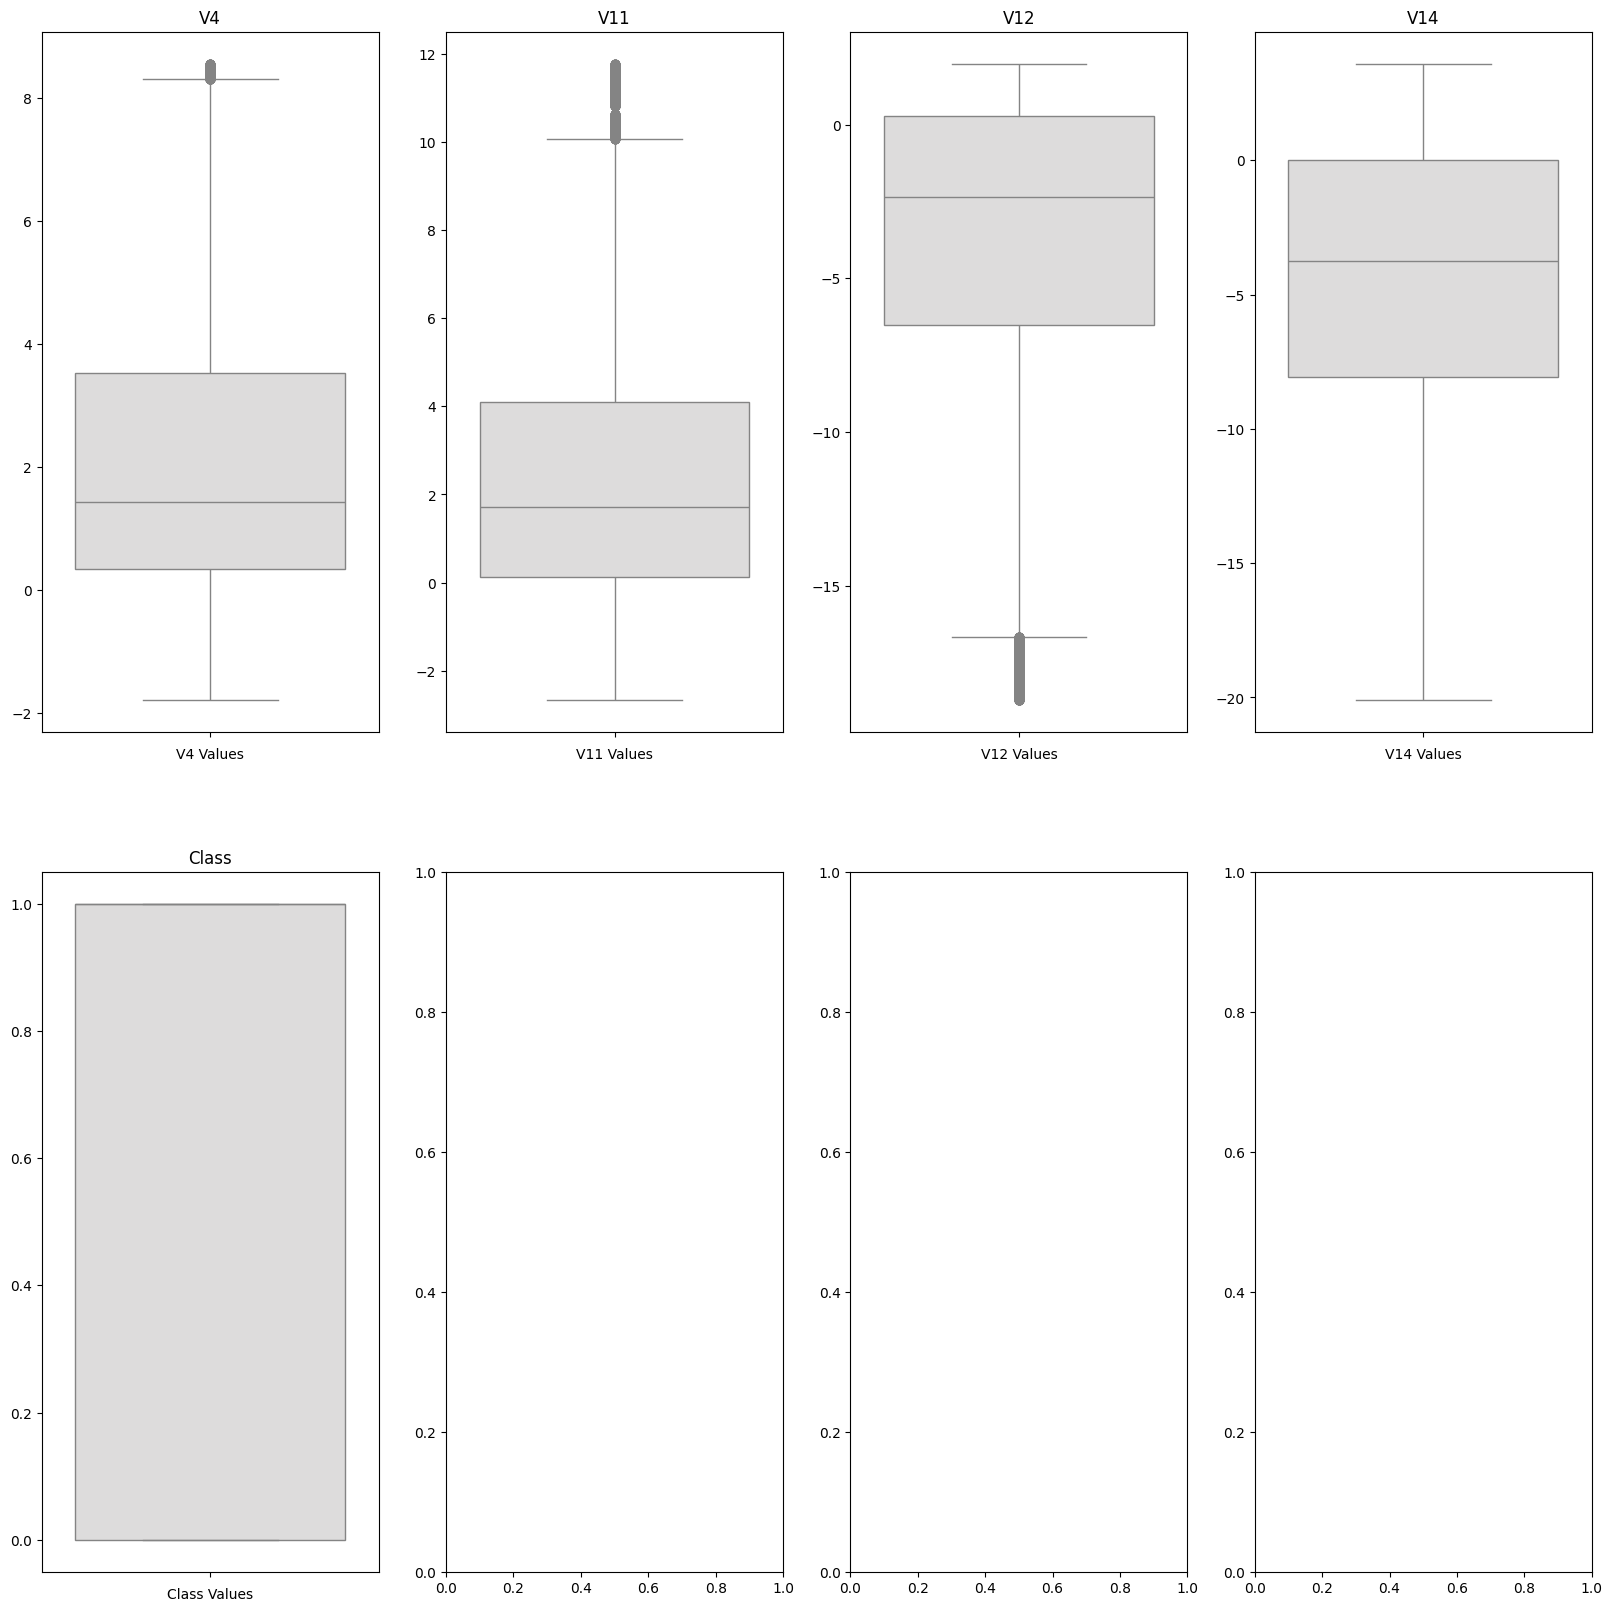

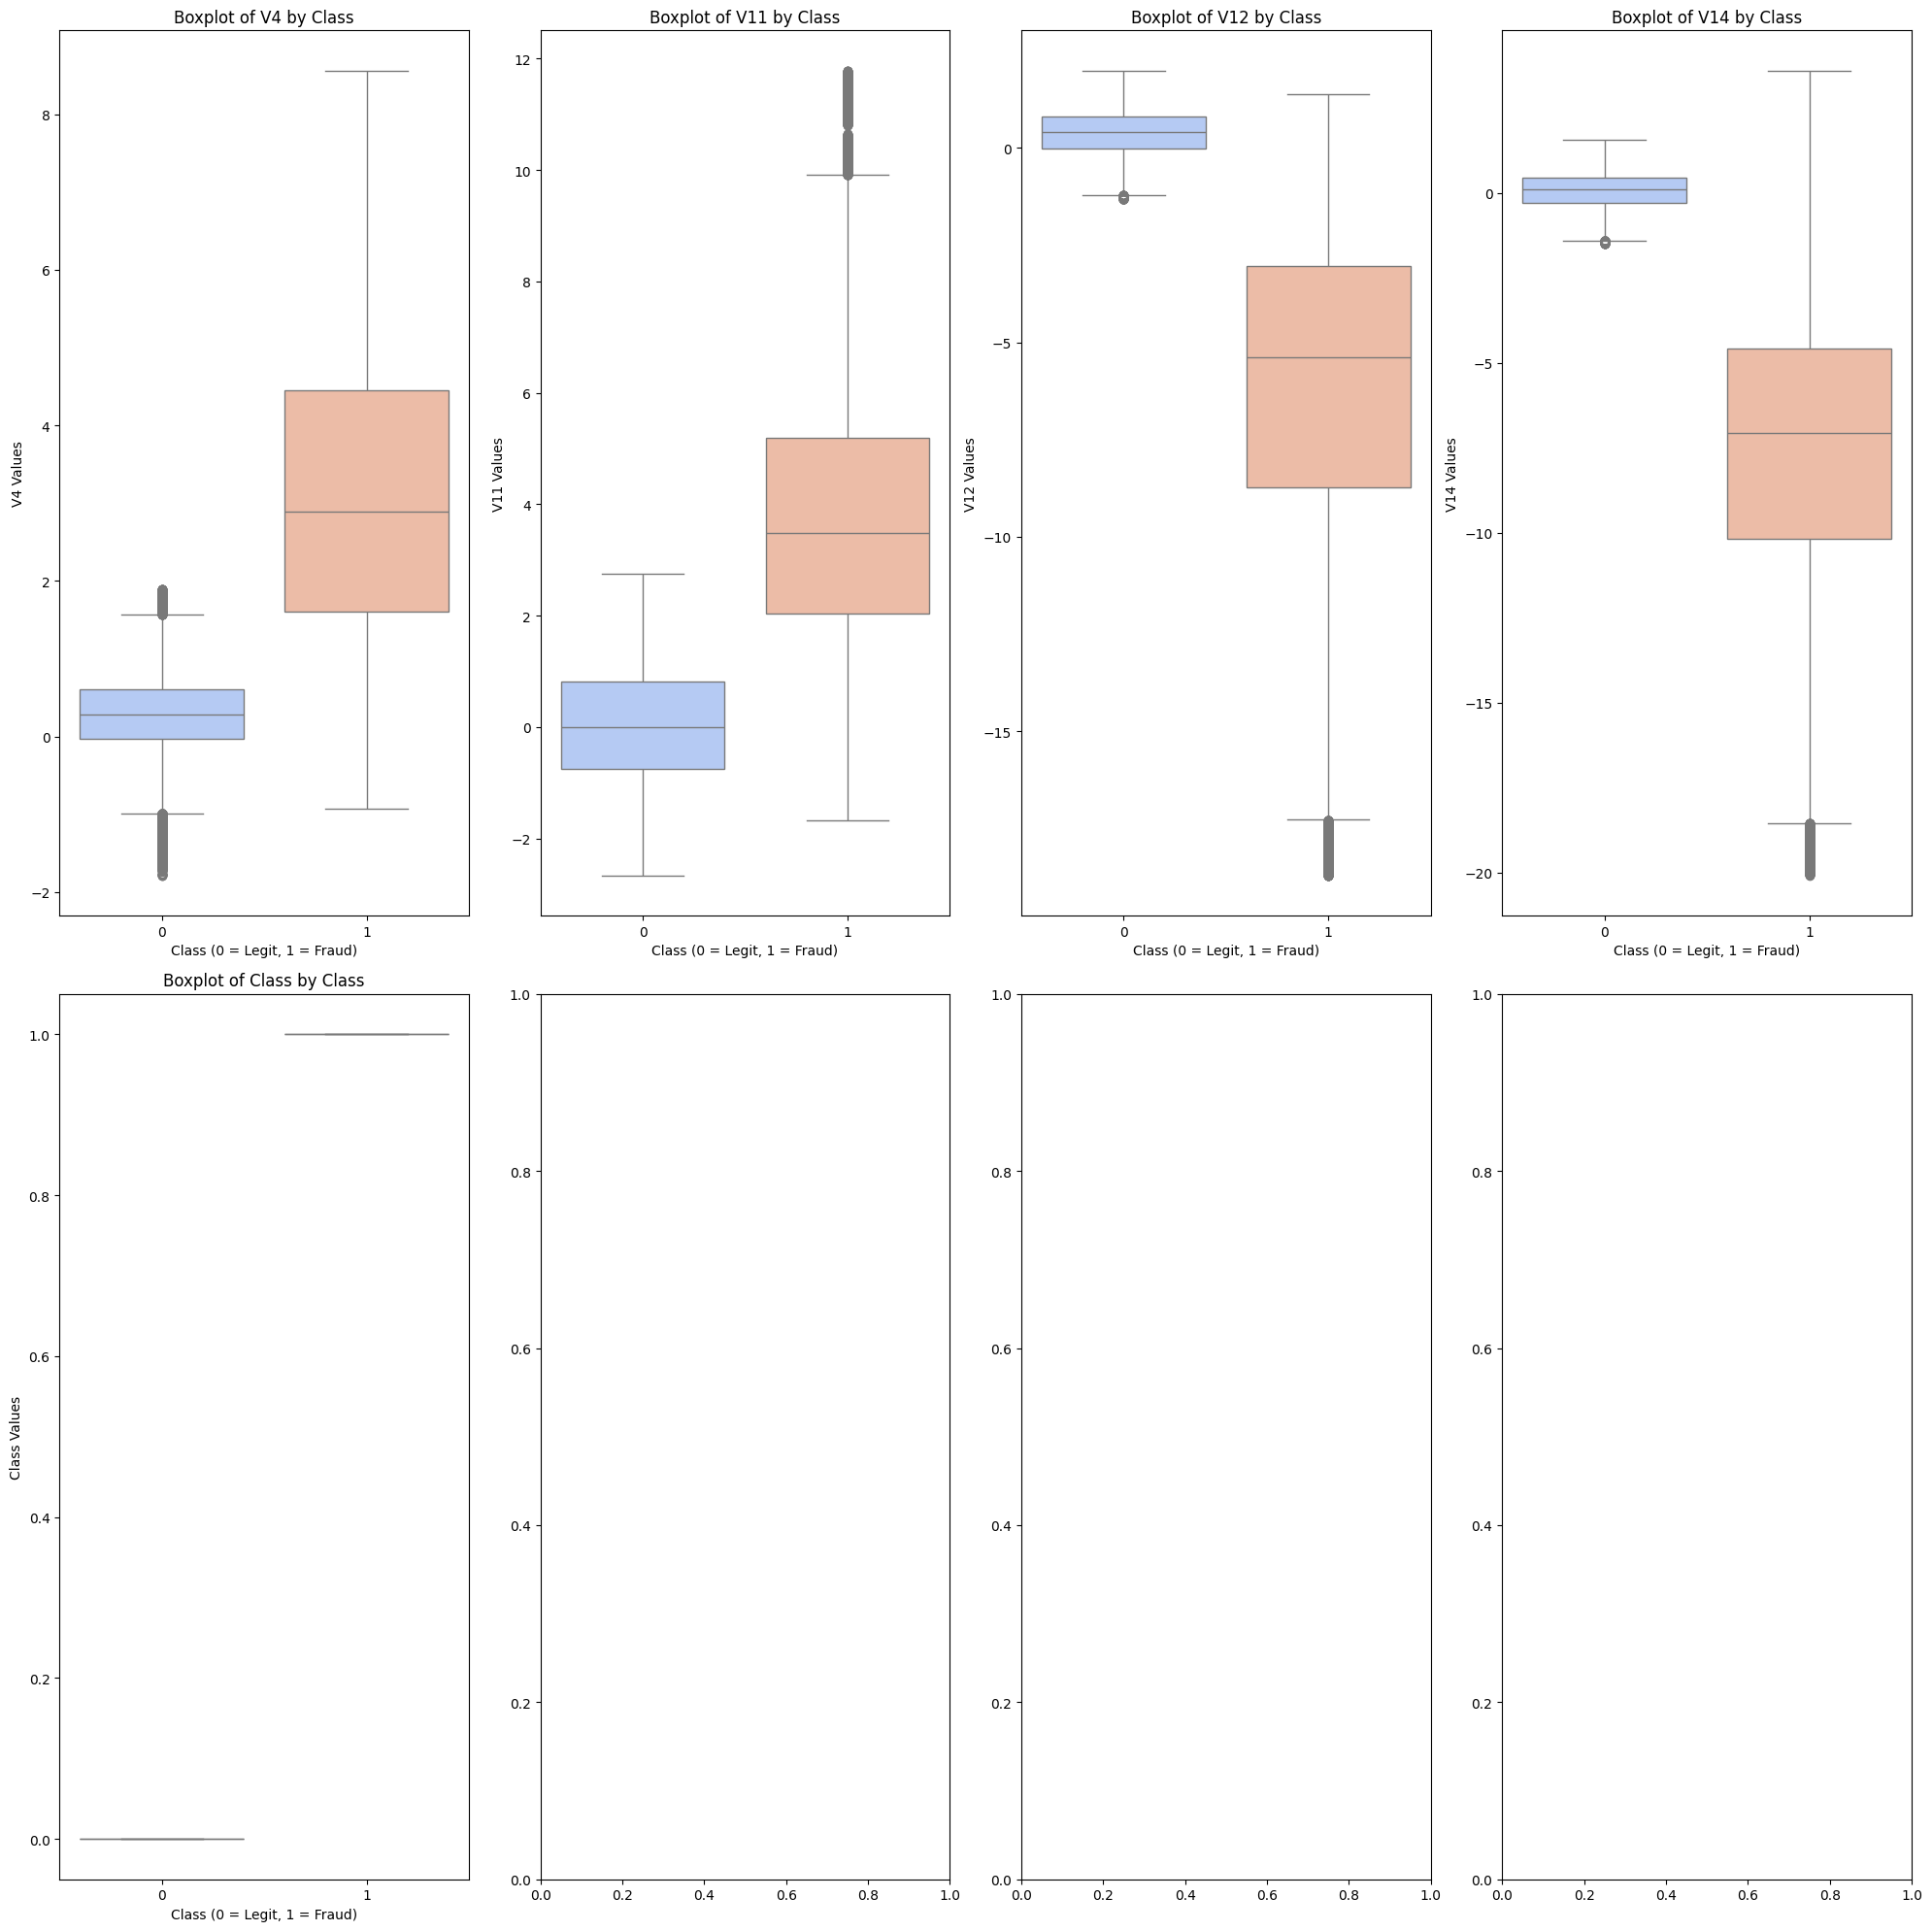

In [28]:
sdf1 = remove_outliers_iqr(sdf)

plt.figure(figsize=(24,20))

corr = sdf1.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("SMOTE Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

threshold = 0.6  # Adjust as needed

# Compute correlation with the "Class" column
corr_with_class = sdf1.corr()['Class']  # Drop 'Class' itself

# Find columns with correlation above the threshold (absolute value)
high_corr_features = corr_with_class[abs(corr_with_class) > threshold]

# Display results
print(f"Features with correlation above threshold: {threshold}\n", high_corr_features)
print(len(high_corr_features))

plt.figure(figsize=(10, 6))
sns.heatmap(sdf1[high_corr_features.index].corr().drop('Class'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title(f"Partial Correlation \n Features with Correlation > {threshold} with Class")
plt.show()

boxplot_high_corr(sdf1[list(pd.DataFrame(high_corr_features).index)], 2, 4)

In [29]:
sdf1.Class.value_counts()

Class
1    110402
0     69281
Name: count, dtype: int64

In [30]:
smoteX, smotey = sdf1.drop(['Class'], axis=1), sdf1['Class']

smote_selected = list(high_corr_features.index)

Feature Selection with RFE

In [31]:
def find_features(X, y):

    # Initialize Logistic Regression model
    model = LogisticRegression(solver='liblinear', max_iter=500, verbose=1)
    rfe = RFE(model )
    rfe.fit(X, y)

    # Get selected features
    selected_features = [feature for feature, selected in zip(features, rfe.support_) if selected]

    print("Selected Features:", selected_features)
    
    X = X[selected_features]
    new_df = pd.concat([X,y], axis=1)
    print(new_df.head())
    return X, y, new_df

In [32]:
imbalanced_selected_X, imbalanced_selected_y, imbalanced_selected_df = find_features(imbalancedX, imbalancedy)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Selected Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V12', 'V13', 'V15', 'V20', 'V21', 'V28', 'Amount']
              V1        V2        V3        V4        V5        V7        V8  \
21772  -0.345928  0.333979  1.815939  0.203604 -0.450370  0.028330  0.208149   
76569   1.046864  0.090921 -1.133872  0.389528  0.055800  0.184297 -0.296701   
36653   0.600310 -0.120288  0.811649  0.615935 -0.821820 -0.529008  0.084685   
45773   0.545784 -0.023084  0.296117  0.962164 -0.279870 -0.114981  0.192482   
110096  1.103424  0.051598 -1.579110 -0.067057  0.566625  0.668770 -0.490062   

              V9       V12       V13       V15       V20       V21       V28  \
21772   0.149565  0.500495  0.124503  0.202192 -0.041194  0.082839  0.343384   
76569   0.645471 -0.338384 -0.772372  1.071620 -0.321040  0.258

In [33]:
def test_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print("Classifiers: ", {model.__class__.__name__}, f"Has a {round(accuracy * 100)}% accuracy score")
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

In [34]:
cor_sel_df = df[imbalanced_selected]
cor_sel_X, cor_sel_y = cor_sel_df.drop(['Class'], axis=1), cor_sel_df['Class']
X, x, Y, y = train_test_split(cor_sel_X, cor_sel_y, test_size=0.2, random_state=42)
print('\n------Cor selected variables------------\n')
test_performance(LogisticRegression(solver='liblinear'), X, Y, x, y)

imb_sel_X, imb_sel_y = imbalanced_selected_df.drop(['Class'], axis=1), imbalanced_selected_df['Class']
X, x, Y, y = train_test_split(imb_sel_X, imb_sel_y, test_size=0.2, random_state=42)
print('\n------rfe selected variables------------\n')
test_performance(LogisticRegression(solver='liblinear'), X, Y, x, y)


------Cor selected variables------------

Classifiers:  {'LogisticRegression'} Has a 100% accuracy score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22078
           1       1.00      0.85      0.92       101

    accuracy                           1.00     22179
   macro avg       1.00      0.93      0.96     22179
weighted avg       1.00      1.00      1.00     22179

[[22078     0]
 [   15    86]]

------rfe selected variables------------

Classifiers:  {'LogisticRegression'} Has a 100% accuracy score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22078
           1       1.00      0.87      0.93       101

    accuracy                           1.00     22179
   macro avg       1.00      0.94      0.97     22179
weighted avg       1.00      1.00      1.00     22179

[[22078     0]
 [   13    88]]


In [35]:
balX, baly, baldf = find_features(balX, baly)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Selected Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V12', 'V13', 'V15', 'V16', 'V23', 'V28']
           Time        V1        V2        V3        V4        V5        V6  \
22103 -0.961183  0.651772  0.367289 -0.386383  0.623531  0.032434 -1.105290   
14621 -1.130435 -2.357776  3.085447 -5.005373  5.333955 -5.039406 -1.297036   
65630  0.503676  1.023655 -0.275543 -0.268488  0.260790 -0.398518 -0.086835   
29181 -0.804274 -4.051919  1.652133 -5.206681  4.487641 -3.974279 -0.249111   
84456  0.984725  0.056282  0.467188 -0.326644  0.084312  0.628525 -0.357889   

             V7        V9        V12       V13       V15        V16       V23  \
22103  0.290302 -0.046567  -0.543805 -0.844296  1.147720   0.669638 -0.120559   
14621 -6.626758 -6.459791 -14.483881  0.300461  0.563015 -15.480131  

In [36]:
bal_sel_df = bal_df[bal_selected]
cor_sel_X, cor_sel_y = bal_sel_df.drop(['Class'], axis=1), bal_sel_df['Class']
X, x, Y, y = train_test_split(cor_sel_X, cor_sel_y, test_size=0.2, random_state=42)
print('\n------cor selected variables------------\n')
test_performance(LogisticRegression(solver='liblinear'), X, Y, x, y)

bal_X, bal_y = baldf.drop(['Class'], axis=1), baldf['Class']
X, x, Y, y = train_test_split(bal_X, bal_y, test_size=0.2, random_state=42)
print('\n------rfe selected variables------------\n')
test_performance(LogisticRegression(solver='liblinear'), X, Y, x, y)


------cor selected variables------------

Classifiers:  {'LogisticRegression'} Has a 91% accuracy score
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        87
           1       0.99      0.85      0.92       110

    accuracy                           0.91       197
   macro avg       0.92      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197

[[86  1]
 [16 94]]

------rfe selected variables------------

Classifiers:  {'LogisticRegression'} Has a 93% accuracy score
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.97      0.90      0.93       110

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

[[84  3]
 [11 99]]


RFE selected variables performs better

In [37]:
near_X, near_y, near_df = find_features(nX, ny)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Selected Features: ['V1', 'V2', 'V4', 'V7', 'V8', 'V9', 'V11', 'V13', 'V15', 'V16', 'V17', 'V18', 'V21', 'V23', 'V28']
         V1        V2        V4        V7        V8        V9       V11  \
0  0.640508  0.314668  0.762075  0.099681  0.011930  0.133893 -0.670008   
1  0.600377  0.336994  0.536775  0.180660 -0.029797 -0.382965  2.225235   
2  0.600326  0.330939  0.537721  0.173096 -0.023221 -0.363933  2.202195   
3  0.946710 -0.129317  0.256708  0.184988 -0.179717  0.834756 -0.600347   
4  0.600377  0.336994  0.536775  0.180660 -0.029797 -0.382965  2.225235   

        V13       V15       V16       V17       V18       V21       V23  \
0 -1.048931  1.635469  0.581295  0.838849  0.512511 -0.126455 -0.288585   
1 -0.381590  0.568695  0.458514  1.352045  0.314043 -0.085954 -0.063513   
2 -0.520016  0.585219  0.4658

In [38]:
smote_X, smote_y, smote_df = find_features(sX, sy)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Selected Features: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V15', 'V21', 'V24', 'Amount']
         V1        V2        V3        V5        V6        V7        V8  \
0 -0.699502 -0.042002  1.674066 -0.246236  0.347948  0.193218  0.084129   
1  0.608163  0.163563  0.109490  0.042578 -0.060938 -0.064379  0.072708   
2 -0.220932  0.584707  0.752936  0.304298 -0.021431  0.384637  0.219890   
3  0.627535  0.087660  0.029534  0.138185  0.205575 -0.004799  0.069442   
4 -0.175985  0.681184  0.689067  0.361122 -0.184336  0.526527  0.059635   

         V9       V10       V11       V13       V15       V21       V24  \
0  0.333562  0.085984 -0.541403 -0.996513  1.603621 -0.025079  0.110166   
1 -0.231304 -0.152371  1.580622  0.490766  0.693569 -0.307925 -0.561504   
2 -0.517057 -0.341407  1.314

Plot Eigen values

In [39]:
def find_eigen_value(data):
    pca = PCA()
    pca.fit(data)

    # Compute eigenvalues (PCA explained variance)
    eigenvalues = pca.explained_variance_

    # Plot eigenvalues to determine optimal components
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot (Eigenvalues vs. Number of Components)')
    plt.grid(True)
    plt.show()

    # Determine n_components where eigenvalues > 1 (Kaiser Criterion)
    optimal_components = np.sum(eigenvalues > 1)
    print(f"Optimal number of components (Eigenvalues > 1): {optimal_components}")

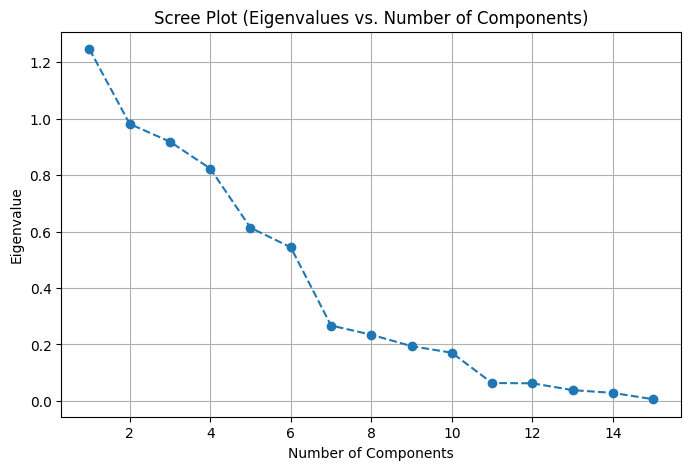

Optimal number of components (Eigenvalues > 1): 1


In [40]:
find_eigen_value(imb_sel_X)

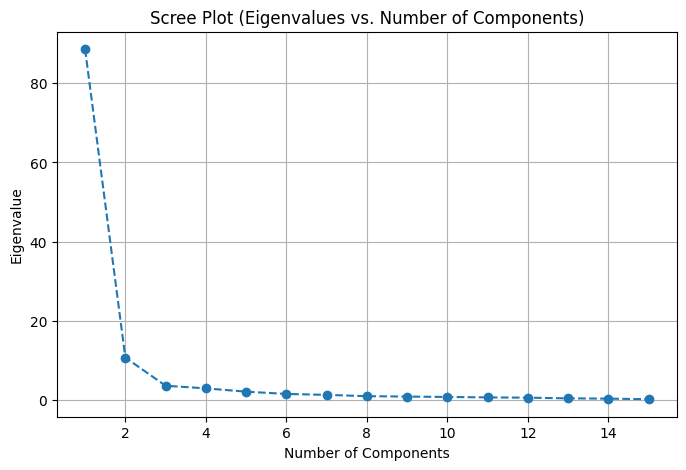

Optimal number of components (Eigenvalues > 1): 8


In [41]:
find_eigen_value(bal_X)

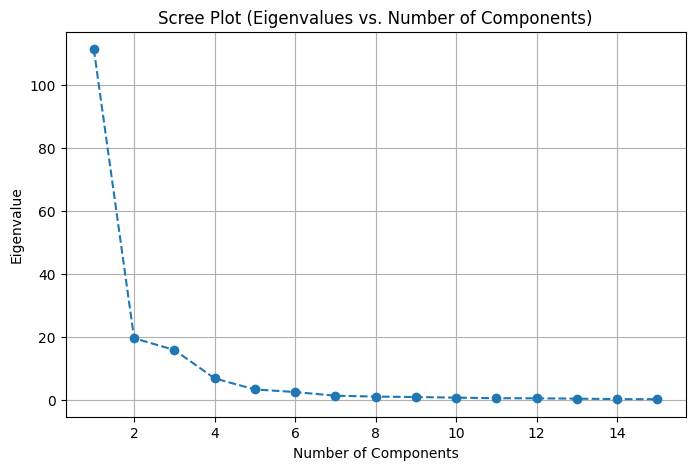

Optimal number of components (Eigenvalues > 1): 8


In [42]:
find_eigen_value(near_X)

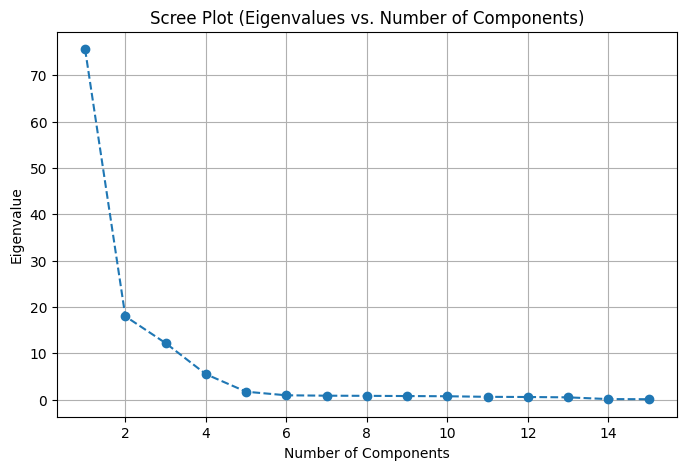

Optimal number of components (Eigenvalues > 1): 5


In [43]:
find_eigen_value(smote_X)

In [44]:
def plot_DR(X, y):
    # T-SNE Implementation
    t0 = time.time()
    print('\n-----TSNE Implementation-----')
    X_reduced_tsne = TSNE(n_components=2, random_state=42, verbose=1).fit_transform(X.values)
    t1 = time.time()
    print("T-SNE took {:.2} s".format(t1 - t0))

    # PCA Implementation
    t0 = time.time()
    print('\n-----PCA Implementation-----')
    X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
    t1 = time.time()
    print("PCA took {:.2} s".format(t1 - t0))

    # TruncatedSVD
    t0 = time.time()
    print('\n-----TruncatedSVD Implementation-----')
    X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
    t1 = time.time()
    print("Truncated SVD took {:.2} s".format(t1 - t0))

    # Plot Graphs

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
    # labels = ['No Fraud', 'Fraud']
    f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


    blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
    red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


    # t-SNE scatter plot
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax1.set_title('t-SNE', fontsize=14)

    ax1.grid(True)

    ax1.legend(handles=[blue_patch, red_patch])


    # PCA scatter plot
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax2.set_title('PCA', fontsize=14)

    ax2.grid(True)

    ax2.legend(handles=[blue_patch, red_patch])

    # TruncatedSVD scatter plot
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax3.set_title('Truncated SVD', fontsize=14)

    ax3.grid(True)

    ax3.legend(handles=[blue_patch, red_patch])

    plt.show()


-----TSNE Implementation-----
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.014s...
[t-SNE] Computed neighbors for 984 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 1.209876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.313999
[t-SNE] KL divergence after 1000 iterations: 0.612616
T-SNE took 2.9 s

-----PCA Implementation-----
PCA took 0.011 s

-----TruncatedSVD Implementation-----
Truncated SVD took 0.0045 s


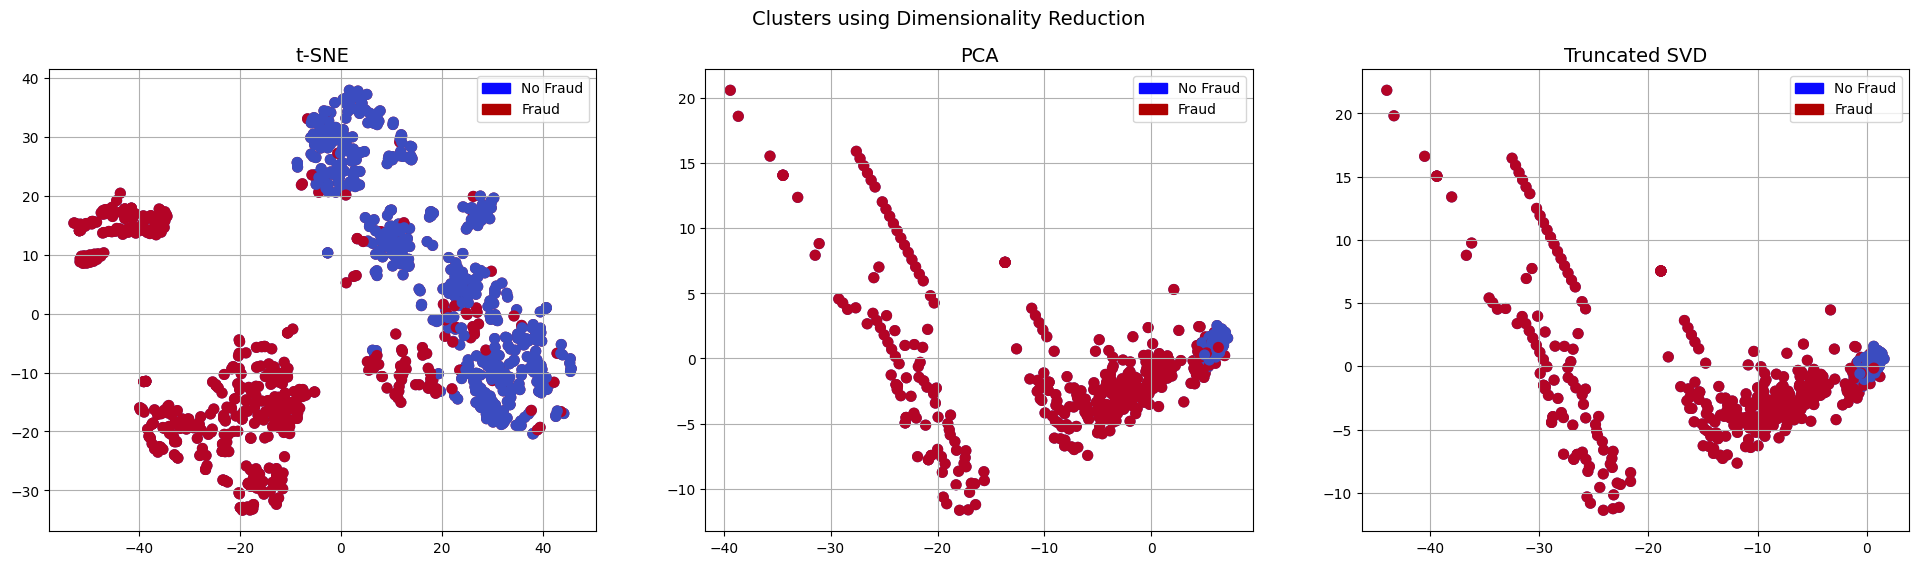

In [45]:
plot_DR(bal_X, bal_y)


-----TSNE Implementation-----
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.002s...
[t-SNE] Computed neighbors for 984 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 0.502644
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.129250
[t-SNE] KL divergence after 1000 iterations: 0.389638
T-SNE took 2.5 s

-----PCA Implementation-----
PCA took 0.001 s

-----TruncatedSVD Implementation-----
Truncated SVD took 0.0045 s


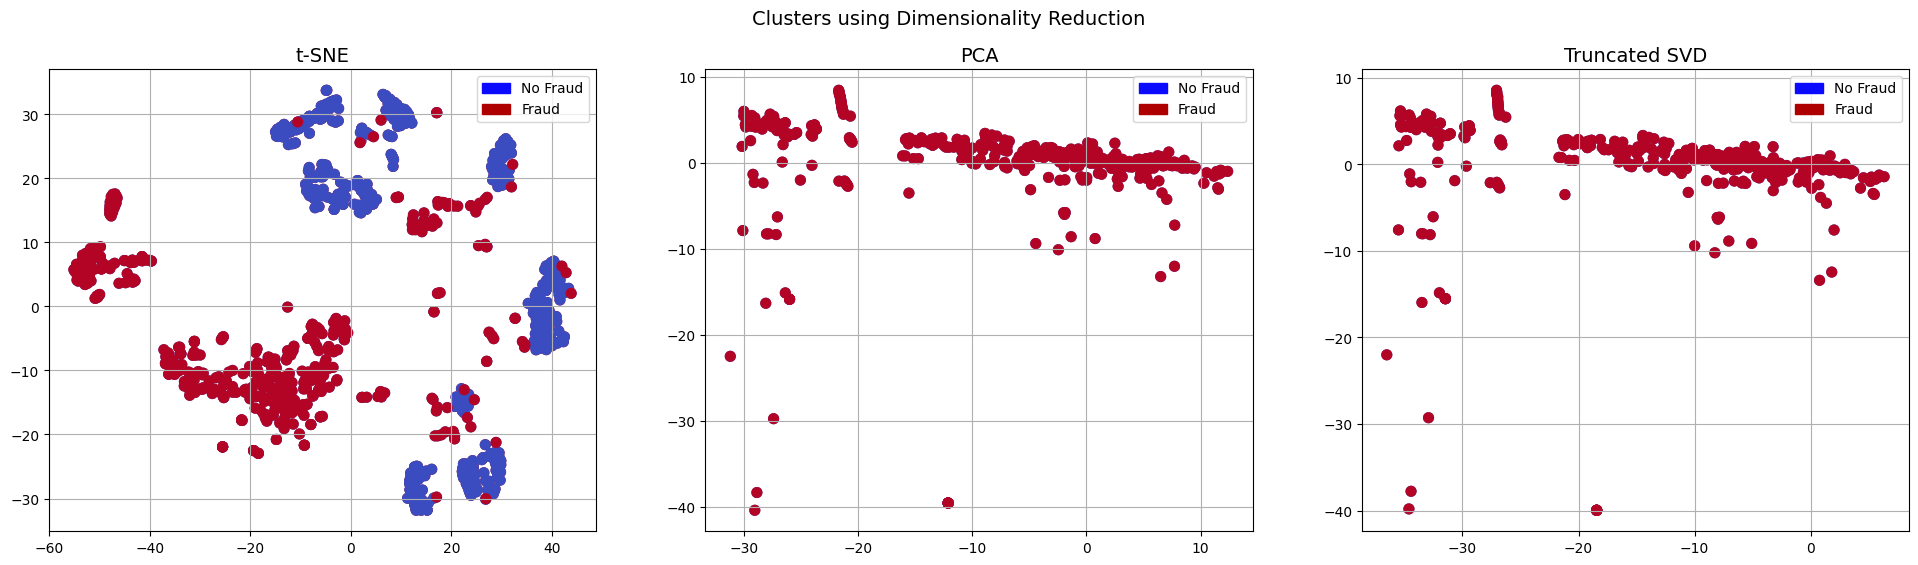

In [46]:
plot_DR(near_X, near_y)

In [47]:
# plot_DR(smote_X, smote_y) 

Imbalanced class first

In [48]:
imb_X_train, imb_X_test, imb_y_train, imb_y_test = train_test_split(imb_sel_X, imb_sel_y, test_size=0.25, random_state=42)

imb_X_train.shape, imb_X_test.shape, imb_y_train.shape, imb_y_test.shape


((83170, 15), (27724, 15), (83170,), (27724,))

In [49]:
classifiers = {
    "LogisiticRegression": LogisticRegression(solver='liblinear', max_iter=500),
    "KNearest": KNeighborsClassifier(weights='distance', metric='minkowski'),
    "Support Vector Classifier": SVC(verbose=1),
    "DecisionTreeClassifier": DecisionTreeClassifier(min_impurity_decrease=0.1),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=500, min_impurity_decrease=0.1, oob_score=True),
    "XGBoost" : XGBClassifier(n_estimators=500, booster='gbtree', learning_rate=0.01),
}

In [50]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(imb_X_train, imb_y_train)
    preds = classifier.predict(imb_X_test)
    score = cross_val_score(classifier, imb_X_test, imb_y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(score.mean(), 2) * 100, "% accuracy score")
    print(classification_report(imb_y_test, preds))
    print(confusion_matrix(imb_y_test, preds))

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27603
           1       1.00      0.88      0.93       121

    accuracy                           1.00     27724
   macro avg       1.00      0.94      0.97     27724
weighted avg       1.00      1.00      1.00     27724

[[27603     0]
 [   15   106]]
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27603
           1       1.00      0.86      0.92       121

    accuracy                           1.00     27724
   macro avg       1.00      0.93      0.96     27724
weighted avg       1.00      1.00      1.00     27724

[[27603     0]
 [   17   104]]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Classifiers:  SVC Has a training score of 100.0 % accuracy score
         

In [51]:
balX_train, balX_test, baly_train, baly_test = train_test_split(bal_X, bal_y, test_size=0.2, random_state=42)

balX_train.shape, balX_test.shape, baly_train.shape, baly_test.shape

for key, classifier in classifiers.items():
    classifier.fit(balX_train, baly_train)
    preds = classifier.predict(balX_test)
    training_score = cross_val_score(classifier, balX_test, baly_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    print(classification_report(baly_test, preds))
    print(confusion_matrix(baly_test, preds))

Classifiers:  LogisticRegression Has a training score of 91.0 % accuracy score
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.97      0.90      0.93       110

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

[[84  3]
 [11 99]]
Classifiers:  KNeighborsClassifier Has a training score of 90.0 % accuracy score
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        87
           1       0.98      0.83      0.90       110

    accuracy                           0.89       197
   macro avg       0.90      0.90      0.89       197
weighted avg       0.91      0.89      0.89       197

[[85  2]
 [19 91]]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Classifiers:  SVC Has a training score of 88.0 % accuracy score
              precision    recall  f

In [52]:
nearX_train, nearX_test, neary_train, neary_test = train_test_split(near_X, near_y, test_size=0.2, random_state=42)

nearX_train.shape, nearX_test.shape, neary_train.shape, neary_test.shape

for key, classifier in classifiers.items():
    classifier.fit(nearX_train, neary_train)
    preds = classifier.predict(nearX_test)
    training_score = cross_val_score(classifier, nearX_test, neary_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    print(classification_report(neary_test, preds))
    print(confusion_matrix(neary_test, preds))

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

[[97  2]
 [ 5 93]]
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.99      0.91      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

[[98  1]
 [ 9 89]]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Classifiers:  SVC Has a training score of 91.0 % accuracy score
              precision    recall  f

In [53]:
smoteX_train, smoteX_test, smotey_train, smotey_test = train_test_split(smote_X, smote_y, test_size=0.2, random_state=42)

print(smoteX_train.shape, smoteX_test.shape, smotey_train.shape, smotey_test.shape)

for key, classifier in classifiers.items():
    classifier.fit(smoteX_train, smotey_train)
    preds  = classifier.predict(smoteX_test)
    training_score = cross_val_score(classifier, smoteX_test, smotey_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    print(classification_report(smotey_test, preds))
    print(confusion_matrix(smotey_test, preds))
    break

(176643, 15) (44161, 15) (176643,) (44161,)
Classifiers:  LogisticRegression Has a training score of 96.0 % accuracy score
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22003
           1       0.99      0.95      0.97     22158

    accuracy                           0.97     44161
   macro avg       0.97      0.97      0.97     44161
weighted avg       0.97      0.97      0.97     44161

[[21693   310]
 [ 1119 21039]]


In [54]:
# from sklearn.model_selection import GridSearchCV

# # Logistic Regression 
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
# grid_log_reg.fit(X_train, y_train)
# # We automatically get the logistic regression with the best parameters.
# log_reg = grid_log_reg.best_estimator_

# knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
# grid_knears.fit(X_train, y_train)
# # KNears best estimator
# knears_neighbors = grid_knears.best_estimator_

# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# # SVC best estimator
# svc = grid_svc.best_estimator_

# # DecisionTree Classifier
# tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
#               "min_samples_leaf": list(range(5,7,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
# grid_tree.fit(X_train, y_train)

# # tree best estimator
# tree_clf = grid_tree.best_estimator_

# # RandomForestClassifier
# rf_params = {
#     "n_estimators": [500, 1000, 5000],  # Number of trees in the forest
#     "criterion": ["gini", "entropy"],  # Splitting criteria
#     "max_depth": list(range(2, 6, 1)),  # Tree depth
#     "min_samples_leaf": list(range(5, 8, 1)),  # Minimum samples per leaf
# }

# # Perform Grid Search
# grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1)
# grid_rf.fit(X_train, y_train)

# # Best RandomForest model
# rf_clf = grid_rf.best_estimator_

Plotting learning curves

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, name = 'model', train_sizes=np.linspace(.1, 1.0, 5), fontsize = 12):
    
    plt.figure(figsize=(20,14))
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    plt.title(f"{name} Learning Curve", fontsize=fontsize)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")
    
    

Near miss strategy

In [59]:
clfs = {
    "LogisiticRegression": LogisticRegression(solver='liblinear', max_iter=500),
    "KNearest": KNeighborsClassifier(weights='distance', metric='minkowski'),
    "Support Vector Classifier": SVC(verbose=1),
    "DecisionTreeClassifier": DecisionTreeClassifier(min_impurity_decrease=0.1),
}

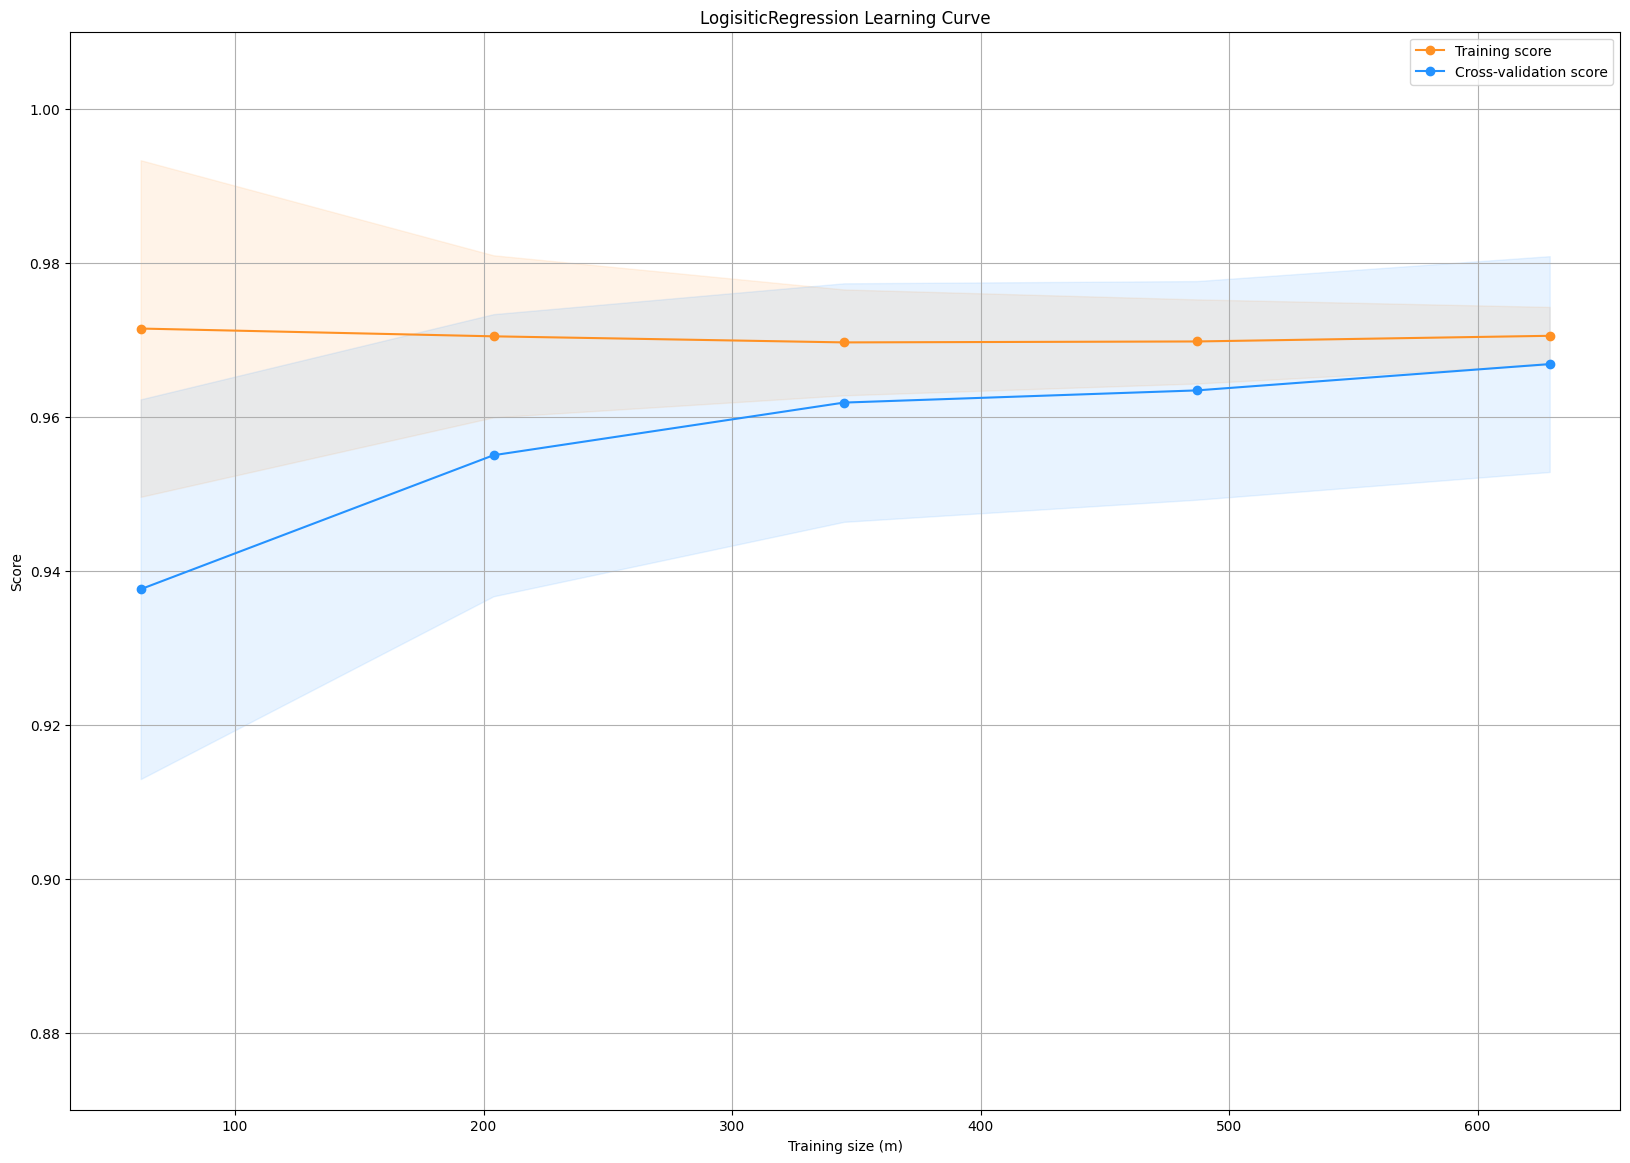

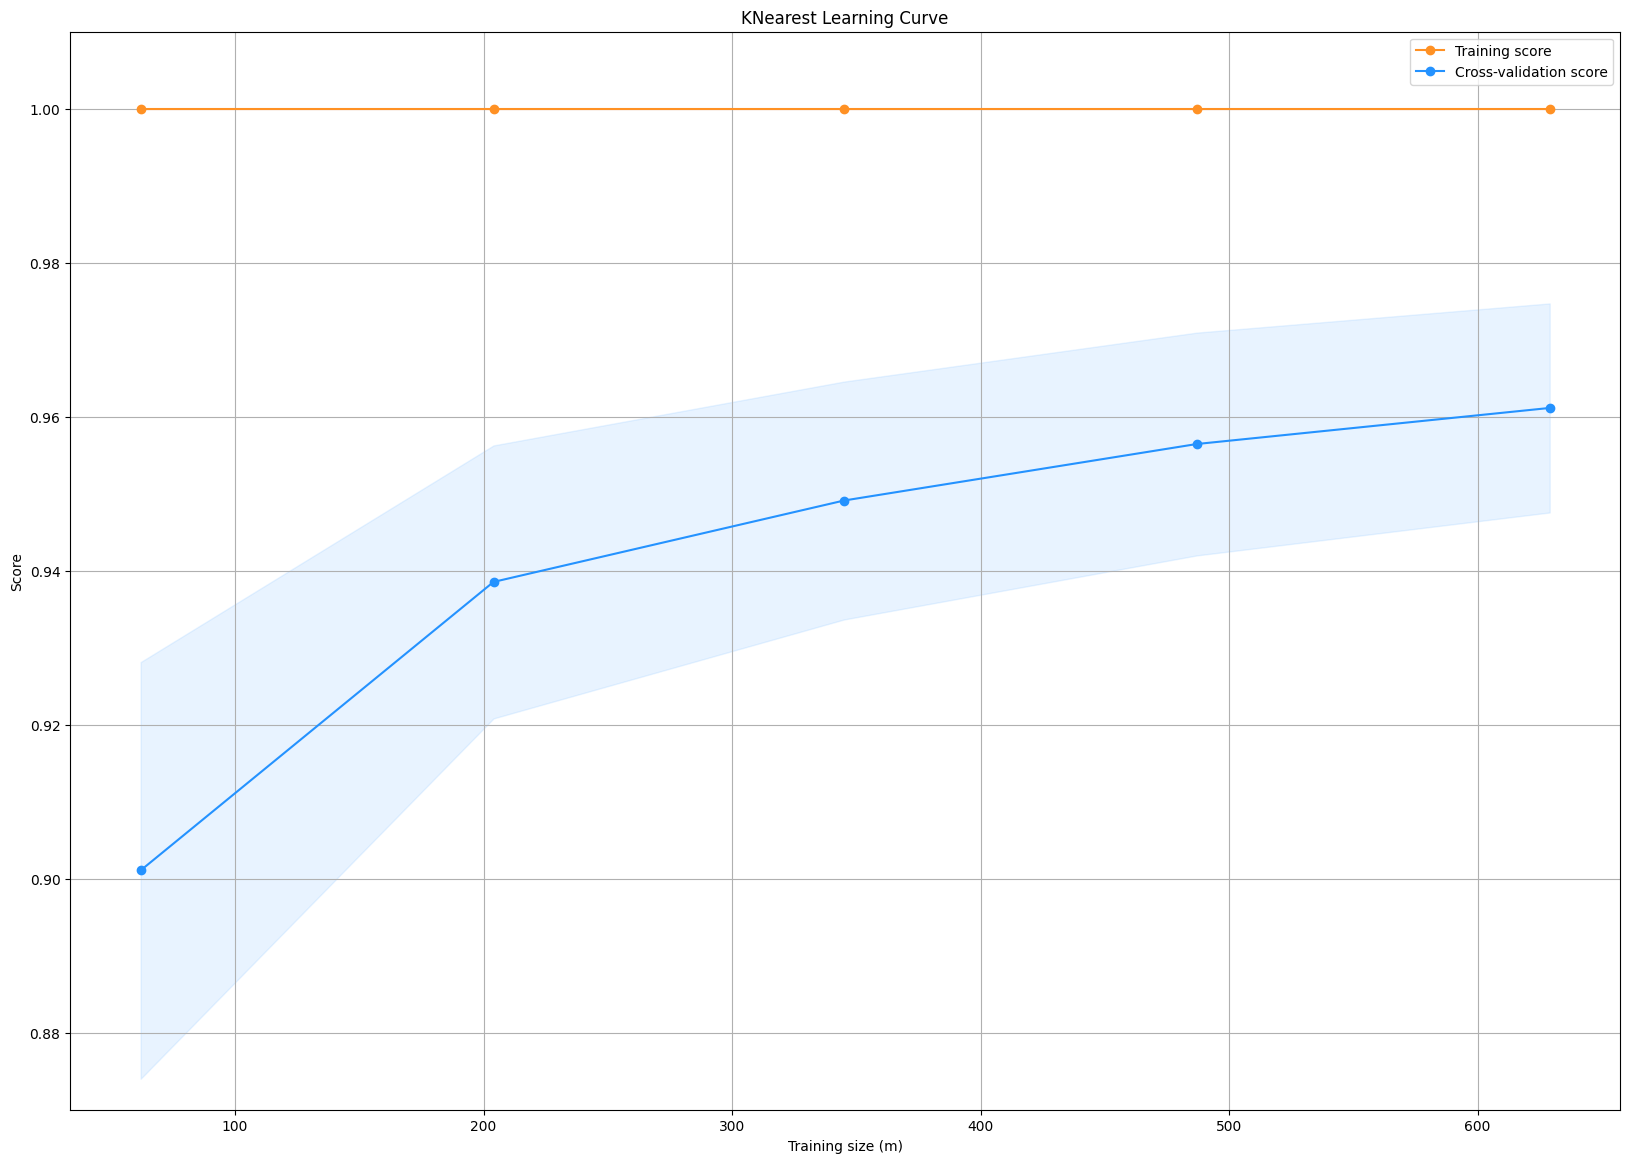

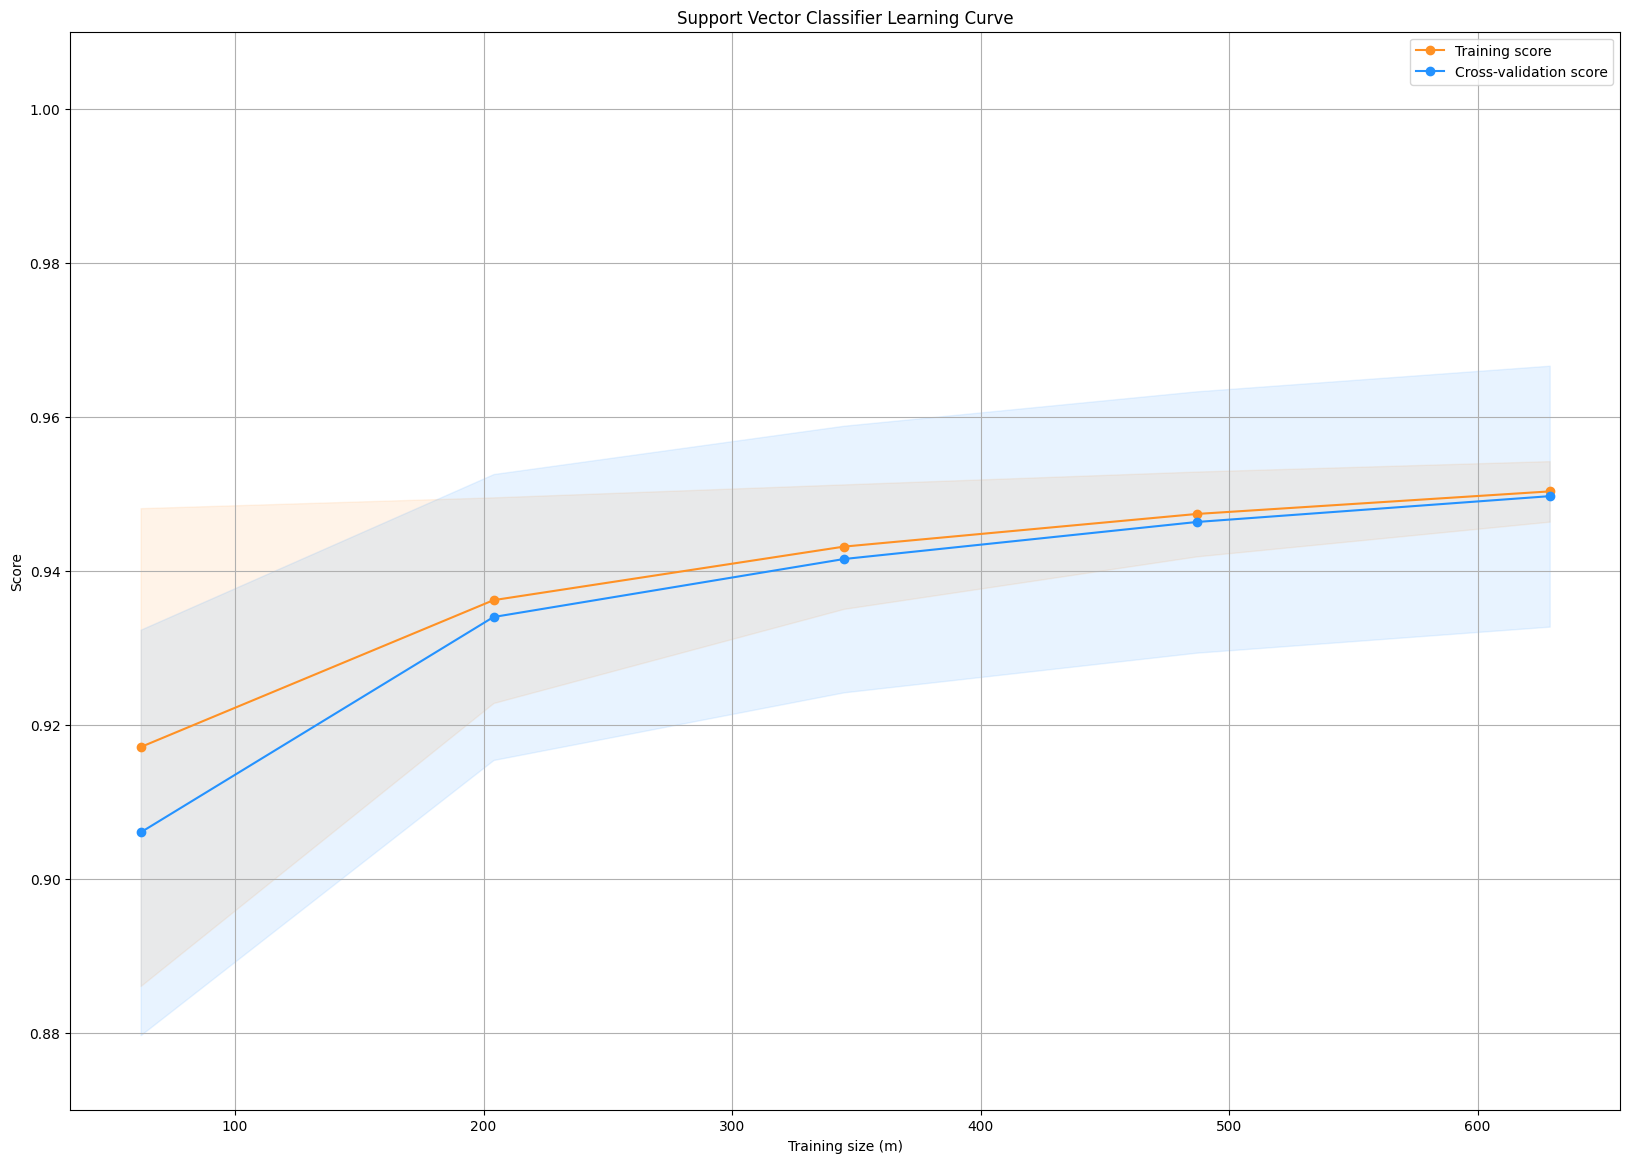

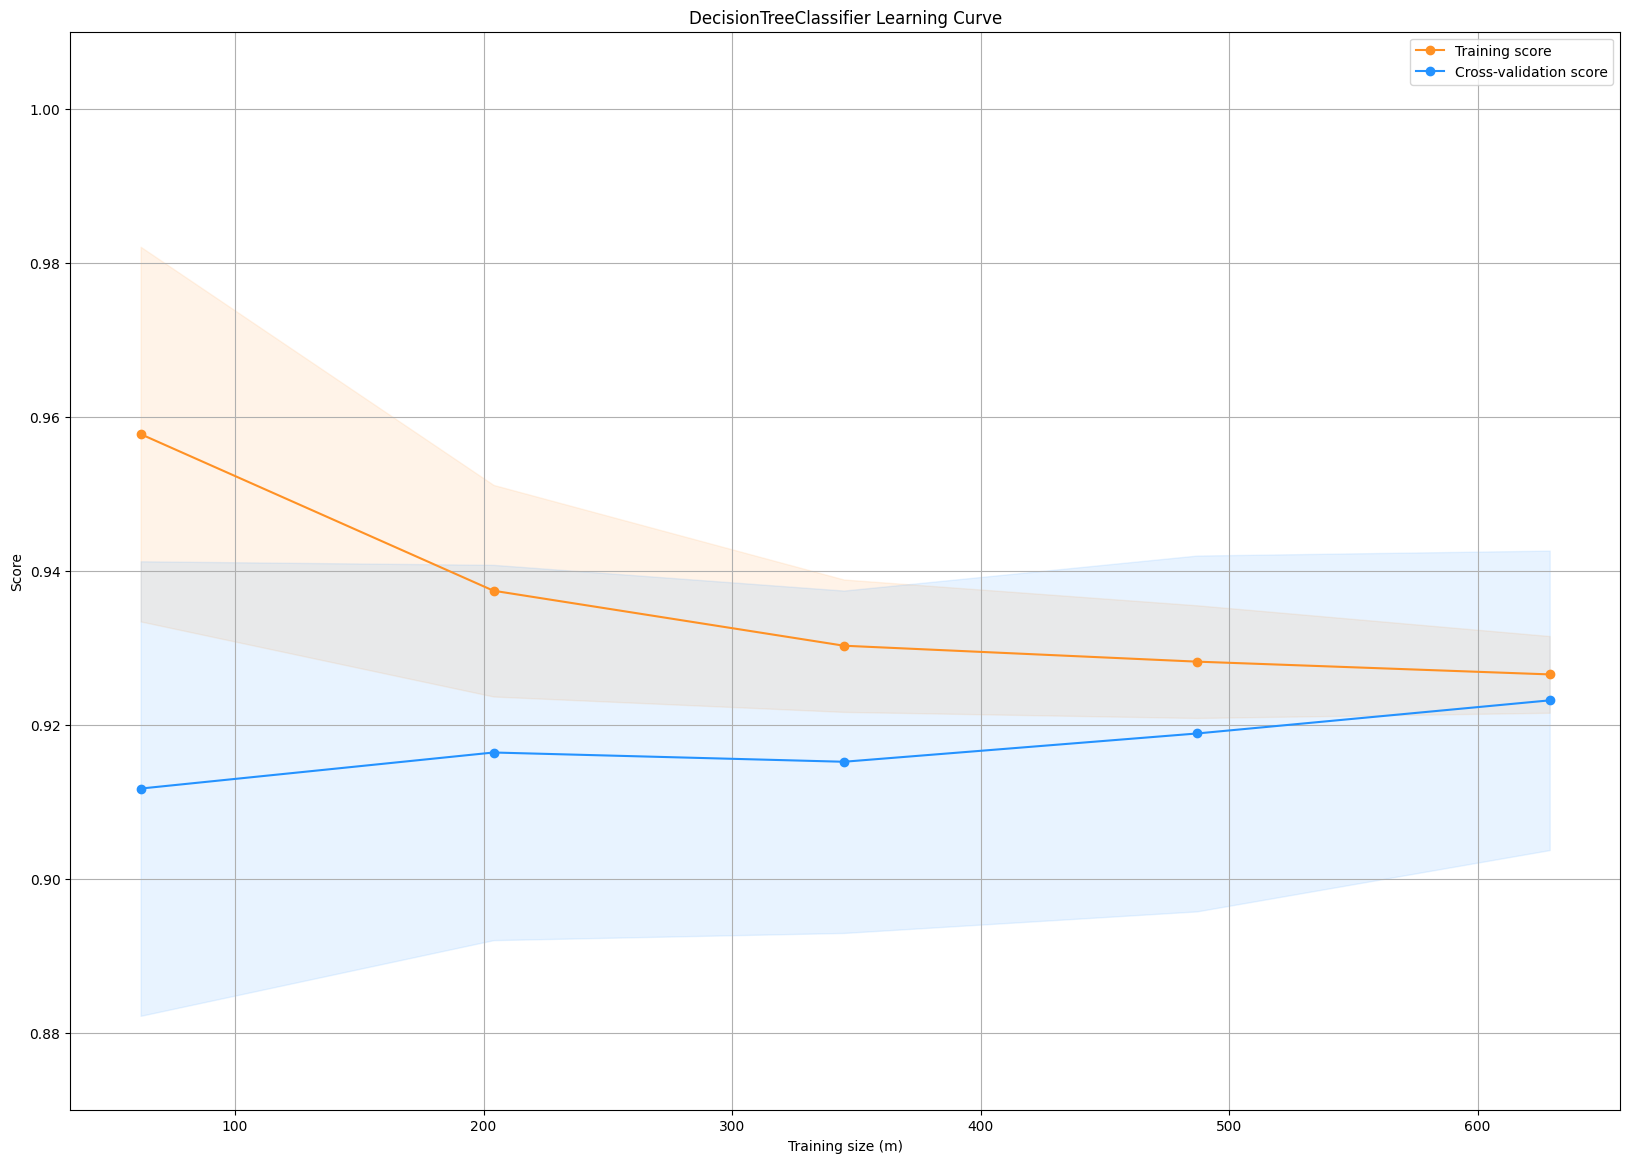

In [65]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

for i, clf in clfs.items():

    plot_learning_curve( clf,
        X=nearX_train, 
        y=neary_train, 
        ylim=(0.87, 1.01), 
        cv=cv, 
        n_jobs=4,
        name=i
    )

balanced df

In [ ]:
plot_learning_curve(
    log_reg, knears_neighbors, svc, tree_clf, rf_clf, 
    X=balX_train,  
    y=baly_train, 
    ylim=(0.87, 1.01), 
    cv=cv, 
    n_jobs=4
)

undersampled df

In [ ]:
plot_learning_curve(
    log_reg, knears_neighbors, svc, tree_clf, rf_clf, 
    X=smoteX_train, 
    y=smotey_train, 
    ylim=(0.87, 1.01), 
    cv=cv, 
    n_jobs=4
)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

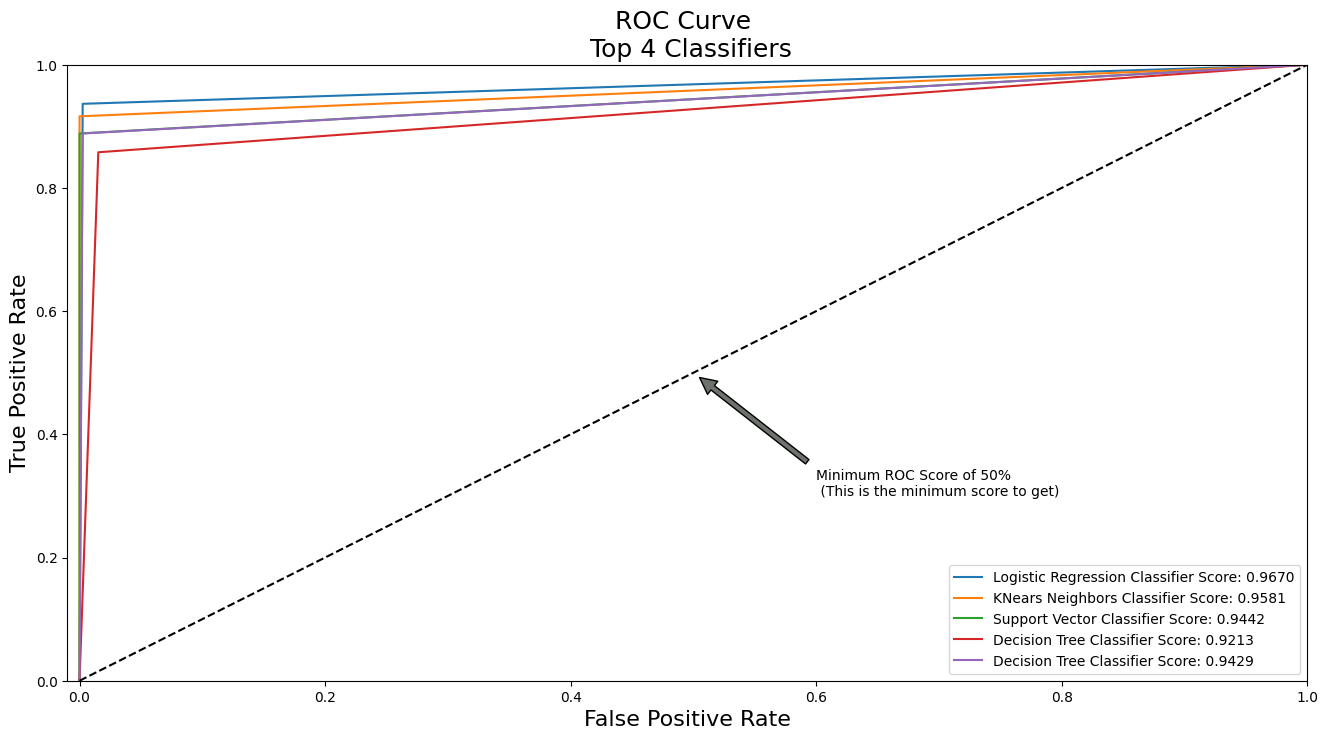

In [61]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

def plot_roc(X_train, y_train):

    models = []
    for key, clf in classifiers.items():
        cf = cross_val_predict(clf, X_train, y_train, cv=5)
        models.append(cf)

    log_fpr, log_tpr, log_thresold = roc_curve(y_train, models[0])
    knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, models[1])
    svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, models[2])
    tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, models[3])
    rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, models[4])


    def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr):
        plt.figure(figsize=(16,8))
        plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
        plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, models[0])))
        plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, models[1])))
        plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, models[2])))
        plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, models[3])))
        plt.plot(rf_fpr, rf_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, models[4])))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.axis([-0.01, 1, 0, 1])
        plt.xlabel('False Positive Rate', fontsize=16)
        plt.ylabel('True Positive Rate', fontsize=16)
        plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                    arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                    )
        plt.legend()
        
    graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr)
    plt.show()

plot_roc(nearX_train, neary_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

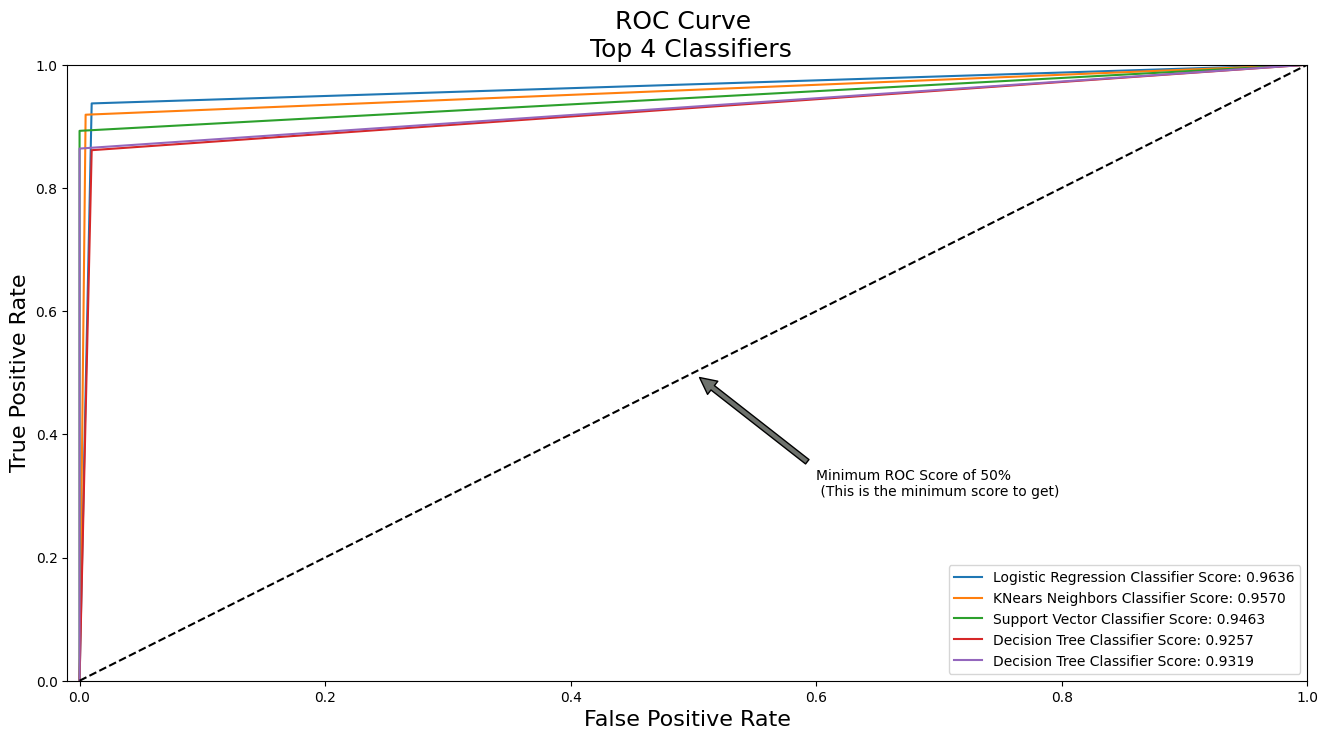

In [62]:
plot_roc(balX_train, baly_train)

Terms:¶
True Positives: Correctly Classified Fraud Transactions
False Positives: Incorrectly Classified Fraud Transactions
True Negative: Correctly Classified Non-Fraud Transactions
False Negative: Incorrectly Classified Non-Fraud Transactions
Precision: True Positives/(True Positives + False Positives)
Recall: True Positives/(True Positives + False Negatives)
Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.